In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import os
import tabula
import re
import matplotlib.pyplot as plt
import PyPDF2

import warnings
warnings.filterwarnings('ignore')
#sns.set_context("talk")


## Check Data.
- [x] number of subjects
- [x] number of Risk
- [x] number Amb
- [x] number MC's

In [2]:
risk_files = [os.path.join(root,f) for root,dirs,files in os.walk('../data') for f in files if 'risk' in f]
amb_files = [os.path.join(root,f) for root,dirs,files in os.walk('../data') for f in files if 'ambig' in f]
MC_files= [os.path.join(root,f) for root,dirs,files in os.walk('../data') for f in files if 'Check' in f]
print("Number of Subjects:%s \n Number of Risk Files:%s \n Number of Amb Files:%s \n Number of MC Files:%s \n"%(
len(os.listdir('../data')),len(risk_files),len(amb_files),len(MC_files)))

Number of Subjects:51 
 Number of Risk Files:47 
 Number of Amb Files:43 
 Number of MC Files:48 



## Manipulation Check:
- [x] do participants increase preference in the risk task for "better" probabilities?
- [x] are participants generally risk averse?
- [x] do participants report the different 2nd order distributions?
- [x] are participants generally ambiguity averse? 

In [3]:
########### Make Risk DF ########
df_list=[]# prepend list
for f in risk_files:
    sub="sub-%s"%(re.search("sub-(.*)/",f).group(1))
    df=pd.read_csv(f)
    df['sub']=sub
    df_list.append(df) #append this list w/ a df with 'sub' column
df_r=pd.concat(df_list) #concatonate the list to a single df
df_r=df_r[df_r.response!= 'no_response']#only analyzing responses made

#define whether they chose safe or lottery
df_r['Choose_lot']=np.logical_or((np.logical_and(df_r.LotisLeft==1,df_r.response=="['f']")),
(np.logical_and(df_r.LotisLeft==0,df_r.response=="['j']")))

############ Make Ambiguity DF ########
df_list=[]# prepend list
for f in amb_files:
    sub="sub-%s"%(re.search("sub-(.*)/",f).group(1))
    df=pd.read_csv(f)
    df['sub']=sub
    df_list.append(df) #append this list w/ a df with 'sub' column
df_a=pd.concat(df_list) #concatonate the list to a single df
df_a=df_a[df_a.response!= 'No_resp']#only analyzing responses made

#define whether they chose safe or lottery
df_a['Choose_Risk']=np.logical_or((np.logical_and(df_a.RiskisLeft==1,df_a.response=="['f']")),
(np.logical_and(df_a.RiskisLeft==0,df_a.response=="['j']")))
df_a.reset_index(drop=True)
df_r.reset_index(drop=True)

#MC files#####
display(df_r.head())
display(df_a.head())


LotisLeft  Lot_per  Lot_mon Lot_color  Sure_mon    dist response  \
0          1       60       13      blue         5  Narrow    ['j']   
1          0       40       13      blue         5  Narrow  No_resp   
2          1       50       13      blue         5  Narrow    ['f']   
3          0       60       13      blue         5  Narrow    ['j']   
4          1       50       13      blue         5  Narrow    ['f']   

          RT       sub  Choose_lot  
0   3.506263  sub-1240       False  
1  10.000000  sub-1240       False  
2   2.854734  sub-1240        True  
3   1.991939  sub-1240        True  
4   2.246549  sub-1240        True

Risk_per  Money  Color  Amb  RiskisLeft response        RT  dist       sub  \
1        30     13  green  100           0    ['f']  0.933264  wide  sub-1240   
2        40     13  green  100           1    ['j']  1.081161  wide  sub-1240   
3        50     13  green  100           1    ['j']  1.091519  wide  sub-1240   
4        60     13  green  100           1    ['j']  0.799137  wide  sub-1240   
5        70     13  green  100           0    ['j']  2.462628  wide  sub-1240   

   Choose_Risk  
1        False  
2        False  
3        False  
4        False  
5         True

## Check items 1 & 2
- [x] Probability of choosing lottery increases with likeihood of winning
- [x] Participants are generally risk averse. (lot prize 13 sure prize 5) EV~38%

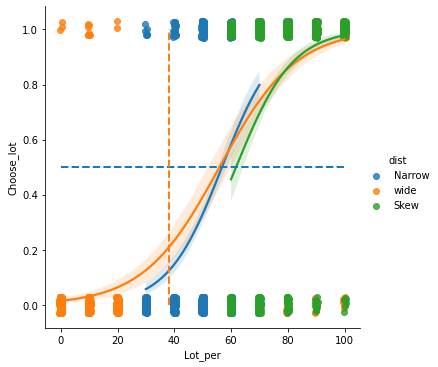

In [4]:
if 1==1:
    plotData=df_r
    sns.lmplot(x='Lot_per',y='Choose_lot', data=plotData ,
               hue='dist',logistic=True,x_jitter=0.5,y_jitter=0.03)
    plt.plot([0,100], [0.5,0.5], linewidth=2,linestyle='dashed')
    plt.plot([38,38], [0,1], linewidth=2,linestyle='dashed')

## Manipulation Check:
- [x] do participants report the different 2nd order distributions?
        Yes But I need to come back to this. figuring out the code is tough
- [x] are participants generally ambiguity averse? 
        Yes, but more mixed than risk 7 vs 2

sub-1240


dist      means       stds      skew       sub
0       narrow  66.153846  28.010987 -1.262250  sub-1240
1         skew  69.411765  17.489493 -0.454943  sub-1240
2  True_unkown  34.000000  26.208711  0.847657  sub-1240
3         wide  66.363636  27.020615 -1.317851  sub-1240

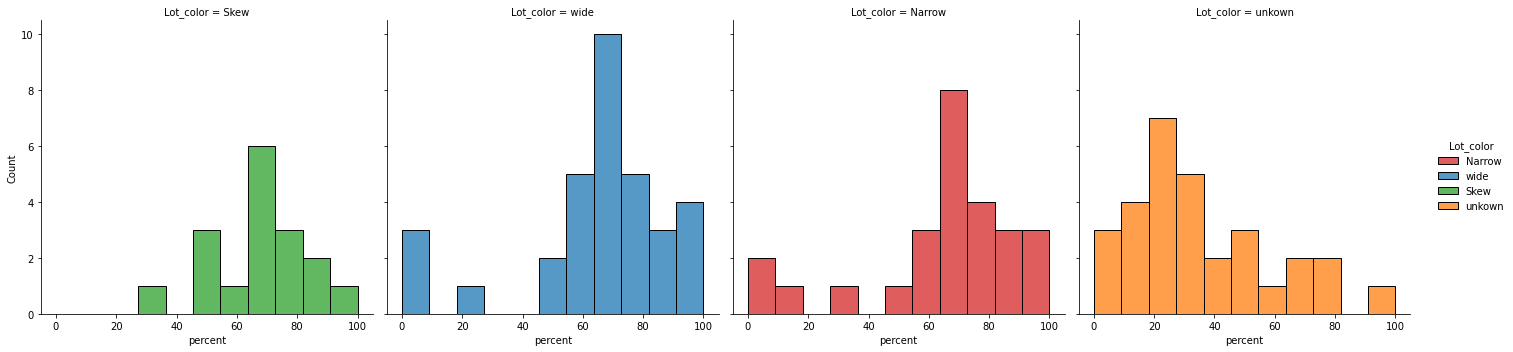

sub-1302


dist      means       stds      skew       sub
0       narrow  41.363636  16.415862 -0.097173  sub-1302
1         skew  72.500000  25.429641 -1.098066  sub-1302
2  True_unkown  53.750000  28.017851 -0.274750  sub-1302
3         wide  52.500000  26.708301 -0.761828  sub-1302

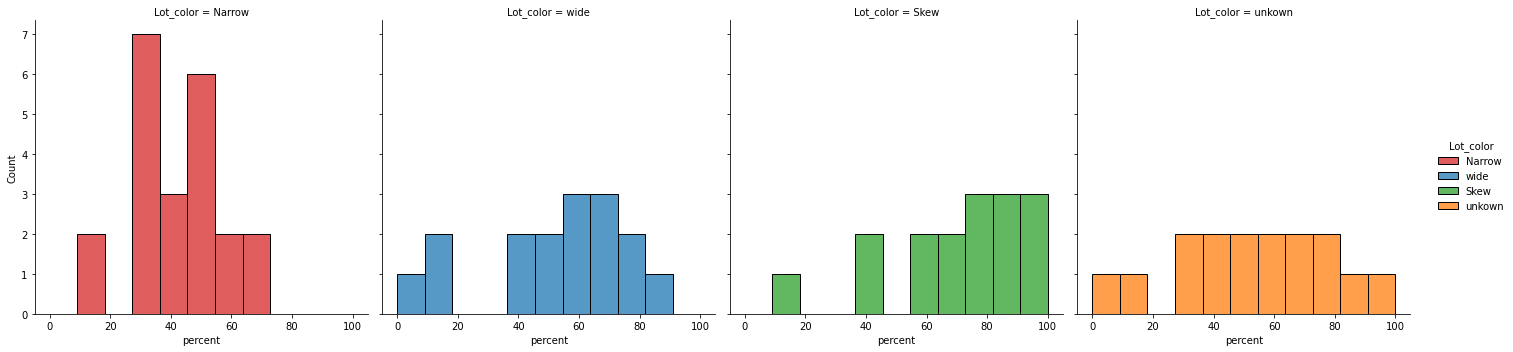

sub-1999
sub-1300


dist      means       stds      skew       sub
0       narrow  49.166667  24.654759 -0.056101  sub-1300
1         skew  65.135135  31.677333 -0.894734  sub-1300
2  True_unkown  58.775510  31.532566 -0.289979  sub-1300
3         wide  57.826087  35.413983 -0.442549  sub-1300

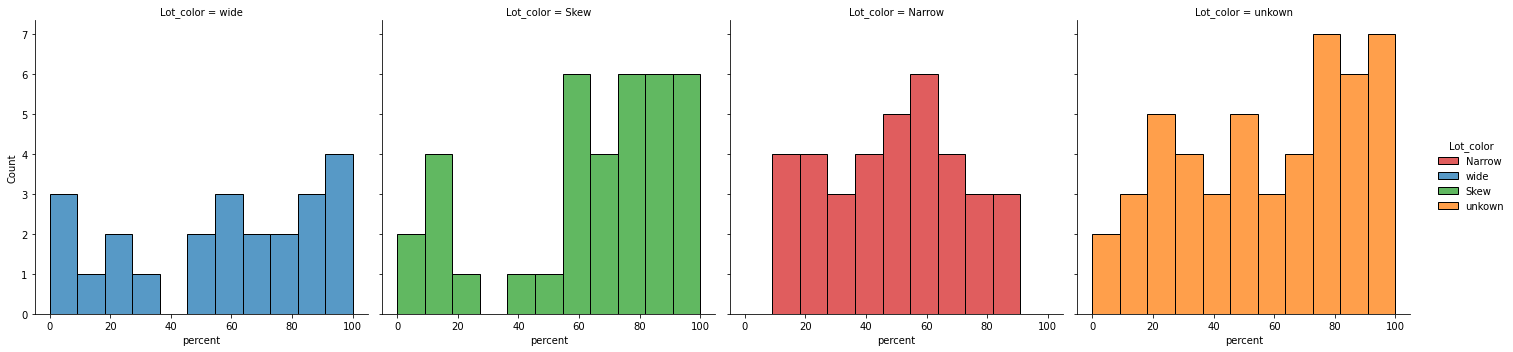

sub-1007


dist  means  stds  skew       sub
0       narrow     50   0.0     0  sub-1007
1         skew     90   0.0     0  sub-1007
2  True_unkown     70   0.0     0  sub-1007
3         wide     60   0.0     0  sub-1007

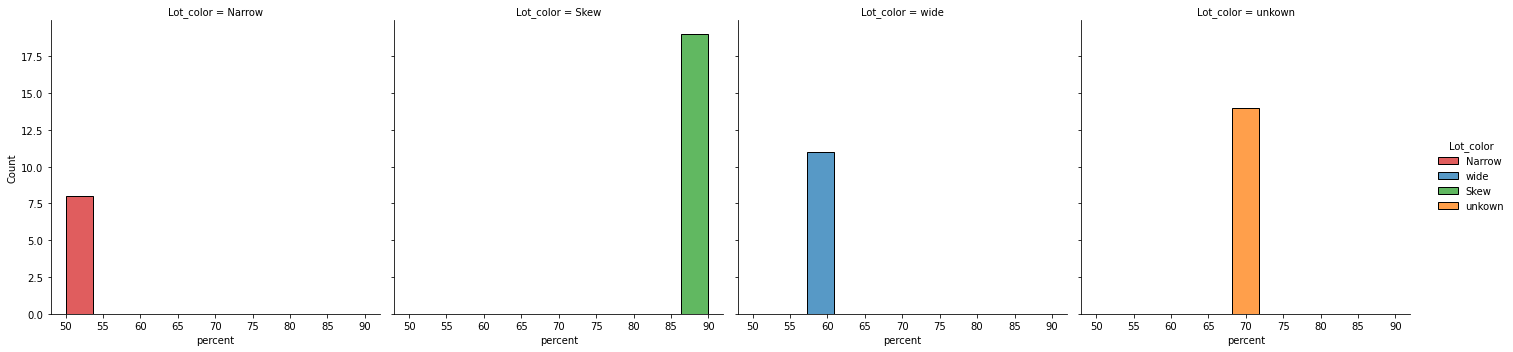

sub-1244
sub-3166


dist      means       stds      skew       sub
0       narrow  51.333333   8.338094 -0.274237  sub-3166
1         skew  71.428571  14.064217 -0.098753  sub-3166
2  True_unkown  28.571429  14.064217  0.098753  sub-3166
3         wide  50.000000  43.852901  0.000000  sub-3166

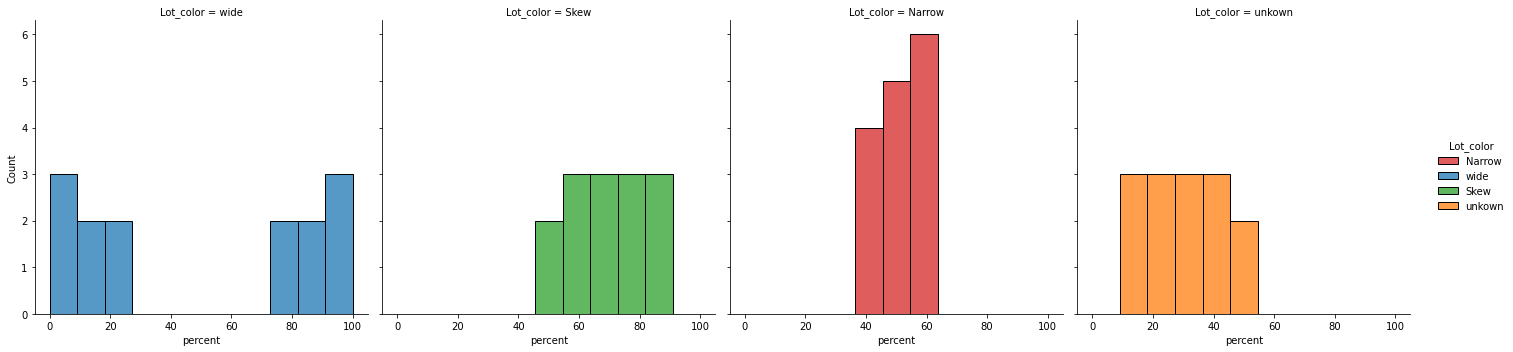

sub-1242


dist      means       stds      skew       sub
0       narrow  53.000000   6.749486 -0.433637  sub-1242
1         skew  85.555556  12.472191 -0.448898  sub-1242
2  True_unkown  70.327869  24.492666 -0.827289  sub-1242
3         wide  15.000000  21.213203  2.226077  sub-1242

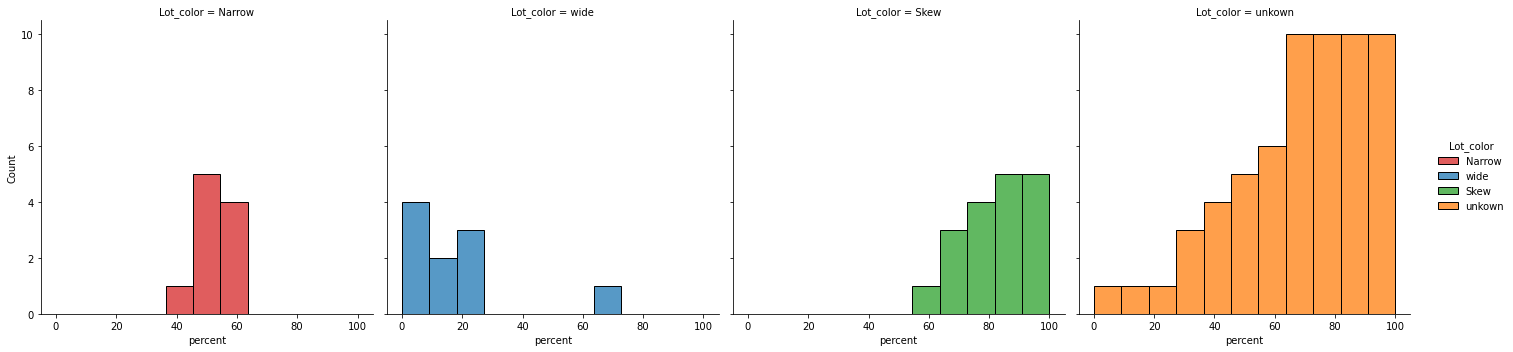

sub-1019


dist      means       stds      skew       sub
0       narrow  37.058824  23.120528  0.268791  sub-1019
1         skew  78.421053  17.404711 -0.154242  sub-1019
2  True_unkown  50.000000  36.228442  0.000000  sub-1019
3         wide  35.384615  31.013645  0.356632  sub-1019

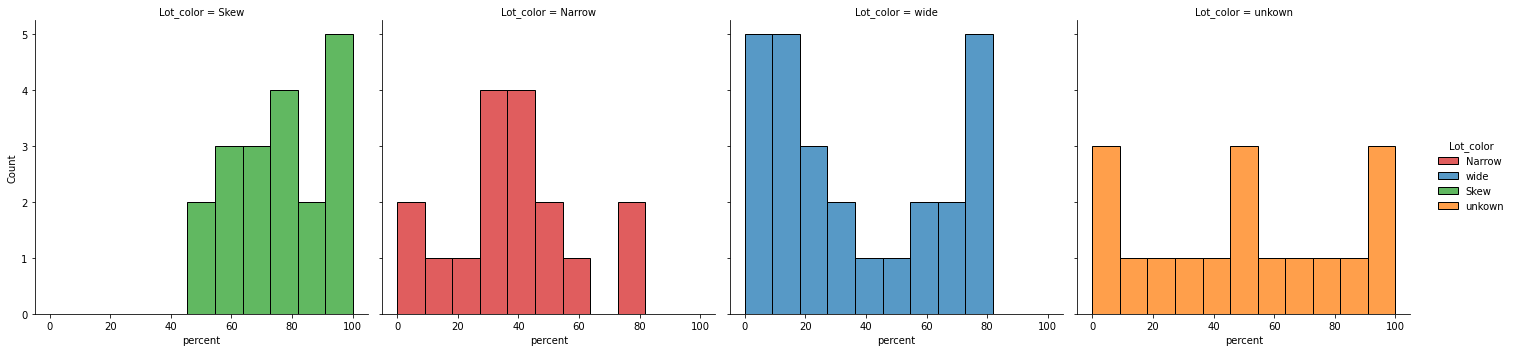

sub-1253


dist      means       stds      skew       sub
0       narrow  61.250000  25.787594  0.295732  sub-1253
1         skew  61.052632  21.575381  0.516341  sub-1253
2  True_unkown  55.652174  28.576228 -0.119002  sub-1253
3         wide  45.789474  37.165664  0.241270  sub-1253

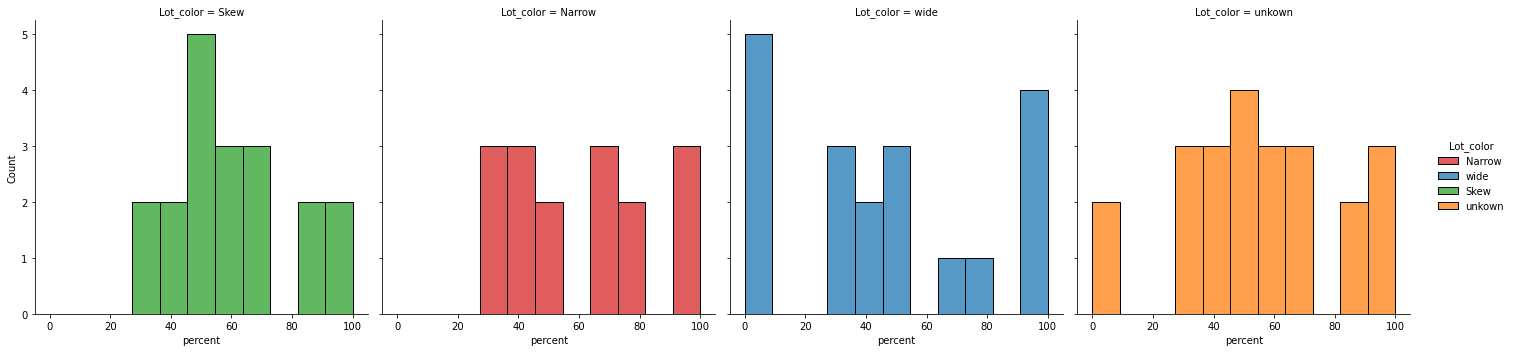

sub-3164


dist      means       stds      skew       sub
0       narrow  32.500000  18.708287 -0.831211  sub-3164
1         skew  72.105263  15.623595  0.258858  sub-3164
2  True_unkown  37.750000  21.422191  0.209381  sub-3164
3         wide  64.000000  21.591825  0.322396  sub-3164

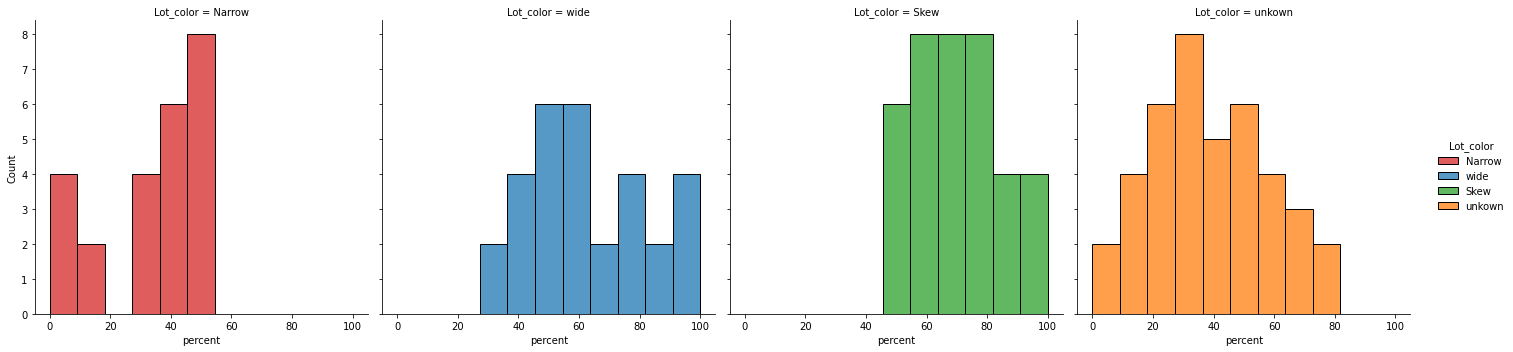

sub-3122


dist      means       stds      skew       sub
0       narrow  58.571429  12.149858  1.146967  sub-3122
1         skew  58.333333   8.348471  0.354139  sub-3122
2  True_unkown  65.000000   5.270463  0.000000  sub-3122
3         wide  60.000000  43.011626 -0.720335  sub-3122

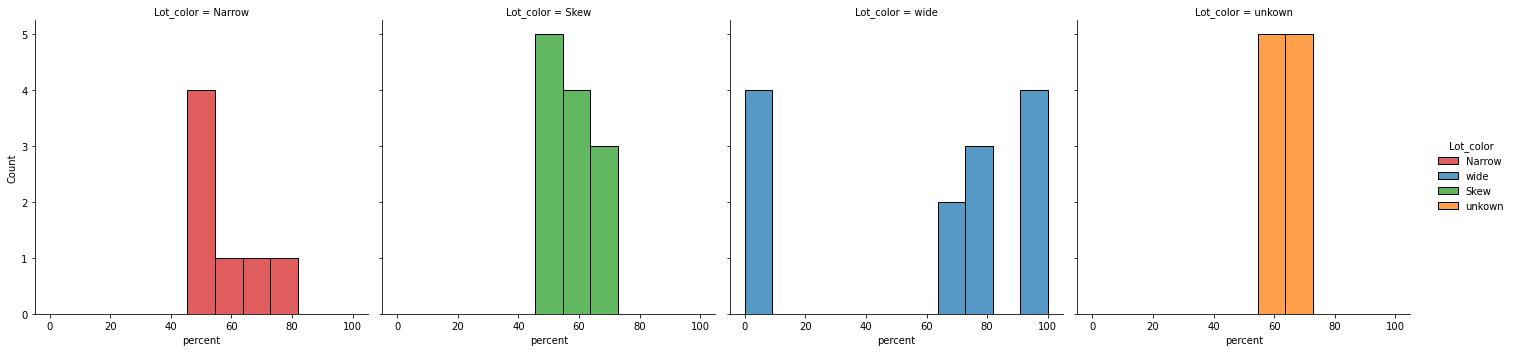

sub-1294


dist      means       stds      skew       sub
0       narrow  42.400000  18.321208  0.100533  sub-1294
1         skew  81.875000  14.244882 -0.058689  sub-1294
2  True_unkown  20.000000   0.000000  0.000000  sub-1294
3         wide  72.857143  32.682287 -1.792731  sub-1294

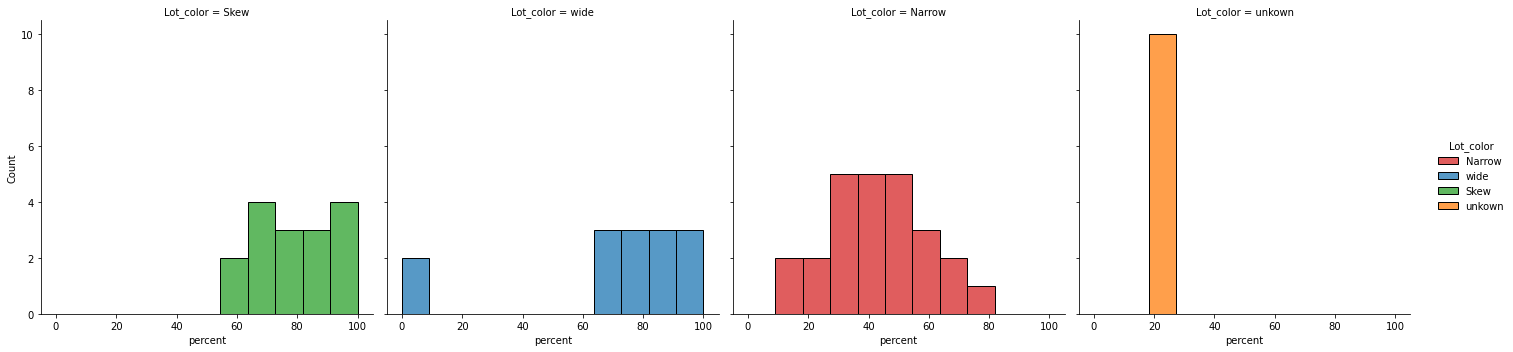

sub-1010


dist  means       stds      skew       sub
0       narrow  50.00  11.881771  0.000000  sub-1010
1         skew  84.50  13.945382 -0.403339  sub-1010
2  True_unkown  50.00  22.360680  0.000000  sub-1010
3         wide  53.75  45.588741 -0.239280  sub-1010

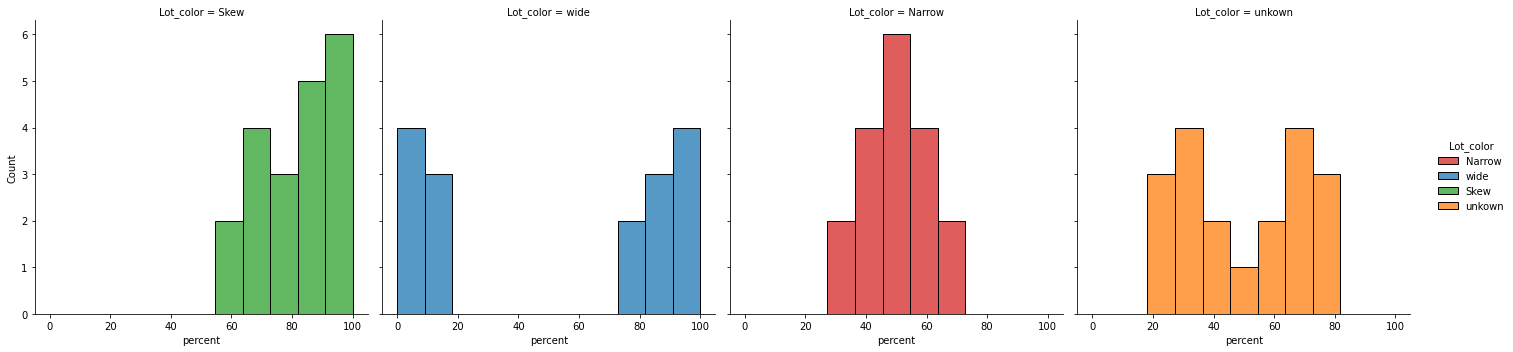

sub-1301


dist      means       stds      skew       sub
0       narrow  48.095238  22.938842 -0.511502  sub-1301
1         skew  74.375000  12.093387 -0.479581  sub-1301
2  True_unkown  77.333333  22.189659 -0.969848  sub-1301
3         wide  32.307692  40.032038  1.181599  sub-1301

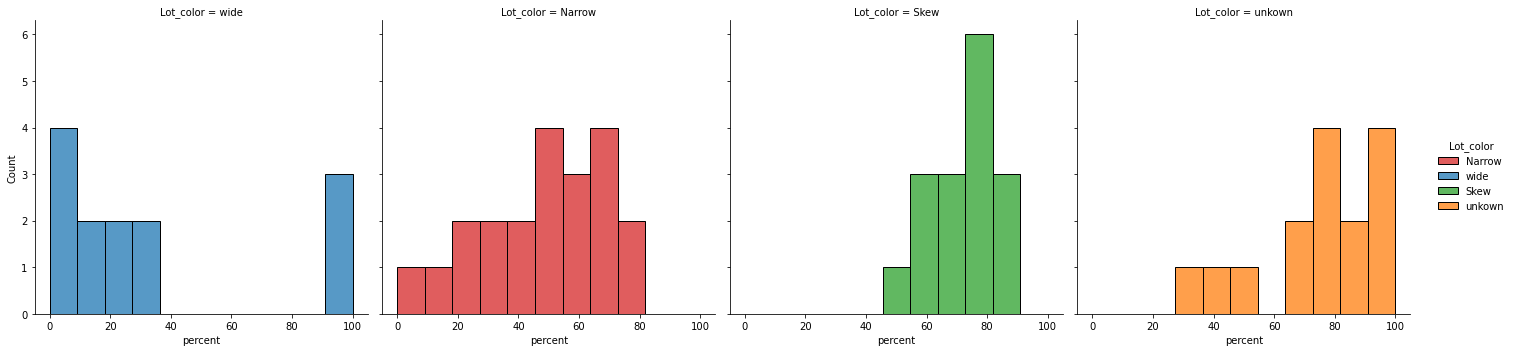

sub-1009


dist      means       stds      skew       sub
0       narrow  39.545455  20.581377 -0.654108  sub-1009
1         skew  70.000000  17.320508  0.245374  sub-1009
2  True_unkown  61.428571  29.880715 -0.463147  sub-1009
3         wide  59.047619  32.078772 -0.688357  sub-1009

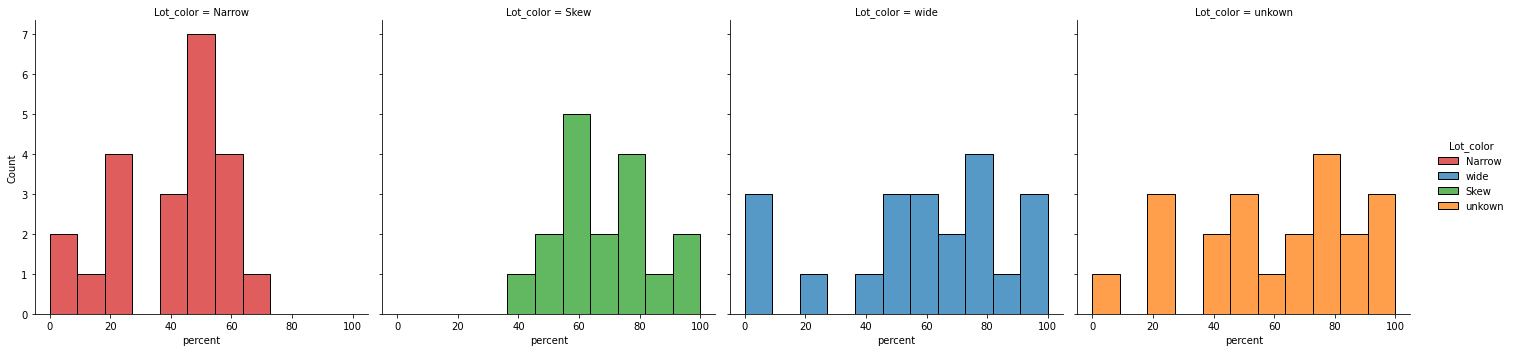

sub-1251


dist      means       stds      skew       sub
0       narrow  38.500000  19.808292  0.049773  sub-1251
1         skew  66.666667  33.431229 -1.298817  sub-1251
2  True_unkown  67.441860  19.529346 -0.386703  sub-1251
3         wide  63.000000  33.576307 -0.919720  sub-1251

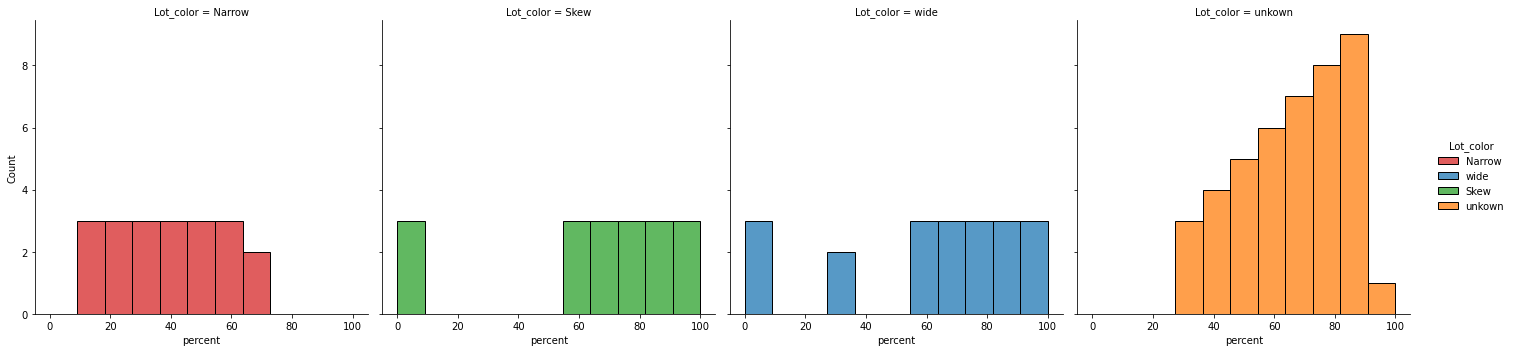

sub-3101


dist      means       stds      skew       sub
0       narrow  26.250000  19.278658  0.101681  sub-3101
1         skew  65.333333  38.334369 -0.920906  sub-3101
2  True_unkown  63.103448  33.284858 -0.697672  sub-3101
3         wide  87.500000   7.537784  0.477594  sub-3101

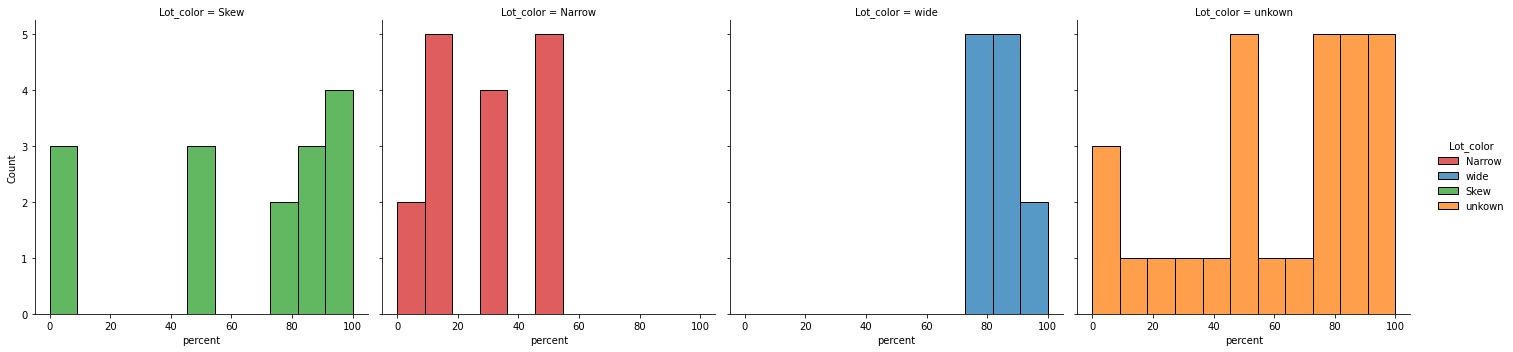

sub-3176


dist      means       stds      skew       sub
0       narrow  40.000000  20.000000 -0.865385  sub-3176
1         skew  78.571429  15.619092  0.132663  sub-3176
2  True_unkown  54.090909  22.180878  0.118531  sub-3176
3         wide  61.111111  16.764419  0.815334  sub-3176

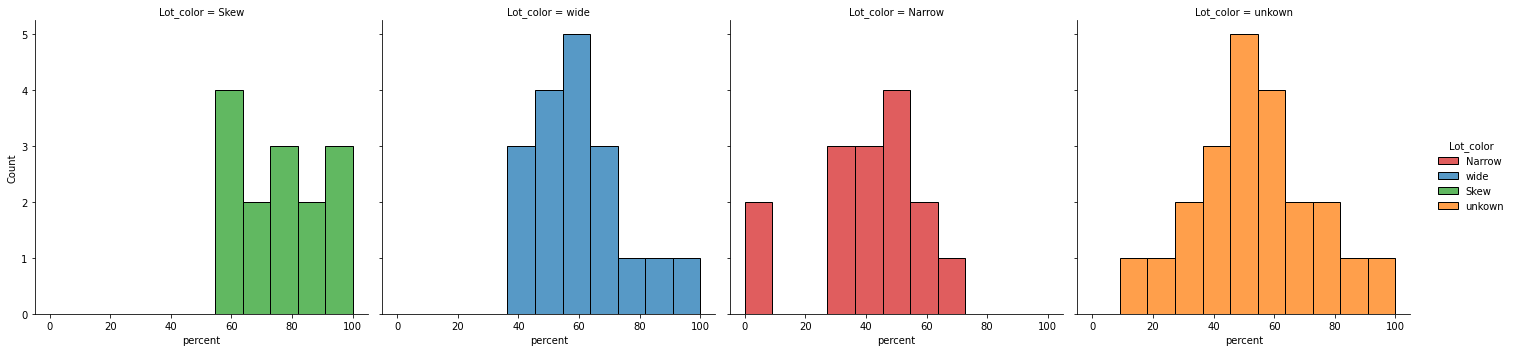

sub-3116


dist      means       stds      skew       sub
0       narrow  70.000000  14.770979 -0.812404  sub-3116
1         skew  52.500000   8.506963 -0.534322  sub-3116
2  True_unkown  56.086957  30.072376 -0.568520  sub-3116
3         wide  50.000000  42.257713  0.000000  sub-3116

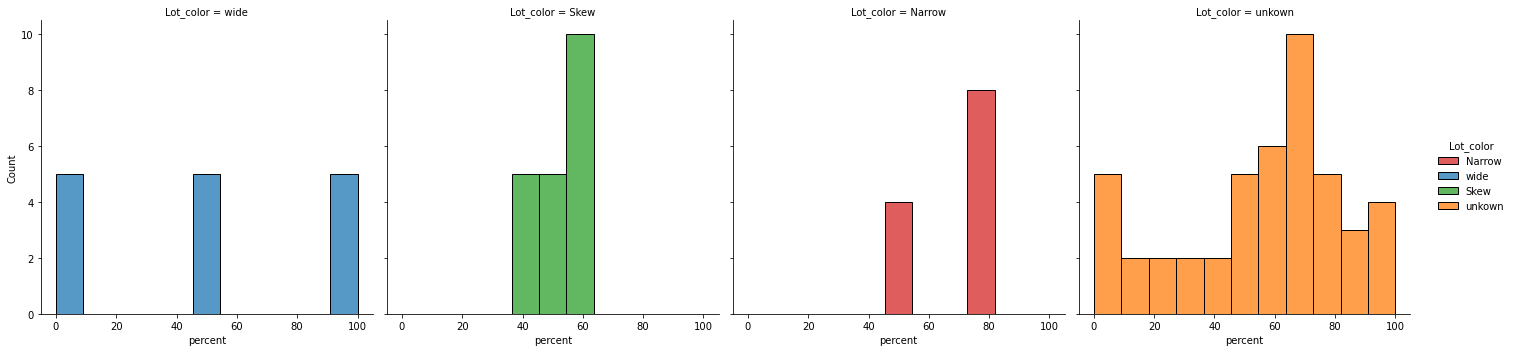

sub-3186
sub-3175


dist      means       stds      skew       sub
0       narrow  39.047619  19.469145 -0.212089  sub-3175
1         skew  80.526316  13.112201 -0.272374  sub-3175
2  True_unkown  67.200000  20.518285 -0.123617  sub-3175
3         wide  84.444444  11.991282 -0.313675  sub-3175

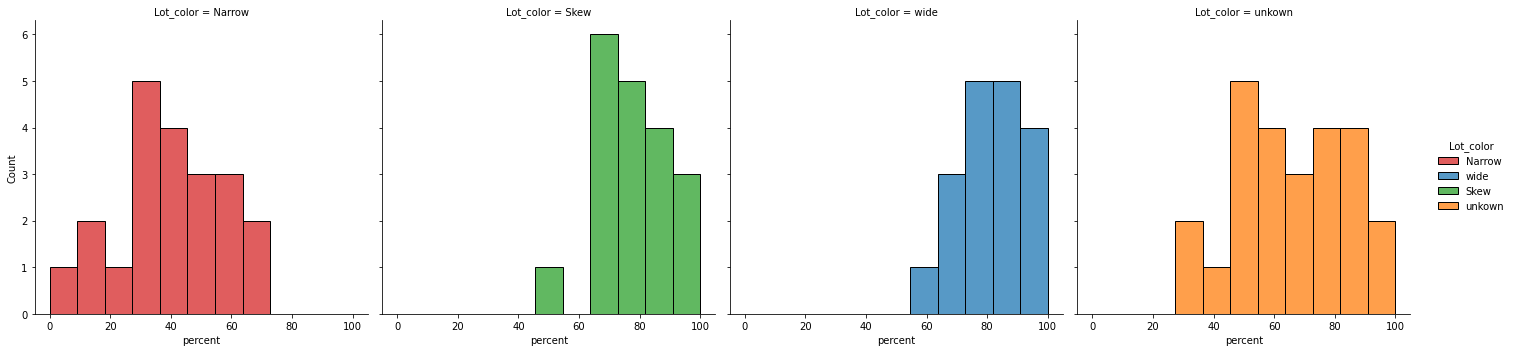

sub-1243


dist      means       stds      skew       sub
0       narrow  32.142857  14.769288  0.073336  sub-1243
1         skew  73.125000  20.564938 -0.060980  sub-1243
2  True_unkown  43.846154  25.993096 -0.265194  sub-1243
3         wide  52.941176  40.583972 -0.114401  sub-1243

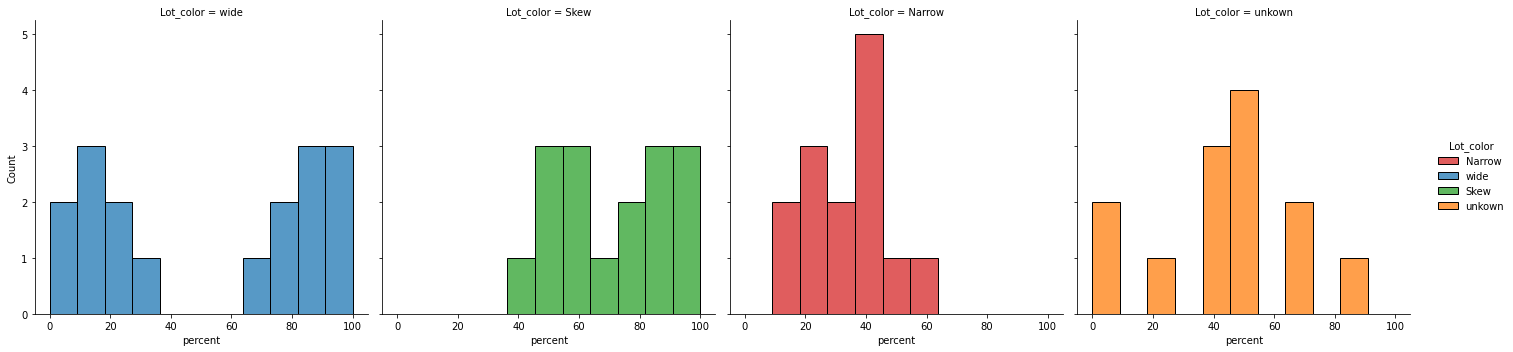

sub-3173


dist      means       stds      skew       sub
0       narrow  53.888889   9.785276  0.349658  sub-3173
1         skew  80.384615  13.410673 -0.183070  sub-3173
2  True_unkown  25.882353  11.213175 -0.249289  sub-3173
3         wide  50.000000  36.562851 -0.057428  sub-3173

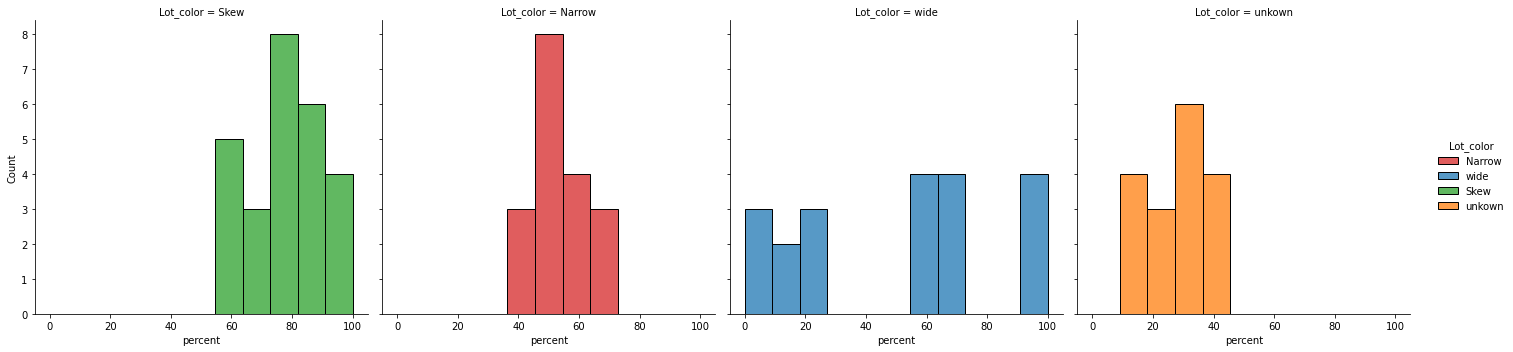

sub-3152


dist      means       stds      skew       sub
0       narrow  21.250000  13.601471 -0.073805  sub-3152
1         skew  74.736842  15.043796  0.056379  sub-3152
2  True_unkown  50.000000   7.254763  0.000000  sub-3152
3         wide  47.647059  47.503870  0.126264  sub-3152

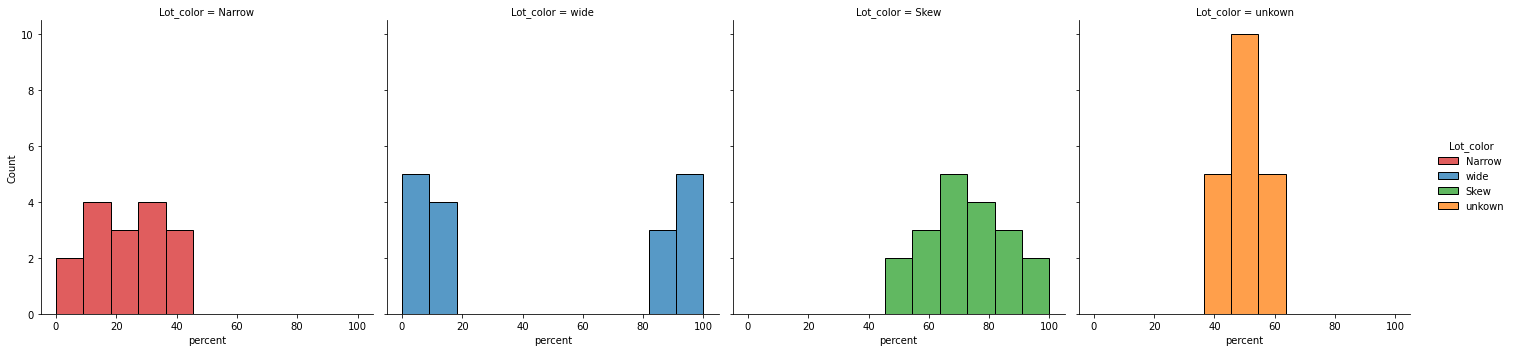

sub-1001


dist      means       stds      skew       sub
0       narrow  22.222222  19.860625  0.222881  sub-1001
1         skew  83.000000  11.595018  0.342125  sub-1001
2  True_unkown  47.419355  25.686279 -0.223343  sub-1001
3         wide  52.727273  33.493554  0.100812  sub-1001

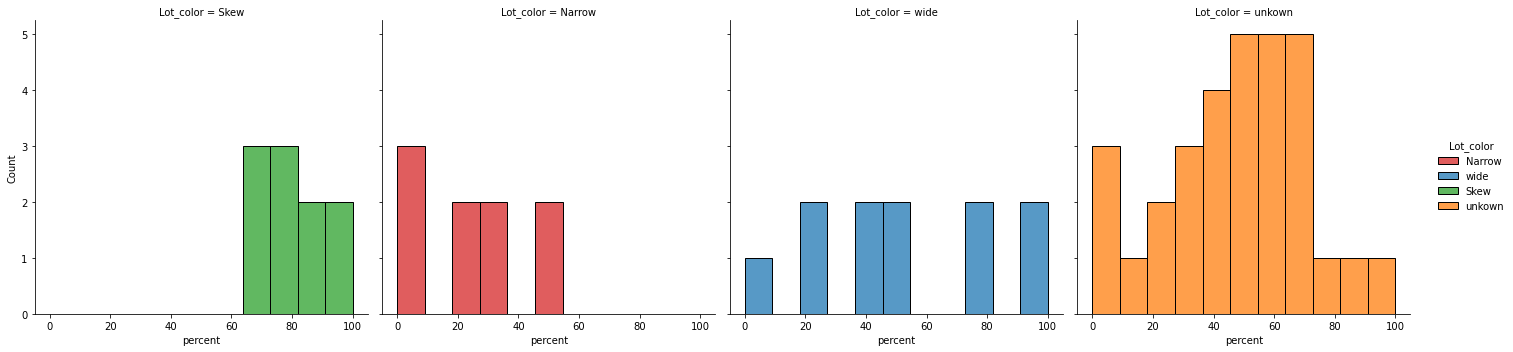

sub-1276
sub-1247
sub-3140


dist      means       stds      skew       sub
0       narrow  45.789474  17.099639 -0.150261  sub-3140
1         skew  62.400000  26.025628 -0.779465  sub-3140
2  True_unkown  49.090909  29.706760  0.113627  sub-3140
3         wide  56.666667  32.392520 -0.435083  sub-3140

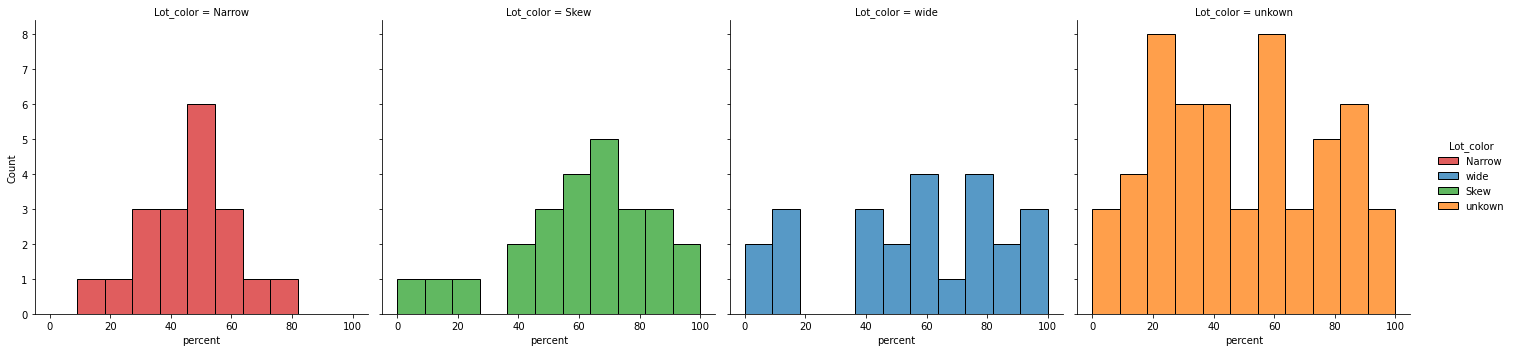

sub-1012


dist      means       stds      skew       sub
0       narrow  50.000000  20.493902  0.000000  sub-1012
1         skew  58.888889  22.072143 -0.821803  sub-1012
2  True_unkown  50.000000  43.969687  0.000000  sub-1012
3         wide  50.000000  41.598495  0.000000  sub-1012

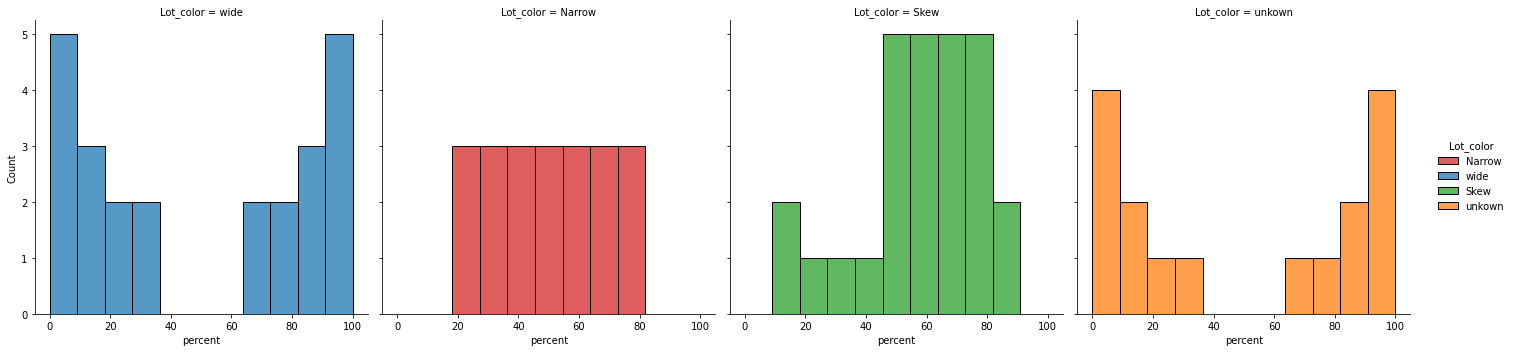

sub-3125


dist      means       stds      skew       sub
0       narrow  47.142857  12.666474  0.097334  sub-3125
1         skew  81.818182  11.677484  0.498585  sub-3125
2  True_unkown  50.000000  52.704628  0.000000  sub-3125
3         wide  50.714286  47.143690 -0.021343  sub-3125

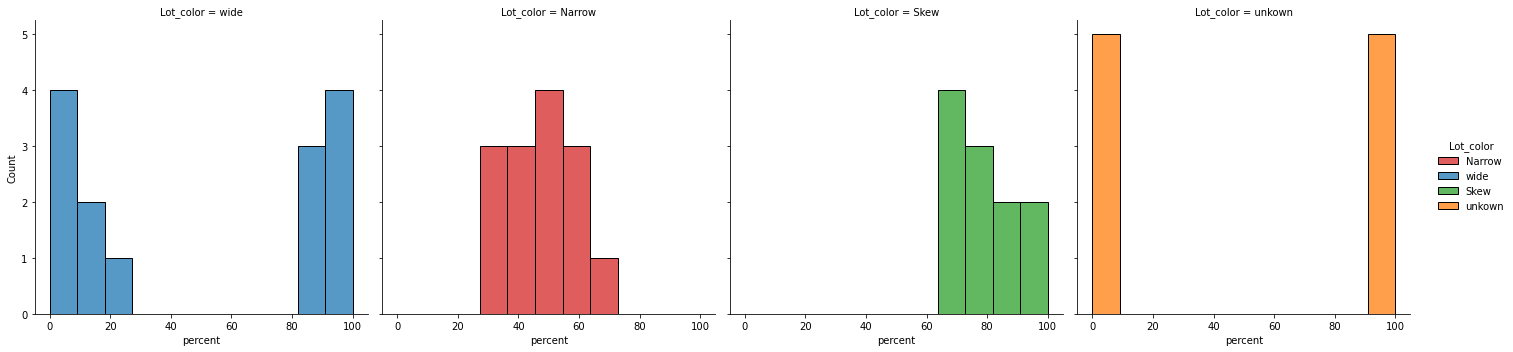

sub-1013


dist      means       stds      skew       sub
0       narrow  49.523810  12.835961 -0.216630  sub-1013
1         skew  74.761905  14.006801  0.234848  sub-1013
2  True_unkown  81.692308  16.160255 -0.627107  sub-1013
3         wide  54.062500  32.513955 -0.166728  sub-1013

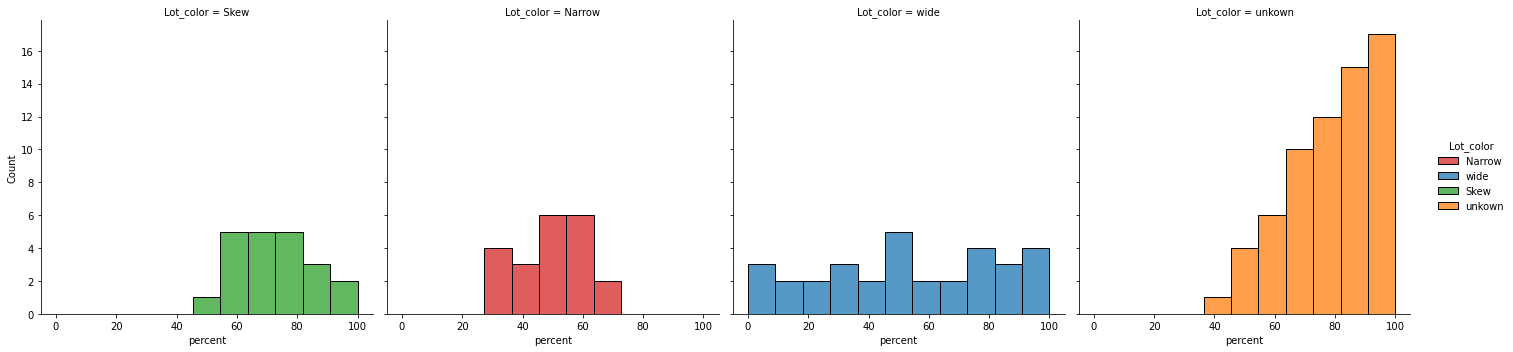

sub-1021


dist      means       stds      skew       sub
0       narrow  21.666667  16.020820  1.353758  sub-1021
1         skew  69.166667  17.816404  0.727923  sub-1021
2  True_unkown  64.000000  21.186998  0.392544  sub-1021
3         wide  63.571429  21.699749  0.200036  sub-1021

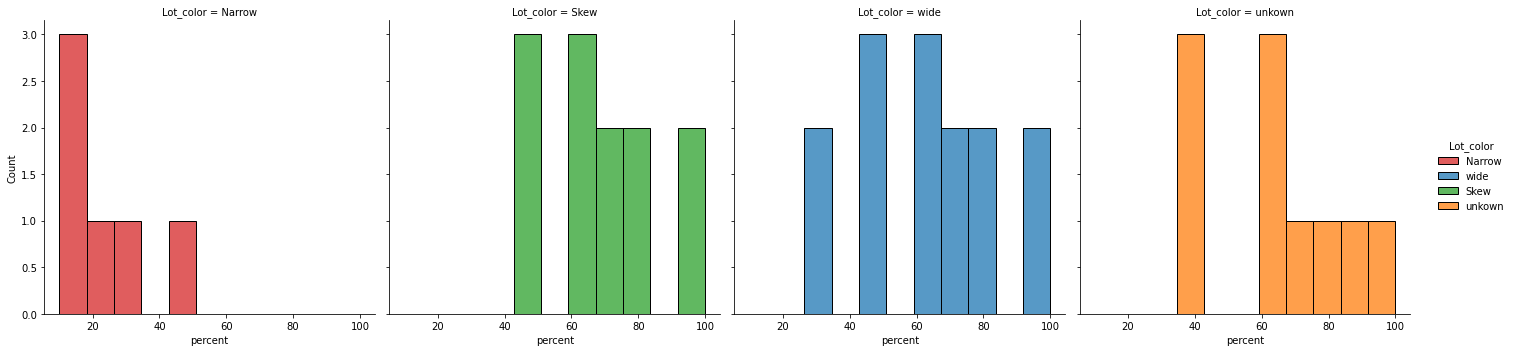

sub-1245


dist  means       stds      skew       sub
0       narrow     61   8.755950 -0.223451  sub-1245
1         skew     87  11.595018 -0.342125  sub-1245
2  True_unkown     46  20.655911  2.280673  sub-1245
3         wide     50  48.762463  0.000000  sub-1245

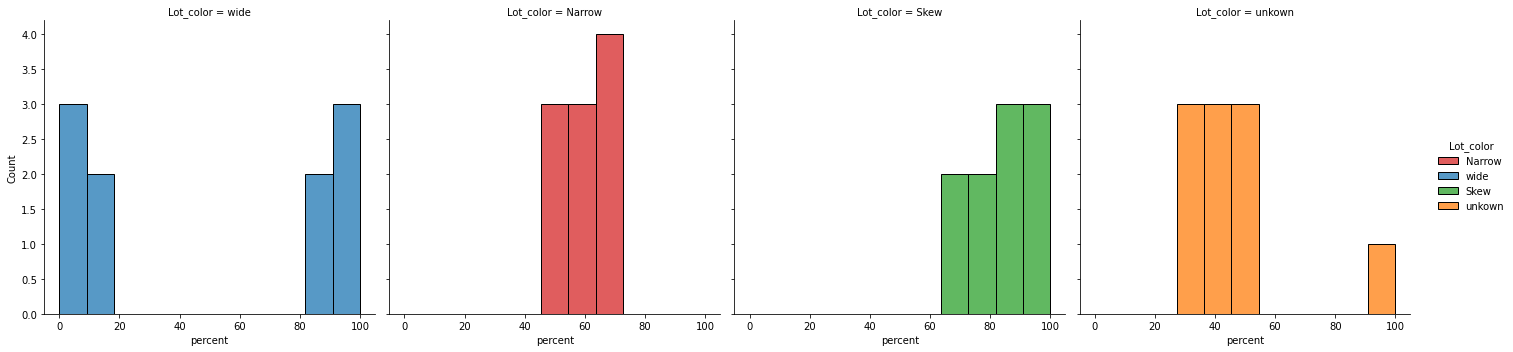

sub-1011


dist      means       stds      skew       sub
0       narrow  45.833333   9.962049 -0.274324  sub-1011
1         skew  82.500000  11.254629 -0.240503  sub-1011
2  True_unkown  27.368421  22.568933  1.953808  sub-1011
3         wide  50.000000  48.843774 -0.093361  sub-1011

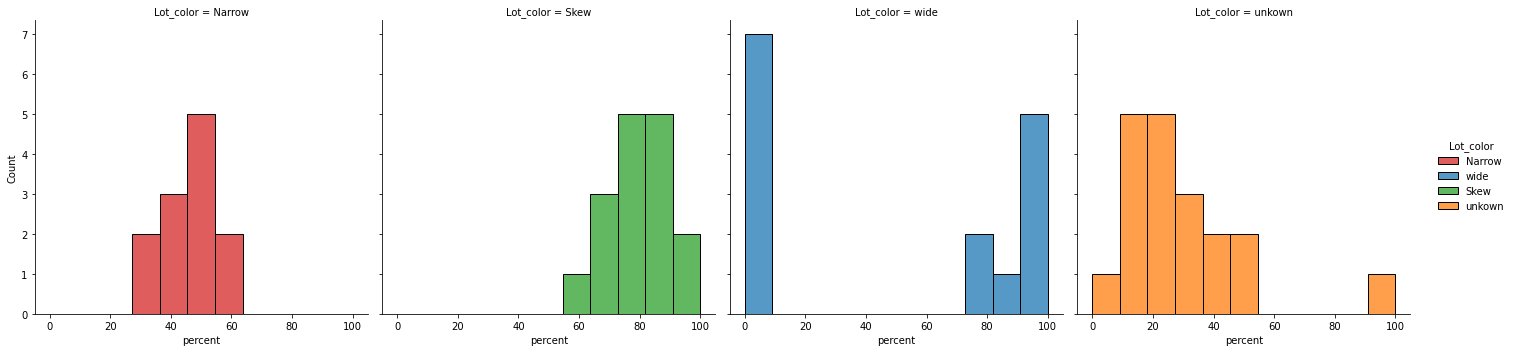

sub-1286


dist      means       stds      skew       sub
0       narrow  39.166667  36.545945  0.549212  sub-1286
1         skew  63.529412  31.808249 -0.827908  sub-1286
2  True_unkown  62.000000  25.410909 -0.951147  sub-1286
3         wide  50.000000  32.732684 -0.239704  sub-1286

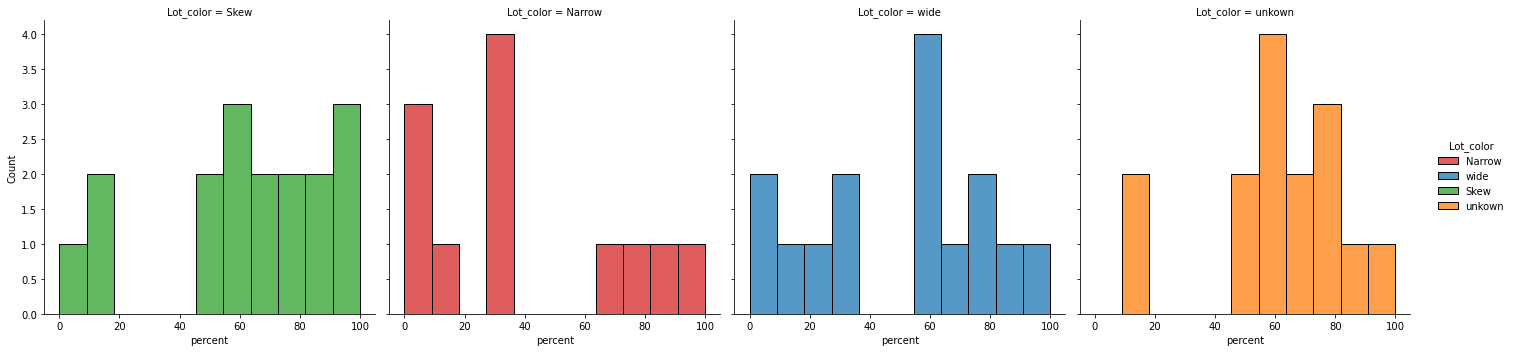

sub-3146


dist      means       stds      skew       sub
0       narrow  62.777778  20.524177  0.037799  sub-3146
1         skew  71.250000  17.078251 -0.312607  sub-3146
2  True_unkown  30.666667  21.865389  2.504038  sub-3146
3         wide  58.461538  44.692683 -0.508941  sub-3146

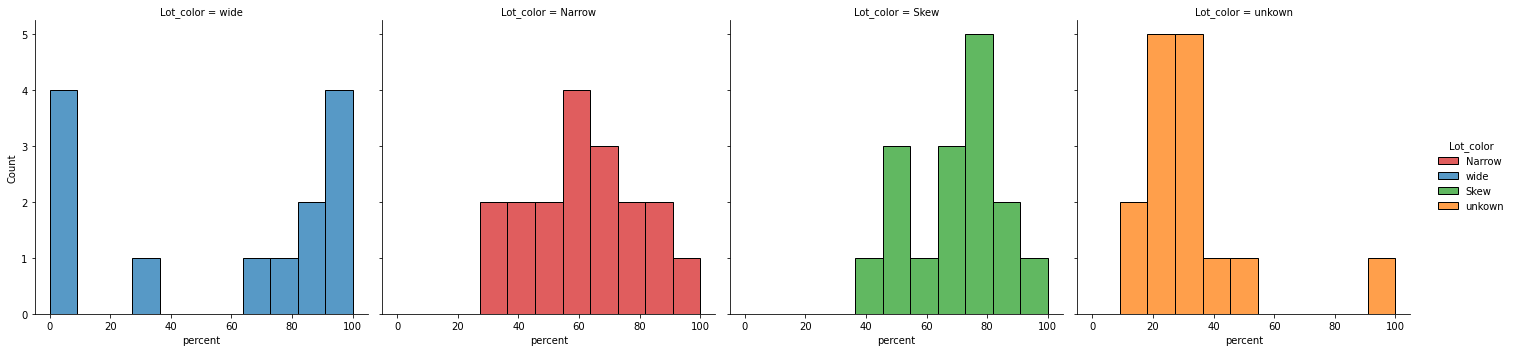

sub-1015


dist      means       stds      skew       sub
0       narrow  51.000000  22.509257  0.053675  sub-1015
1         skew  81.304348  12.174619 -0.270665  sub-1015
2  True_unkown  50.833333  26.689302  0.142277  sub-1015
3         wide  15.263158  16.454794  0.700687  sub-1015

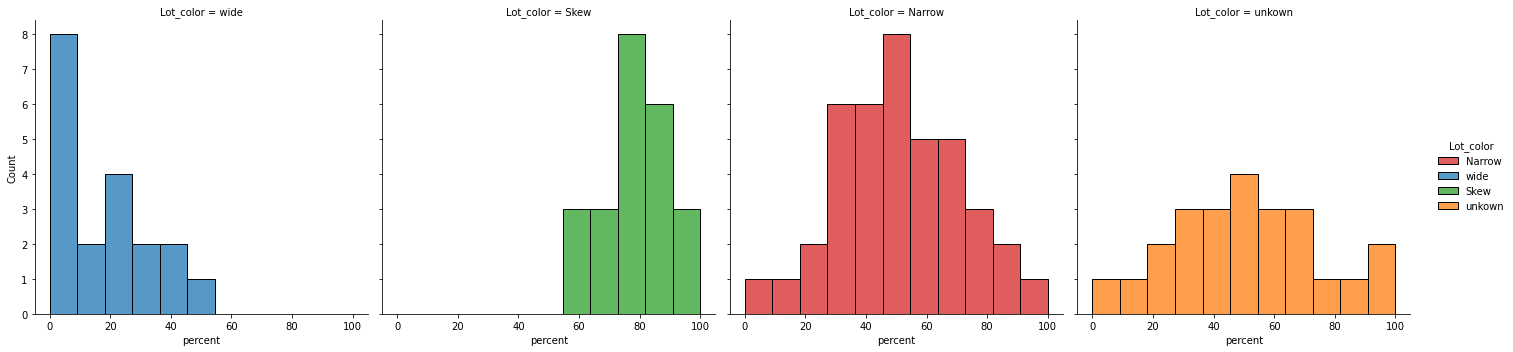

sub-1282


dist      means       stds      skew       sub
0       narrow  42.222222  16.647047 -0.395985  sub-1282
1         skew  74.444444  17.225911 -0.399268  sub-1282
2  True_unkown  50.526316  18.995229  0.350982  sub-1282
3         wide  57.777778  26.910649 -0.243569  sub-1282

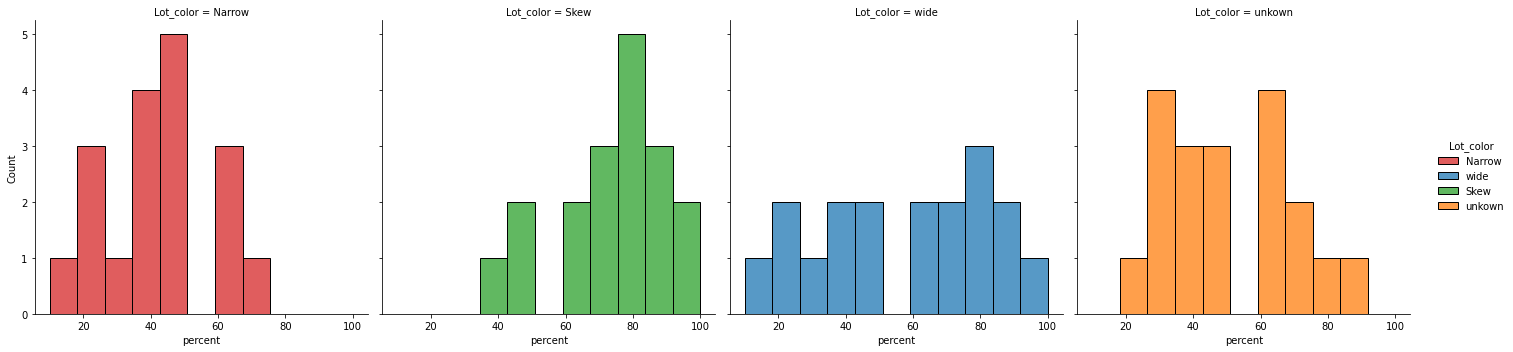

sub-3167


dist      means       stds      skew       sub
0       narrow  54.285714   8.701396 -0.010271  sub-3167
1         skew  65.833333  26.029526 -0.547226  sub-3167
2  True_unkown  49.354839  35.677769  0.287101  sub-3167
3         wide  45.294118  38.473548  0.209834  sub-3167

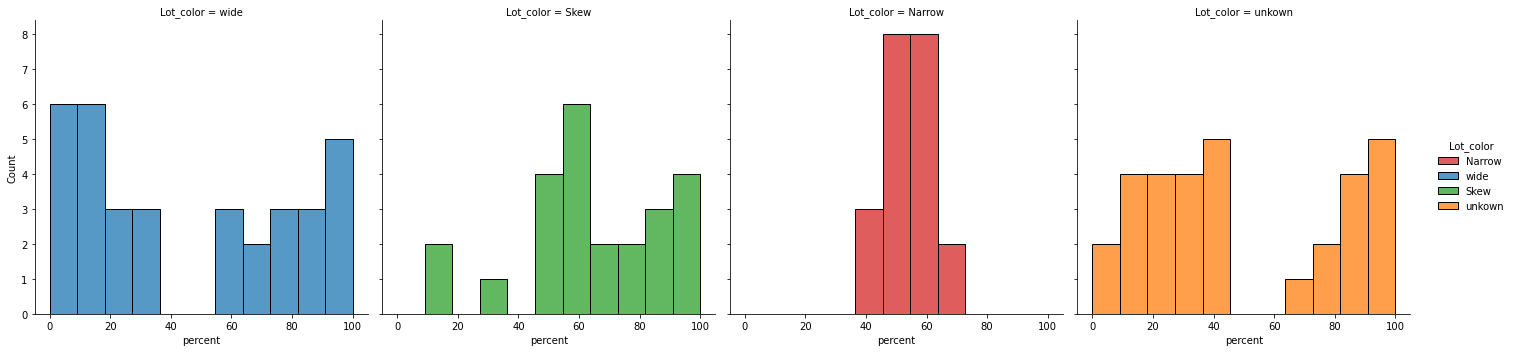

sub-3170


dist      means       stds      skew       sub
0       narrow  54.666667  12.459458 -0.296194  sub-3170
1         skew  76.428571   9.287827  0.185161  sub-3170
2  True_unkown  95.000000   5.222330  0.000000  sub-3170
3         wide  36.428571  43.607893  0.652037  sub-3170

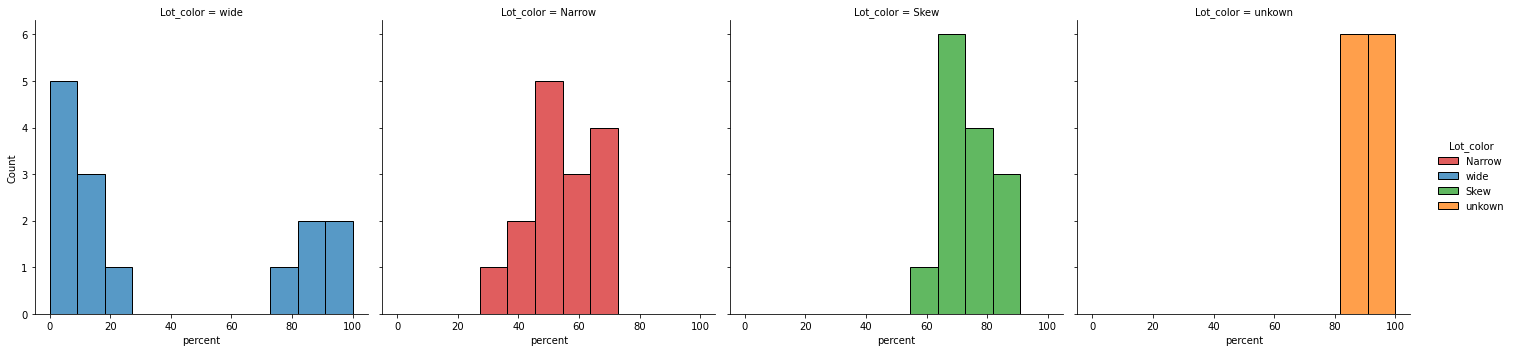

sub-3178


dist  means  stds  skew       sub
0       narrow     60   NaN   NaN  sub-3178
1         skew     90   NaN   NaN  sub-3178
2  True_unkown     60   NaN   NaN  sub-3178
3         wide     80   NaN   NaN  sub-3178

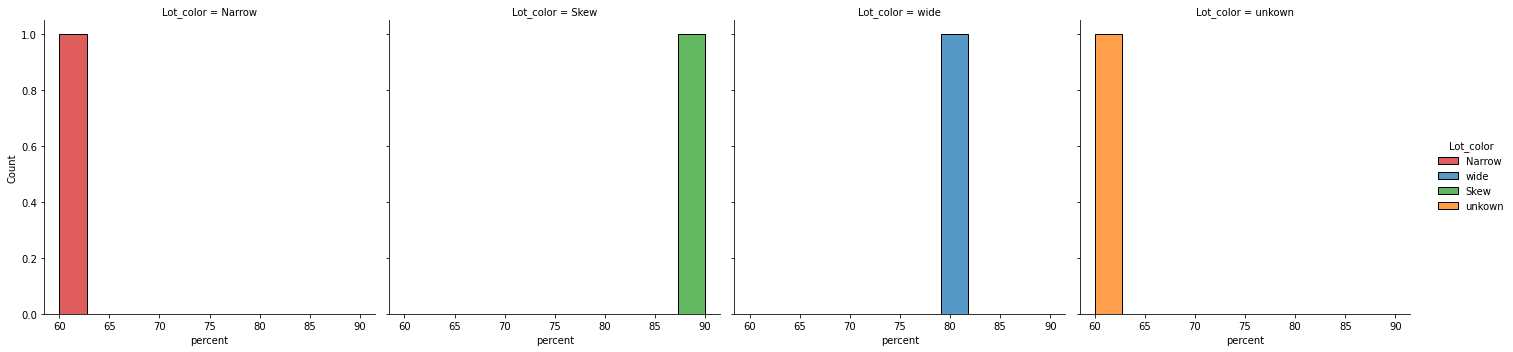

sub-3190


dist      means       stds      skew       sub
0       narrow  48.421053  21.670040 -0.139647  sub-3190
1         skew  70.000000  35.276684 -1.025060  sub-3190
2  True_unkown  39.545455  28.863764  0.219701  sub-3190
3         wide  44.782609  21.504664  1.414237  sub-3190

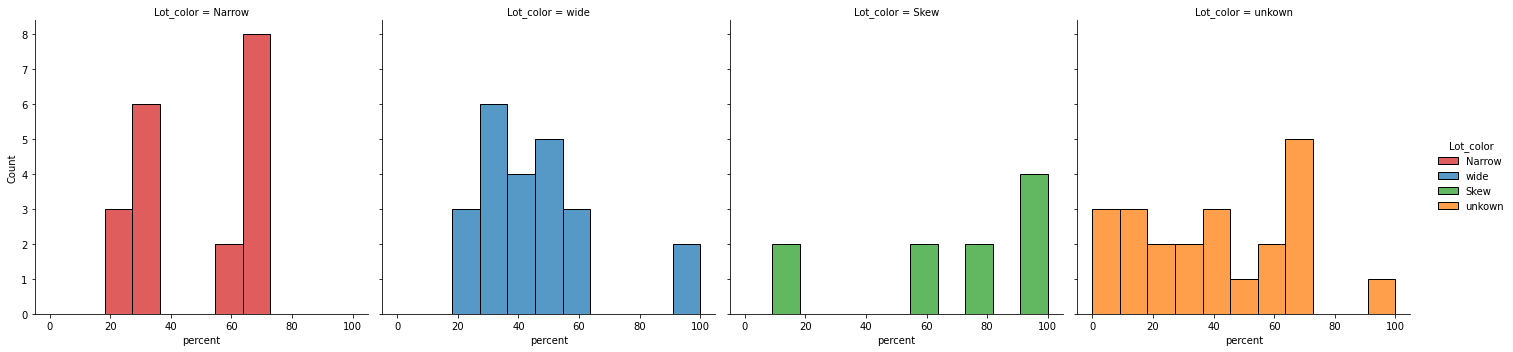

sub-1248


dist      means       stds      skew       sub
0       narrow  55.625000  20.966243  1.115053  sub-1248
1         skew  80.000000   9.258201  0.000000  sub-1248
2  True_unkown  29.523810  23.124920  0.331951  sub-1248
3         wide  56.764706  28.995359 -0.275471  sub-1248

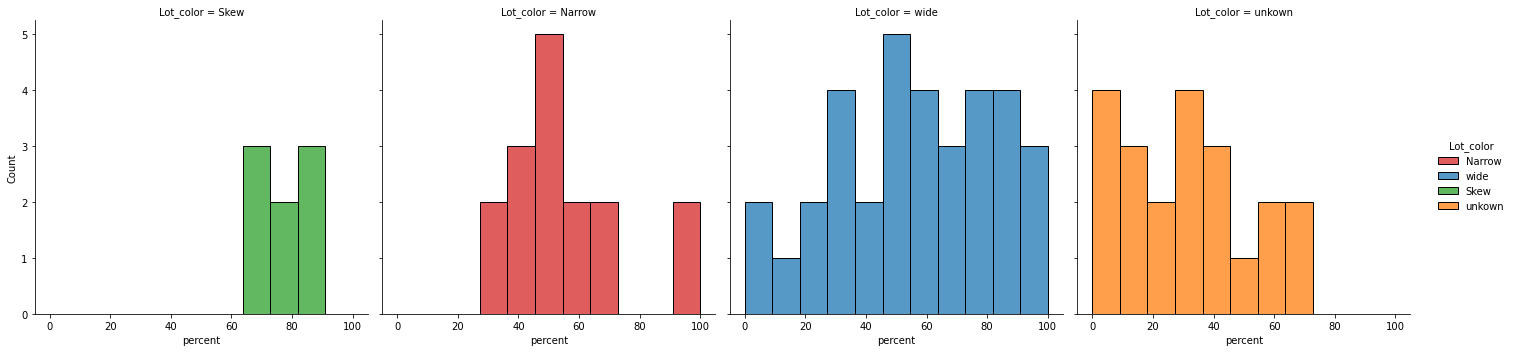

In [49]:
#with open('../data/sub-1013/1013_ManipulationCheck.pdf', 'rb') as f:
sub_df=[]
for sub in os.listdir('../data'):
    sub=sub[4:]
    checkFile='../data/sub-%s/%s_ManipulationCheck.pdf'%(sub,sub)
    if os.path.exists(checkFile):
        print('sub-%s'%(sub))
        f = PyPDF2.PdfFileReader(checkFile)
        ff = f.getFields()
        
        red=df_r[(df_r['sub']=='sub-'+sub)&(df_r['Lot_color']=='red')]['dist'].values[0]
        green=df_r[(df_r['sub']=='sub-'+sub)&(df_r['Lot_color']=='green')]['dist'].values[0]
        blue=df_r[(df_r['sub']=='sub-'+sub)&(df_r['Lot_color']=='blue')]['dist'].values[0]

        columns=np.array(['sub','best','worst',
                 red+'_0',red+'_10',red+'_20',red+'_30',red+'_40',red+'_50',red+'_60',red+'_70',red+'_80',red+'_90',red+'_100',
                 green+'_0',green+'_10',green+'_20',green+'_30',green+'_40',green+'_50',green+'_60',green+'_70',green+'_80',green+'_90',green+'_100',
                 blue+'_0',blue+'_10',blue+'_20',blue+'_30',blue+'_40',blue+'_50',blue+'_60',blue+'_70',blue+'_80',blue+'_90',blue+'_100',
                 'Acc_0','Acc_10','Acc_20','Acc_30','Acc_40','Acc_50','Acc_60','Acc_70','Acc_80','Acc_90','Acc_100',
                'unkown_0','unkown_10','unkown_20','unkown_30','unkown_40','unkown_50','unkown_60','unkown_70','unkown_80','unkown_90','unkown_100']).transpose()
        data=[ff[i]['/V'] for i in ff]

        df=pd.DataFrame(data=[data],columns=columns).melt(id_vars=['sub','best','worst'])
        df.replace('', 0, inplace=True) 
        df['value']=pd.to_numeric(df['value'],errors='coerce').fillna(0)
        
        df['Lot_color'] = df.variable.str.split('_', expand = True)[0]
        df['percent'] = pd.to_numeric(df.variable.str.split('_', expand = True)[1])
        df.percent=df.percent.astype(int)
        df['value']=df['value'].astype(int)
        df=pd.DataFrame(df.values.repeat(df.value, axis=0), columns=df.columns)
        df=df[df['Lot_color']!='Acc']
        df.percent=df.percent.apply(pd.to_numeric,errors='coerce')

        #display(df)
        #df=df[df['color']=='G']
        #sns.histplot(x='percent',data=df,color='Green',element='step',fill=True,bins=11,stat='probability')
        if sub!='3186':
            if np.any(df):
                mem_df=pd.DataFrame()
                mem_df['dist']=['narrow','skew','True_unkown','wide']
                mem_df['means']=df.groupby('Lot_color').mean()['percent'].values
                mem_df['stds']=df.groupby('Lot_color').std()['percent'].values
                mem_df['skew']=df.groupby('Lot_color').skew()['percent'].values
                mem_df['sub']='sub-%s'%(sub)
                display(mem_df)
                sub_df.append(mem_df)

                sns.displot(df, x="percent", col="Lot_color",hue='Lot_color',
                            hue_order=['Narrow','wide','Skew','unkown'], 
                            col_order=['Narrow','wide','Skew','unkown'],
                            palette=['tab:red','tab:blue','tab:green','tab:orange'],
                            bins=11)

                if sub=='test':
                    plt.savefig("test_dists.svg")
                plt.show()
           
            #display(df.groupby('Lot_color').mean(),df.groupby('Lot_color').std())
sub_df=pd.concat(sub_df)


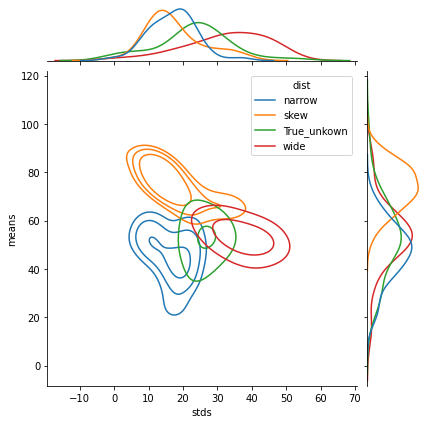

In [51]:
df_a=df_a[df_a['sub']!='sub-1007']
sns.jointplot(x='stds',y='means',hue='dist',kind='kde',levels=4,thresh=.4,data=sub_df)


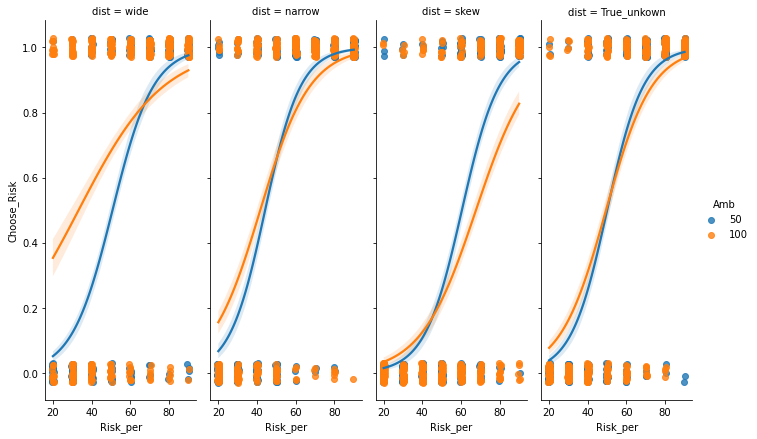

In [52]:

graph=sns.lmplot(x='Risk_per',y='Choose_Risk', data=df_a ,col='dist',height=6, aspect=.4,
           hue='Amb',logistic=True,x_jitter=0.5,y_jitter=0.03,ci=68)



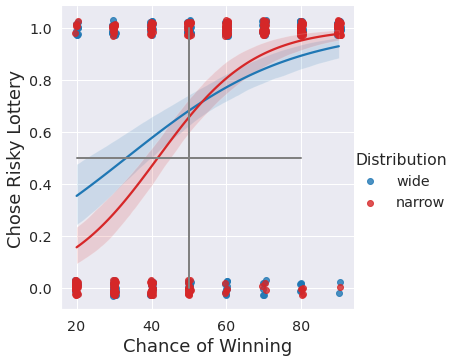

In [87]:
if 1==1:
    plotData=df_a[df_a['dist'].isin(['wide','narrow'])] # We need to get rid of the skew to make it fair
    plotData=plotData[plotData['Amb']==100]
    
    g=sns.lmplot(x='Risk_per',y='Choose_Risk', data=plotData ,
               hue='dist',logistic=True,x_jitter=0.5,y_jitter=0.03,palette=['tab:blue','tab:red'])
    plt.xlabel('Chance of Winning').set_fontsize('18')
    plt.ylabel('Chose Risky Lottery').set_fontsize('18')
    
    g._legend.set_title("Distribution")
    
    plt.plot([20,80], [0.5,0.5], linewidth=2,color='grey')
    plt.plot([50,50], [0,1], linewidth=2,color='grey')

# Axiom: Efficiently compound lotteries
- [x] Do participants show aversion to second order variance in the 100% ambiguous case?
    Yes

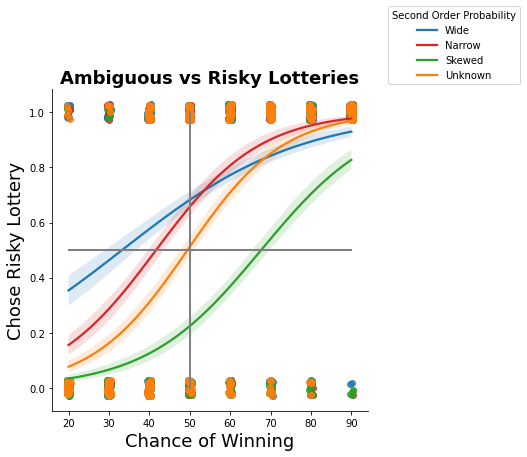

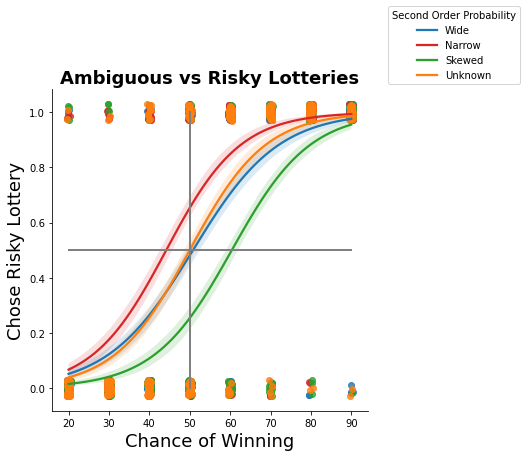

In [54]:
plotData=df_a[df_a['Amb']==100]
#plotData=plotData[plotData['dist'].isin(['wide','narrow'])]
    
ax=sns.lmplot(x='Risk_per',y='Choose_Risk', data=plotData ,
           hue='dist',palette=['tab:blue','tab:red','tab:green','tab:orange'],
              logistic=True,x_jitter=0.5,y_jitter=0.03,ci=68,legend=False)

plt.legend(title='Second Order Probability',bbox_to_anchor=(1.5,1),loc='lower right',
           labels=['Wide','Narrow','Skewed','Unknown'])

plt.title('Ambiguous vs Risky Lotteries',weight='bold').set_fontsize('18')
plt.xlabel('Chance of Winning').set_fontsize('18')
plt.ylabel('Chose Risky Lottery').set_fontsize('18')

#ax.axhline(y=0.5,color='grey')
#ax.axvline(x=50,color='grey')

plt.plot([20,90], [0.5,0.5], linewidth=2,color='grey')
plt.plot([50,50], [0,1], linewidth=2,color='grey')

plt.savefig("Choice_behavior.svg")
plotData=df_a[df_a['Amb']==50]
    
ax=sns.lmplot(x='Risk_per',y='Choose_Risk', data=plotData ,
           hue='dist',palette=['tab:blue','tab:red','tab:green','tab:orange'],
              logistic=True,x_jitter=0.5,y_jitter=0.03,ci=68,legend=False)

plt.legend(title='Second Order Probability',bbox_to_anchor=(1.5,1),loc='lower right',
           labels=['Wide','Narrow','Skewed','Unknown'])

plt.title('Ambiguous vs Risky Lotteries',weight='bold').set_fontsize('18')
plt.xlabel('Chance of Winning').set_fontsize('18')
plt.ylabel('Chose Risky Lottery').set_fontsize('18')

#ax.axhline(y=0.5,color='grey')
#ax.axvline(x=50,color='grey')

plt.plot([20,90], [0.5,0.5], linewidth=2,color='grey')
plt.plot([50,50], [0,1], linewidth=2,color='grey')

plt.savefig("Choice_behavior.svg")

Narrow vs Wide At 100
[1] "Model is nearly unidentifiable: large eigenvalue ratio\n - Rescale variables?"
[2] " \n"                                                                          

Formula: Choose_Risk~dist*Risk_per+(1|sub)+(dist|sub)

Family: binomial	 Inference: parametric

Number of observations: 644	 Groups: {'sub': 42.0}

Log-likelihood: -284.737 	 AIC: 585.475

Random effects:

              Name    Var    Std
sub    (Intercept)  0.276  0.525
sub.1  (Intercept)  1.883  1.372
sub.1     distwide  3.144  1.773

               IV1       IV2   Corr
sub.1  (Intercept)  distwide -0.758

Fixed effects:



Estimate    2.5_ci   97.5_ci        SE         OR  \
(Intercept)       -4.357648 -5.611314 -3.103982  0.639637   0.012808   
distwide           2.393758  0.833750  3.953767  0.795937  10.954586   
Risk_per           0.104143  0.078847  0.129439  0.012906   1.109759   
distwide:Risk_per -0.045710 -0.076476 -0.014944  0.015697   0.955319   

                   OR_2.5_ci  OR_97.5_ci      Prob  Prob_2.5_ci  Prob_97.5_ci  \
(Intercept)         0.003656    0.044870  0.012646     0.003643      0.042943   
distwide            2.301934   52.131354  0.916350     0.697147      0.981179   
Risk_per            1.082038    1.138190  0.526012     0.519701      0.532315   
distwide:Risk_per   0.926375    0.985167  0.488574     0.480890      0.496264   

                     Z-stat         P-val  Sig  
(Intercept)       -6.812686  9.579333e-12  ***  
distwide           3.007471  2.634315e-03   **  
Risk_per           8.069031  7.085841e-16  ***  
distwide:Risk_per -2.911982  3.591439e-03   **

SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Using original model contrasts, orthogonality not guaranteed)


DF          SS          MS      F-stat
0   1    2.279512    2.279512    2.279512
1   1  129.967821  129.967821  129.967821
2   1   11.201133   11.201133   11.201133

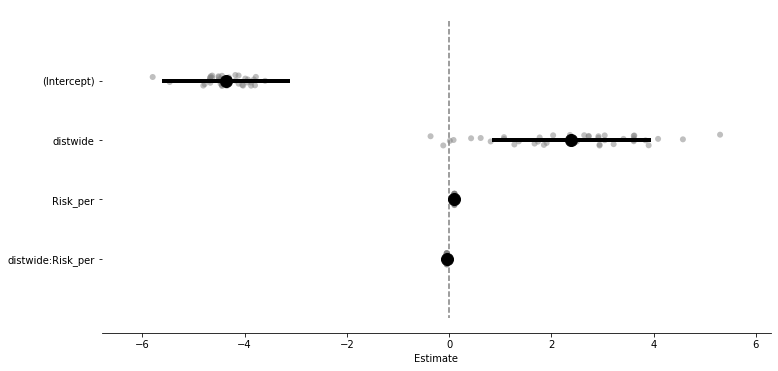

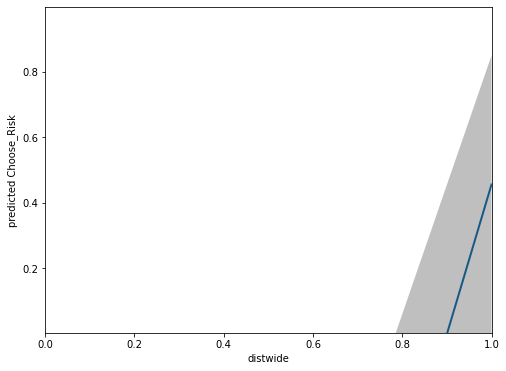

In [55]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.genmod.bayes_mixed_glm
from pymer4.models import Lmer,Lm

print("Narrow vs Wide At 100")

mod_df=df_a[(df_a['dist'].isin(['narrow','wide']))&(df_a['Amb']==100)]

model = Lmer("Choose_Risk ~dist*Risk_per+(1|sub)+(dist|sub)", data=mod_df, family='binomial')
model.fit(robust="hcl")
display(model.coefs)

model.plot_summary()
model.plot("distwide", plot_ci=True, ylabel="predicted Choose_Risk")


display(model.anova())
# Pairwise comparisons



array(['sub-1240', 'sub-1302', 'sub-1300', 'sub-3166', 'sub-1242',
       'sub-1253', 'sub-3164', 'sub-3122', 'sub-1294', 'sub-1010',
       'sub-1301', 'sub-1009', 'sub-1251', 'sub-3101', 'sub-3176',
       'sub-3116', 'sub-3175', 'sub-1243', 'sub-3173', 'sub-3152',
       'sub-1001', 'sub-3140', 'sub-1012', 'sub-3125', 'sub-1013',
       'sub-1021', 'sub-1245', 'sub-1011', 'sub-1286', 'sub-3146',
       'sub-1015', 'sub-1282', 'sub-3167', 'sub-3170', 'sub-3178',
       'sub-3190', 'sub-1248'], dtype=object)

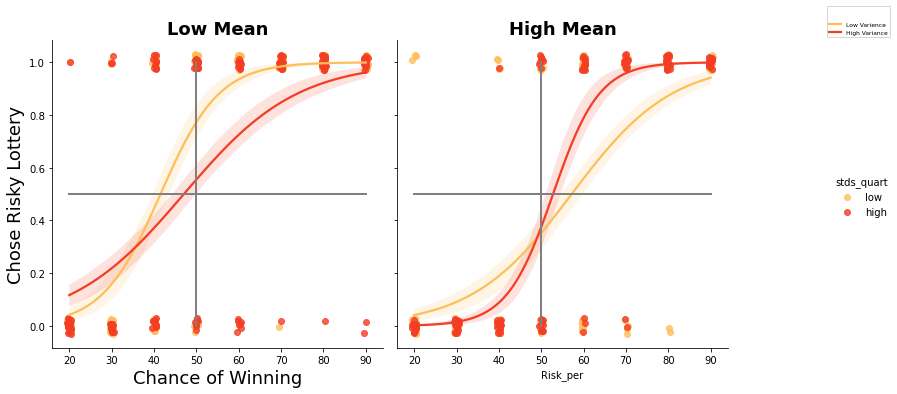

Model failed to converge with max|grad| = 0.0350337 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: Choose_Risk~Risk_per*means_quart*stds_quart+(1|Amb)+(1|sub)

Family: binomial	 Inference: parametric

Number of observations: 589	 Groups: {'sub': 36.0, 'Amb': 2.0}

Log-likelihood: -187.389 	 AIC: 394.778

Random effects:

            Name    Var    Std
sub  (Intercept)  1.192  1.092
Amb  (Intercept)  0.000  0.000

No random effect correlations specified

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE  \
(Intercept)                              -5.801  -7.414   -4.188  0.823   
Risk_per                                  0.133   0.099    0.167  0.017   
means_quartTRUE                          -2.529  -5.154    0.096  1.339   
stds_quart.L                              1.885  -0.253    4.024  1.091   
Risk_per:means_quartTRUE                  0.021  -0.029    0.070  0.025   
Risk_per:stds_quart.L                    -0.055  -0.099   -0.010  0.023   
means_quartTRUE:stds_quart.L             -5.660  -9.394   -1.926  1.905   
Risk_per:means_quartTRUE:stds_quart.L     0.132   0.061    0.203  0.036   

                                          OR  OR_2.5_ci  OR_97.5_ci   Prob  \
(Intercept)                            0.003      0.001       0.015  0.003   
Risk_per                               1.142      1.104       1.182  0.533   
means_quartTRUE                        0.080      0.006       1.101  0.074   
stds_quart.L                           6.588      0.776      55.902  0.868   
Risk_per:means_quartTRUE               1.021      0.972       1.073  0.505   
Risk_per:stds_quart.L                  0.947      0.906       0.990  0.486   
means_quartTRUE:stds_quart.L           0.003      0.000       0.146  0.003   
Risk_per:means_quartTRUE:stds_quart.L  1.141      1.063       1.225  0.533   

                                       Prob_2.5_ci  Prob_97.5_ci  Z-stat  \
(Intercept)                                  0.001         0.015  -7.048   
Risk_per                                     0.525         0.542   7.688   
means_quartTRUE                              0.006         0.524  -1.888   
stds_quart.L                                 0.437         0.982   1.728   
Risk_per:means_quartTRUE                     0.493         0.518   0.819   
Risk_per:stds_quart.L                        0.475         0.498  -2.396   
means_quartTRUE:stds_quart.L                 0.000         0.127  -2.971   
Risk_per:means_quartTRUE:stds_quart.L        0.515         0.550   3.651   

                                       P-val  Sig  
(Intercept)                            0.000  ***  
Risk_per                               0.000  ***  
means_quartTRUE                        0.059    .  
stds_quart.L                           0.084    .  
Risk_per:means_quartTRUE               0.413       
Risk_per:stds_quart.L                  0.017    *  
means_quartTRUE:stds_quart.L           0.003   **  
Risk_per:means_quartTRUE:stds_quart.L  0.000  ***

In [59]:
#sns.set_style("white")
mod_df=pd.merge(sub_df,df_a,on=['sub','dist'])

display(mod_df['sub'].unique())
mod_df=mod_df[(mod_df['dist']=='True_unkown')]
#mod_df=mod_df[(mod_df['dist']=='True_unkown')&(mod_df['Amb']==100)]


#mod_df['stds_quart']=pd.qcut(mod_df['stds'],q=2,labels=['low','high'])
#mod_df['means_quart']=pd.qcut(mod_df['means'],q=2,labels=['low','high'])
mod_df['means_quart']=mod_df['means']>50
mod_df['stds_quart']=pd.qcut(mod_df['stds'],q=2,labels=['low','high'])


ax=sns.lmplot(x='Risk_per',y='Choose_Risk', data=mod_df ,col='means_quart',
           hue='stds_quart', palette='YlOrRd',logistic=True,x_jitter=0.5,y_jitter=0.03,ci=68)

plt.legend(title=' ',bbox_to_anchor=(1.5,1),loc='lower right',prop={'size': 6},
           labels=['Low Varience','High Variance'])
ax.axes[0][0].plot([20,90],[.5,.5],linewidth=2,color='grey')
ax.axes[0][0].plot([50,50],[0,1],linewidth=2,color='grey')

ax.axes[0][1].plot([20,90],[.5,.5],linewidth=2,color='grey')
ax.axes[0][1].plot([50,50],[0,1],linewidth=2,color='grey')

ax.axes[0][0].set_xlabel('Chance of Winning').set_fontsize('18')
ax.axes[0][0].set_ylabel('Chose Risky Lottery').set_fontsize('18')


ax.axes[0][0].set_title('Low Mean',weight='bold').set_fontsize('18')
ax.axes[0][1].set_title('High Mean',weight='bold').set_fontsize('18')

plt.savefig("unkown.svg")
#plt.
#plt.ylabel('Chose Risky Lottery').set_fontsize('18')
plt.show()

model = Lmer("Choose_Risk ~Risk_per*means_quart*stds_quart+(1|Amb)+(1|sub)", data=mod_df, family='binomial')
display(model.fit(robust="hcl"))

#plt.title('Ambiguous vs Risky Lotteries',weight='bold').set_fontsize('18')


Risk_per  Money Color  Amb  RiskisLeft response        RT  dist       sub  \
32        20     13   red  100           0    ['f']  1.715080  skew  sub-1240   
33        30     13   red  100           1    ['j']  2.982916  skew  sub-1240   
34        40     13   red  100           1    ['f']  1.738789  skew  sub-1240   
35        50     13   red  100           0    ['j']  1.771367  skew  sub-1240   
36        60     13   red  100           0    ['f']  2.293741  skew  sub-1240   
..       ...    ...   ...  ...         ...      ...       ...   ...       ...   
43        50     13   red   50           1    ['j']  1.519935  skew  sub-1248   
44        60     13   red   50           1    ['j']  1.209338  skew  sub-1248   
45        70     13   red   50           0    ['j']  1.061123  skew  sub-1248   
46        80     13   red   50           1    ['f']  0.920462  skew  sub-1248   
47        90     13   red   50           0    ['j']  0.680201  skew  sub-1248   

    Choose_Risk  
32        False  
33        False  
34         True  
35         True  
36        False  
..          ...  
43        False  
44        False  
45         True  
46         True  
47         True  

[669 rows x 10 columns]

[1] "Model failed to converge with max|grad| = 3.1523 (tol = 0.002, component 1)"
[2] " \n"                                                                        

[1] "Model is nearly unidentifiable: very large eigenvalue\n - Rescale variables?"
[2] " \n"                                                                         

Formula: Choose_Risk~Amb*Risk_per+(1|sub)

Family: binomial	 Inference: parametric

Number of observations: 669	 Groups: {'sub': 42.0}

Log-likelihood: -253.818 	 AIC: 517.636

Random effects:

            Name    Var    Std
sub  (Intercept)  1.777  1.333

No random effect correlations specified

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE     OR  OR_2.5_ci  OR_97.5_ci  \
(Intercept)     -9.743  -9.750   -9.736  0.003  0.000      0.000       0.000   
Amb              0.036   0.030    0.042  0.003  1.037      1.031       1.043   
Risk_per         0.172   0.166    0.178  0.003  1.188      1.180       1.195   
Amb:Risk_per    -0.001  -0.001   -0.001  0.000  0.999      0.999       0.999   

               Prob  Prob_2.5_ci  Prob_97.5_ci    Z-stat  P-val  Sig  
(Intercept)   0.000        0.000         0.000 -2853.588    0.0  ***  
Amb           0.509        0.508         0.511    11.885    0.0  ***  
Risk_per      0.543        0.541         0.544    54.931    0.0  ***  
Amb:Risk_per  0.500        0.500         0.500   -13.120    0.0  ***

Formula: Choose_Risk~Amb*Risk_per+(1|sub)

Family: binomial	 Inference: parametric

Number of observations: 669	 Groups: {'sub': 42.0}

Log-likelihood: -253.818 	 AIC: 517.636

Random effects:

            Name    Var    Std
sub  (Intercept)  1.777  1.333

No random effect correlations specified

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE     OR  OR_2.5_ci  OR_97.5_ci  \
(Intercept)     -9.743  -9.750   -9.736  0.003  0.000      0.000       0.000   
Amb              0.036   0.030    0.042  0.003  1.037      1.031       1.043   
Risk_per         0.172   0.166    0.178  0.003  1.188      1.180       1.195   
Amb:Risk_per    -0.001  -0.001   -0.001  0.000  0.999      0.999       0.999   

               Prob  Prob_2.5_ci  Prob_97.5_ci    Z-stat  P-val  Sig  
(Intercept)   0.000        0.000         0.000 -2853.588    0.0  ***  
Amb           0.509        0.508         0.511    11.885    0.0  ***  
Risk_per      0.543        0.541         0.544    54.931    0.0  ***  
Amb:Risk_per  0.500        0.500         0.500   -13.120    0.0  ***

Estimate    2.5_ci   97.5_ci        SE        OR  OR_2.5_ci  \
(Intercept)  -9.742844 -9.749536 -9.736152  0.003414  0.000059   0.000058   
Amb           0.036414  0.030409  0.042419  0.003064  1.037085   1.030876   
Risk_per      0.171965  0.165829  0.178101  0.003131  1.187637   1.180372   
Amb:Risk_per -0.000817 -0.000940 -0.000695  0.000062  0.999183   0.999061   

              OR_97.5_ci      Prob  Prob_2.5_ci  Prob_97.5_ci       Z-stat  \
(Intercept)     0.000059  0.000059     0.000058      0.000059 -2853.587991   
Amb             1.043331  0.509102     0.507602      0.510603    11.884907   
Risk_per        1.194946  0.542886     0.541363      0.544408    54.931179   
Amb:Risk_per    0.999305  0.499796     0.499765      0.499826   -13.120297   

                     P-val  Sig  
(Intercept)   0.000000e+00  ***  
Amb           1.417931e-32  ***  
Risk_per      0.000000e+00  ***  
Amb:Risk_per  2.519450e-39  ***

<AxesSubplot:xlabel='Estimate'>

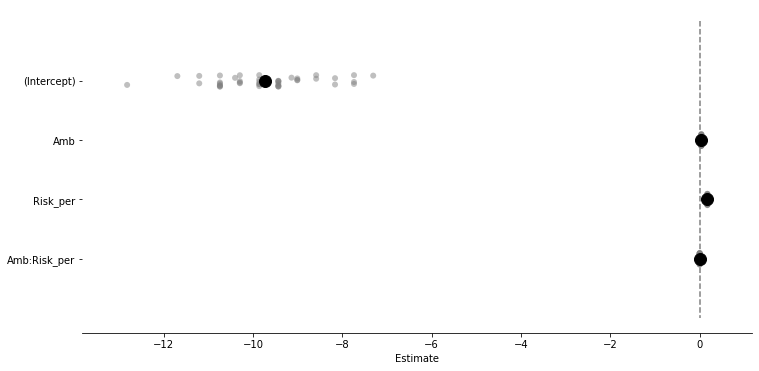

In [30]:
mod_df=df_a[(df_a['dist'].isin(['skew']))&(df_a['Amb'].isin([50,100]))]
display(mod_df)

model = Lmer("Choose_Risk ~Amb*Risk_per+(1|sub)", data=mod_df, family='binomial')
display(model.fit(robust='hcl'))
display(model.summary())
display(model.coefs)

model.plot_summary()

## Individual Differences
- [ ] Beliefs
- [ ] Personality
- [ ] Choice

## Beliefs


dist      means       stds      skew       sub
0       narrow  22.222222  19.860625  0.222881  sub-1001
1         skew  83.000000  11.595018  0.342125  sub-1001
2  True_unkown  47.419355  25.686279 -0.223343  sub-1001
3         wide  52.727273  33.493554  0.100812  sub-1001

Number of subs with Complete Manipulation Checks =39
Test Skew(mean)>Other(mean) t=10.947383532379874 p=2.60080692924446e-13
Test Wide(std)>Other(std) t=nan p=nan


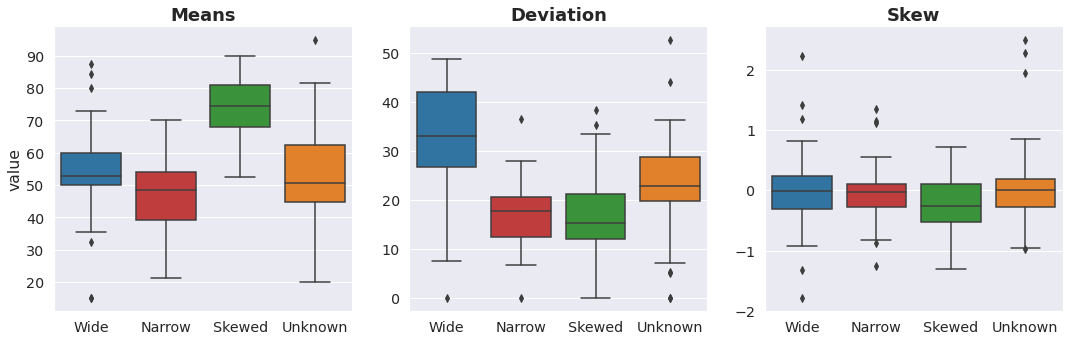

In [60]:
belief_df=sub_df.copy()

display(belief_df[belief_df['sub']=='sub-1001'])

print("Number of subs with Complete Manipulation Checks =%s"%(len(belief_df['sub'].unique())))

plt_df=belief_df.melt(id_vars=['sub','dist'])
#display(plt_df[plt_df['sub']=='sub-1001'])
sns.set(font_scale=1.3)  # crazy big

g=sns.catplot(x='dist',y='value',col='variable',data=plt_df,kind="box",sharey=False,
            order=['wide','narrow','skew','True_unkown'],
            palette=['tab:blue','tab:red','tab:green','tab:orange'])
g.set_axis_labels( "")
g.set_xticklabels(["Wide", "Narrow", "Skewed", "Unknown"])
g.set_titles('Means','Deviation','Skew')
g.axes[0][0].set_title('Means',weight='bold').set_fontsize('18')
g.axes[0][1].set_title('Deviation',weight='bold').set_fontsize('18')
g.axes[0][2].set_title('Skew',weight='bold').set_fontsize('18')
#plt.title("Realtionship Mania and Reported Means",weight='bold').set_fontsize('18')
#plt.xlabel('Reported Variance').set_fontsize('18')
#plt.ylabel('ASRM Score').set_fontsize('18')


from scipy import stats

a=belief_df[belief_df['dist']=='skew']['means']
b=belief_df[belief_df['dist']=='narrow']['means']
t,p=stats.ttest_rel(a,b)
print("Test Skew(mean)>Other(mean) t=%s p=%s"%(t,p))
a=belief_df[belief_df['dist']=='wide']['stds']
b=belief_df[belief_df['dist']=='narrow']['stds']
t,p=stats.ttest_rel(a,b)
print("Test Wide(std)>Other(std) t=%s p=%s"%(t,p))


plt.savefig("dist_memory.svg")

In [61]:
pal=sns.color_palette("tab10")
print(pal.as_hex())
pal


['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

## Personality

In [78]:

per_df=pd.read_csv('../data/participants2.csv')
per_df['participant_id']=per_df['participant_id'].astype(str)
per_df['sub']='sub-'+per_df['participant_id']
to_remove=[col for col in per_df.columns if 'appt2_q' in col]+['participant_id','Event Name']
per_df.drop(columns=to_remove,inplace=True)
per_df=per_df[per_df['sub'].isin(belief_df['sub'])].reset_index(drop=True)

print("A list of mood and clinical inventories")

display(per_df.columns)

display(per_df)

A list of mood and clinical inventories


Index(['Total BDI score', 'TEPS Anticipatory Scale', 'TEPS Consummatory Scale',
       'Total AADIS Score', 'SUSD Mania Scale', 'SUSD Depression Scale',
       'IRI subscale Perspective Taking', 'IRI subscale Fantasy',
       'IRI subscale Empathic Concern', 'IRI subscale Personal Distress',
       'AQ subscale Social Skill', 'AQ subscale Attention Switching',
       'AQ subscale Attention to detail', 'AQ subscale Communication',
       'AQ subscale Imagination', 'AQ Total', 'TEI Subscale wellbeing',
       'TEI Subscale selfcontrol', 'TEI Subscale emotionality',
       'TEI Subscale sociability',
       'TEI Total or global trait emotional intelligence', 'TOTAL PNR',
       'PVSS Total Score', 'PVSS Food Subscale',
       'PVSS Physical Touch Subscale', 'PVSS Outdoors Subscale',
       'PVSS Positive Feedback Subscale', 'PVSS Hobbies Subscale',
       'PVSS Social Interactions Subscale', 'PVSS Goals Subscale', 'TOTAL RSE',
       'TOTAL BPAQ', 'BPAQ Physical Subscale', 'BPAQ Verbal Su

Total BDI score  TEPS Anticipatory Scale  TEPS Consummatory Scale  \
0              28.0                     52.0                     40.0   
1               4.0                     47.0                     43.0   
2               0.0                     52.0                     50.0   
3              14.0                     27.0                     27.0   
4              11.0                     45.0                     42.0   
5               0.0                     48.0                     39.0   
6               6.0                     50.0                     45.0   
7              10.0                     47.0                     50.0   
8               8.0                     48.0                     49.0   
9              10.0                     21.0                     32.0   
10             24.0                     39.0                     42.0   
11              6.0                     37.0                     47.0   
12              3.0                     42.0                     50.0   
13              3.0                     51.0                     49.0   
14              6.0                     55.0                     52.0   
15              0.0                     34.0                     39.0   
16              2.0                      NaN                      NaN   
17             12.0                     49.0                     53.0   
18             10.0                      NaN                      NaN   
19              0.0                     51.0                     44.0   
20              7.0                     47.0                     50.0   
21             11.0                     46.0                     40.0   
22             14.0                     53.0                     46.0   
23              3.0                      NaN                      NaN   
24              3.0                     54.0                     47.0   
25              9.0                     56.0                     49.0   
26             15.0                      NaN                      NaN   
27             14.0                     54.0                     41.0   
28              NaN                     45.0                     40.0   
29              6.0                      NaN                      NaN   
30              NaN                     55.0                     51.0   
31              NaN                     47.0                     42.0   
32              NaN                      NaN                      NaN   
33              NaN                     44.0                     44.0   
34              NaN                     53.0                     34.0   
35              NaN                     42.0                     39.0   
36              2.0                     46.0                     43.0   
37              NaN                      NaN                      NaN   
38              NaN                     20.0                     36.0   

    Total AADIS Score  SUSD Mania Scale  SUSD Depression Scale  \
0                 0.0               5.0                   20.0   
1                 4.0               3.0                    6.0   
2                 0.0               0.0                    0.0   
3                 4.0               8.0                   10.0   
4                 0.0               3.0                    2.0   
5                 0.0               0.0                    0.0   
6                 3.0               2.0                    0.0   
7                 5.0               0.0                    5.0   
8                 2.0               4.0                    2.0   
9                 0.0               0.0                    3.0   
10                4.0               3.0                    5.0   
11                1.0               0.0                    0.0   
12                6.0               1.0                    0.0   
13                3.0               2.0                    2.0   
14                1.0               3.0                    5.0   
15                0.0      

## Choices


Number of subs with Complete Ambiguity Choices =42


sub         dist  Amb  Choose_Risk  Risk_per  Money   Color  \
0   sub-1001  True_unkown   50        False        60      8  yellow   
1   sub-1001  True_unkown   50         True        80      8  yellow   
2   sub-1001  True_unkown  100        False        60      8  yellow   
3   sub-1001  True_unkown  100         True        80      8  yellow   
4   sub-1001       narrow   50        False        80      8   green   
5   sub-1001       narrow   50         True        70      8   green   
6   sub-1001       narrow  100        False        40      8   green   
7   sub-1001       narrow  100         True        80      8   green   
8   sub-1001         skew   50        False        60      8     red   
9   sub-1001         skew   50         True        80      8     red   
10  sub-1001         skew  100        False        70      8     red   
11  sub-1001         skew  100         True        80      8     red   
12  sub-1001         wide   50        False        50      8    blue   
13  sub-1001         wide   50         True        80      8    blue   
14  sub-1001         wide  100        False        50      8    blue   
15  sub-1001         wide  100         True        80      8    blue   

    RiskisLeft response        RT  Max_risk  
0            1    ['j']  2.695651        60  
1            0    ['j']  3.295174        80  
2            1    ['j']  2.378856        60  
3            1    ['f']  1.886913        80  
4            1    ['j']  1.932334        80  
5            1    ['j']  1.354108        70  
6            1    ['j']  2.662421        40  
7            1    ['j']  1.324383        80  
8            0    ['f']  2.000311        60  
9            1    ['j']  2.448564        80  
10           1    ['j']  1.959695        70  
11           1    ['f']  1.536554        80  
12           1    ['j']  3.603561        50  
13           1    ['j']  2.023689        80  
14           1    ['j']  3.408539        50  
15           1    ['j']  1.825292        80

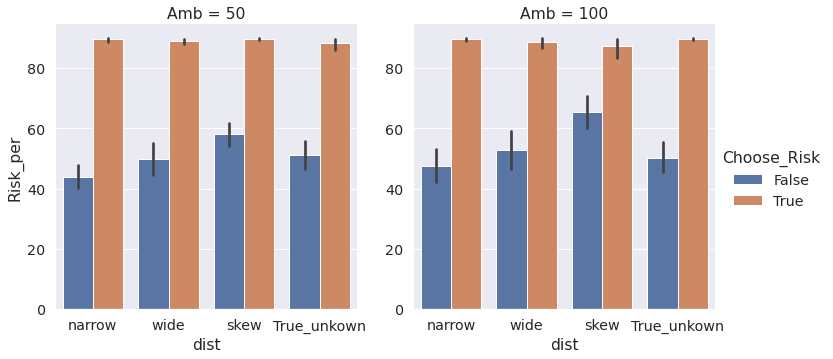

In [79]:
df_aMax=df_a.groupby(by=['sub','dist','Amb','Choose_Risk'], as_index=False).max()
df_aMax['Max_risk']=df_aMax['Risk_per']
print("Number of subs with Complete Ambiguity Choices =%s"%(len(df_aMax['sub'].unique())))

display(df_aMax[df_aMax['sub']=='sub-1001'])
sns.catplot(x='dist',y='Risk_per',col='Amb',hue='Choose_Risk',
            order=['narrow','wide','skew','True_unkown'],
            data=df_aMax,kind="bar",sharey=False)


## Merge


In [80]:
full_df=belief_df.merge(df_aMax,on=['sub','dist'])
print("Number of subs with Complete Manipulation Checks =%s"%(len(full_df['sub'].unique())))

display(full_df[full_df['sub']=='sub-1001'].head())
full_df=full_df.merge(per_df,on=['sub'])
display(full_df[full_df['sub']=='sub-1001'].head())




Number of subs with Complete Manipulation Checks =37


dist      means       stds      skew       sub  Amb  Choose_Risk  \
312  narrow  22.222222  19.860625  0.222881  sub-1001   50        False   
313  narrow  22.222222  19.860625  0.222881  sub-1001   50         True   
314  narrow  22.222222  19.860625  0.222881  sub-1001  100        False   
315  narrow  22.222222  19.860625  0.222881  sub-1001  100         True   
316    skew  83.000000  11.595018  0.342125  sub-1001   50        False   

     Risk_per  Money  Color  RiskisLeft response        RT  Max_risk  
312        80      8  green           1    ['j']  1.932334        80  
313        70      8  green           1    ['j']  1.354108        70  
314        40      8  green           1    ['j']  2.662421        40  
315        80      8  green           1    ['j']  1.324383        80  
316        60      8    red           0    ['f']  2.000311        60

dist      means       stds      skew       sub  Amb  Choose_Risk  \
312  narrow  22.222222  19.860625  0.222881  sub-1001   50        False   
313  narrow  22.222222  19.860625  0.222881  sub-1001   50         True   
314  narrow  22.222222  19.860625  0.222881  sub-1001  100        False   
315  narrow  22.222222  19.860625  0.222881  sub-1001  100         True   
316    skew  83.000000  11.595018  0.342125  sub-1001   50        False   

     Risk_per  Money  Color  ...  TOTAL RSE TOTAL BPAQ  \
312        80      8  green  ...       33.0       62.0   
313        70      8  green  ...       33.0       62.0   
314        40      8  green  ...       33.0       62.0   
315        80      8  green  ...       33.0       62.0   
316        60      8    red  ...       33.0       62.0   

     BPAQ Physical Subscale  BPAQ Verbal Subscale  BPAQ Anger Subscale  \
312                    11.0                  11.0                 18.0   
313                    11.0                  11.0                 18.0   
314                    11.0                  11.0                 18.0   
315                    11.0                  11.0                 18.0   
316                    11.0                  11.0                 18.0   

     BPAQ Hostility Subscale  score_ios_p  Total ASRM Score  \
312                     22.0          5.0               0.0   
313                     22.0          5.0               0.0   
314                     22.0          5.0               0.0   
315                     22.0          5.0               0.0   
316                     22.0          5.0               0.0   

     TEPS Anticipatory Scale.1  TEPS Consummatory Scale.1  
312                       49.0                       41.0  
313                       49.0                       41.0  
314                       49.0                       41.0  
315                       49.0                       41.0  
316                       49.0                       41.0  

[5 rows x 54 columns]

# Personality

['means', 'stds', 'skew', 'Amb', 'Risk_per', 'Money', 'RiskisLeft', 'RT', 'Max_risk', 'Total BDI score', 'TEPS Anticipatory Scale', 'TEPS Consummatory Scale', 'Total AADIS Score', 'SUSD Mania Scale', 'SUSD Depression Scale', 'IRI subscale Perspective Taking', 'IRI subscale Fantasy', 'IRI subscale Empathic Concern', 'IRI subscale Personal Distress', 'AQ subscale Social Skill', 'AQ subscale Attention Switching', 'AQ subscale Attention to detail', 'AQ subscale Communication', 'AQ subscale Imagination', 'AQ Total', 'TEI Subscale wellbeing', 'TEI Subscale selfcontrol', 'TEI Subscale emotionality', 'TEI Subscale sociability', 'TEI Total or global trait emotional intelligence', 'TOTAL PNR', 'PVSS Total Score', 'PVSS Food Subscale', 'PVSS Physical Touch Subscale', 'PVSS Outdoors Subscale', 'PVSS Positive Feedback Subscale', 'PVSS Hobbies Subscale', 'PVSS Social Interactions Subscale', 'PVSS Goals Subscale', 'TOTAL RSE', 'TOTAL BPAQ', 'BPAQ Physical Subscale', 'BPAQ Verbal Subscale', 'BPAQ Ange

sub         dist      means       stds      skew   Amb  Choose_Risk  \
0  sub-1001  True_unkown  47.419355  25.686279 -0.223343  75.0          0.5   
1  sub-1001       narrow  22.222222  19.860625  0.222881  75.0          0.5   
2  sub-1001         skew  83.000000  11.595018  0.342125  75.0          0.5   
3  sub-1001         wide  52.727273  33.493554  0.100812  75.0          0.5   
4  sub-1009  True_unkown  61.428571  29.880715 -0.463147  75.0          0.5   
5  sub-1009       narrow  39.545455  20.581377 -0.654108  75.0          0.5   
6  sub-1009         skew  70.000000  17.320508  0.245374  75.0          0.5   
7  sub-1009         wide  59.047619  32.078772 -0.688357  75.0          0.5   
8  sub-1010  True_unkown  50.000000  22.360680  0.000000  75.0          0.5   
9  sub-1010       narrow  50.000000  11.881771  0.000000  75.0          0.5   

   Risk_per  Money  RiskisLeft  ...  TOTAL RSE  TOTAL BPAQ  \
0      70.0    8.0        0.75  ...       33.0        62.0   
1      67.5    8.0        1.00  ...       33.0        62.0   
2      72.5    8.0        0.75  ...       33.0        62.0   
3      65.0    8.0        1.00  ...       33.0        62.0   
4      65.0   13.0        1.00  ...       11.0        55.0   
5      62.5   13.0        1.00  ...       11.0        55.0   
6      72.5   13.0        1.00  ...       11.0        55.0   
7      72.5   13.0        1.00  ...       11.0        55.0   
8      67.5   13.0        0.75  ...       27.0        62.0   
9      72.5   13.0        1.00  ...       27.0        62.0   

   BPAQ Physical Subscale  BPAQ Verbal Subscale  BPAQ Anger Subscale  \
0                    11.0                  11.0                 18.0   
1                    11.0                  11.0                 18.0   
2                    11.0                  11.0                 18.0   
3                    11.0                  11.0                 18.0   
4                    13.0                  11.0                  9.0   
5                    13.0                  11.0                  9.0   
6                    13.0                  11.0                  9.0   
7                    13.0                  11.0                  9.0   
8                     9.0                  15.0                 11.0   
9                     9.0                  15.0                 11.0   

   BPAQ Hostility Subscale  score_ios_p  Total ASRM Score  \
0                     22.0          5.0               0.0   
1                     22.0          5.0               0.0   
2                     22.0          5.0               0.0   
3                     22.0          5.0               0.0   
4                     22.0          6.0               0.0   
5                     22.0          6.0               0.0   
6                     22.0          6.0               0.0   
7                     22.0          6.0               0.0   
8                     27.0          6.0               7.0   
9                     27.0          6.0               7.0   

   TEPS Anticipatory Scale.1  TEPS Consummatory Scale.1  
0                       49.0                       41.0  
1                       49.0                       41.0  
2                       49.0                       41.0  
3                       49.0                       41.0  
4                       50.0                       53.0  
5                       50.0                       53.0  
6                       50.0                       53.0  
7                       50.0                       53.0  
8                       28.0                       20.0  
9                       28.0                       20.0  

[10 rows x 52 columns]

37
148
means
True_unkown
36
Kendall r:0.012759316705849212 p:0.9131589747192257
pearson r:0.008603766623742959 p:0.9602804953113349
spearman] r:-0.0056664532030633 p:0.9738348289841547
narrow
36
Kendall r:-0.06195395123465646 p:0.5952357405413214
pearson r:-0.08722072641891562 p:0.6129822489140405
spearman] r:-0.10618443937297815 p:0.5376512887290867
skew
36
Kendall r:-0.45786963434022254 p:8.725548342351081e-05
pearson r:-0.45870189651667104 p:0.004896745304146826
spearman] r:-0.5476895353327326 p:0.0005454488623293198
wide
36
Kendall r:-0.2760687121884728 p:0.019345204520473138
pearson r:-0.26064684823246626 p:0.12469395215069853
spearman] r:-0.34952437322326146 p:0.03665828447644396


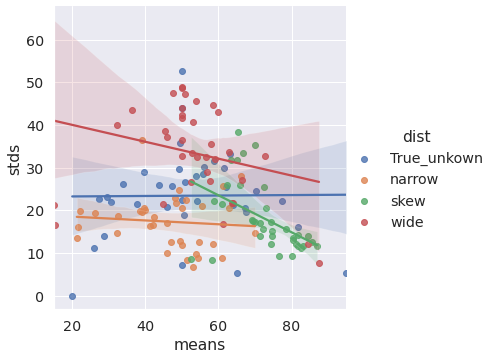

stds
True_unkown
36
Kendall r:1.0 p:5.376440532573272e-42
pearson r:1.0 p:0.0
spearman] r:1.0 p:0.0
narrow
36
Kendall r:1.0 p:5.376440532573272e-42
pearson r:0.9999999999999999 p:1.0531532059567952e-267
spearman] r:1.0 p:0.0
skew
36
Kendall r:0.9999999999999999 p:1.0426876422571944e-17
pearson r:1.0 p:0.0
spearman] r:0.9999999999999998 p:1.380388970111654e-262
wide
36
Kendall r:1.0 p:5.376440532573272e-42
pearson r:0.9999999999999998 p:1.3803889701116895e-262
spearman] r:1.0 p:0.0


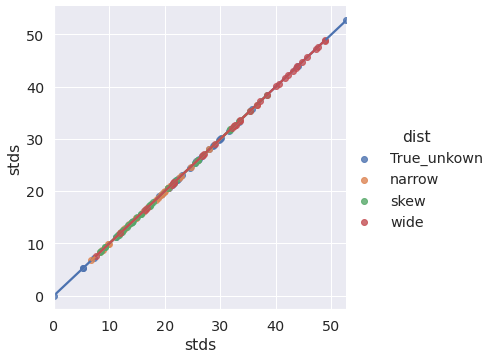

skew
True_unkown
36
Kendall r:-0.09525177788959002 p:0.4196905281313694
pearson r:-0.0679472751481616 p:0.6937645933730173
spearman] r:-0.1392414169751204 p:0.41798570358211173
narrow
36
Kendall r:0.06195395123465646 p:0.5952357405413214
pearson r:0.0028241677587325653 p:0.9869575657801058
spearman] r:0.07117575148273567 p:0.679967932216252
skew
36
Kendall r:-0.3288325103993304 p:0.00480555850286761
pearson r:-0.656702097222037 p:1.3629456864571903e-05
spearman] r:-0.5050518061812925 p:0.0016803081579402812
wide
36
Kendall r:-0.05741692517632146 p:0.623605479623923
pearson r:-0.22553525679903935 p:0.18597849849598297
spearman] r:-0.11745012093622112 p:0.4951140021666113


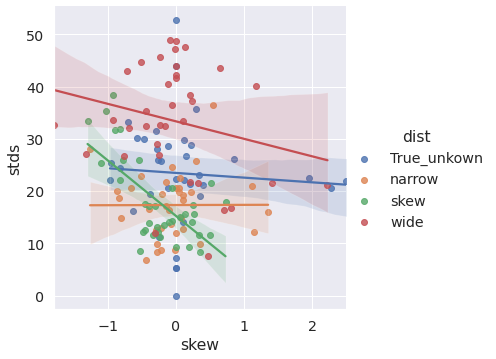

Amb
True_unkown
36
Kendall r:nan p:nan
pearson r:nan p:nan
spearman] r:nan p:nan
narrow
36
Kendall r:0.15460859922178943 p:0.26489643799136986
pearson r:0.1409749805962783 p:0.4121557681524981
spearman] r:0.1895723882622992 p:0.268133563695805
skew
36
Kendall r:nan p:nan
pearson r:nan p:nan
spearman] r:nan p:nan
wide
36
Kendall r:-0.181015026749983 p:0.1957576493360842
pearson r:-0.18291743031755647 p:0.28560478670540174
spearman] r:-0.21868079631836337 p:0.20006937583857637


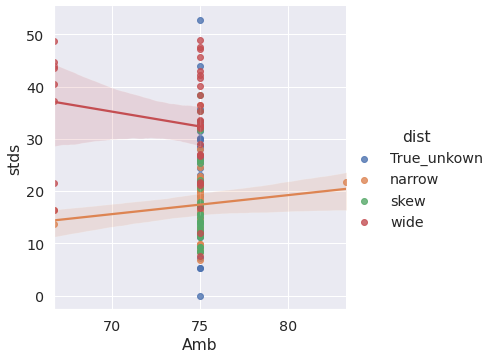

Risk_per
True_unkown
36
Kendall r:-0.02178957972335166 p:0.8579089307692638
pearson r:0.07364384470421644 p:0.6694890242659244
spearman] r:-0.018836885258776775 p:0.9131690807635835
narrow
36
Kendall r:-0.045416332294823496 p:0.7096045628929266
pearson r:0.009444791565395863 p:0.9564014112098493
spearman] r:-0.0593204892258768 p:0.7310984907967122
skew
36
Kendall r:0.08769445168221038 p:0.47302285135791455
pearson r:0.14767283092030148 p:0.39006827684828926
spearman] r:0.12279512386447412 p:0.4755513065892504
wide
36
Kendall r:-0.015085093654628073 p:0.9012068449213829
pearson r:-0.10964636259969426 p:0.5243956154605928
spearman] r:-0.06024299419043617 p:0.7270752435078502


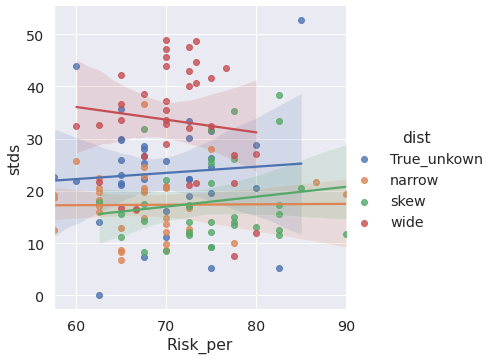

Money
True_unkown
36
Kendall r:-0.047140452079103175 p:0.736178967749227
pearson r:-0.03826564977144903 p:0.824646976702129
spearman] r:-0.05694947974514994 p:0.7414712148169441
narrow
36
Kendall r:-0.07407785326716212 p:0.5964988371028694
pearson r:-0.06957835113119175 p:0.6867818542312641
spearman] r:-0.08949203959952133 p:0.6037288572134552
skew
36
Kendall r:0.16175283337597388 p:0.24800009130880785
pearson r:0.13516503452875017 p:0.4318757254400662
spearman] r:0.1952679250340913 p:0.25375019005459565
wide
36
Kendall r:0.006734350297014738 p:0.9616117646006772
pearson r:-0.001228779631902533 p:0.9943251139583372
spearman] r:0.008135639963592848 p:0.9624400444922612


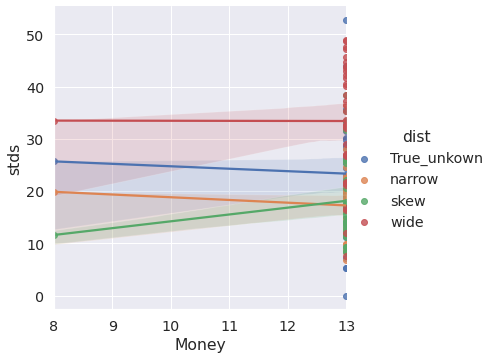

RiskisLeft
True_unkown
36
Kendall r:0.26906832760681704 p:0.04937020155657493
pearson r:0.2678335939626034 p:0.11426814945948789
spearman] r:0.3292103606448803 p:0.049926776934772446
narrow
36
Kendall r:-0.26438158737661294 p:0.049589273724695376
pearson r:-0.26414010225380924 p:0.119541215988641
spearman] r:-0.3304431123426213 p:0.04902504094376387
skew
36
Kendall r:0.10118731997582686 p:0.4651407315045851
pearson r:0.1133305752416834 p:0.5104667785969984
spearman] r:0.12381988951919541 p:0.4718475191622309
wide
36
Kendall r:0.22577073631264916 p:0.09931647977773586
pearson r:0.22686890139560537 p:0.1833204608662279
spearman] r:0.2672651045993818 p:0.11506817007643597


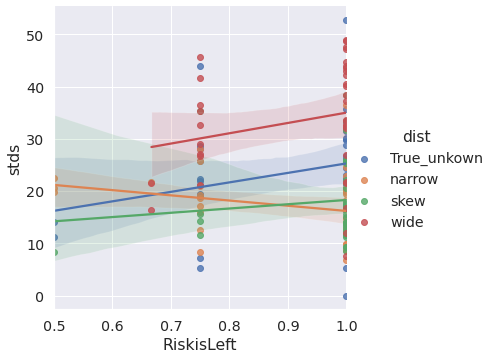

RT
True_unkown
36
Kendall r:-0.050793650793650794 p:0.6629320593594055
pearson r:-0.03622234671524596 p:0.8338763401031547
spearman] r:-0.08288288288288288 p:0.6308185009619164
narrow
36
Kendall r:-0.14920634920634923 p:0.20041713178109355
pearson r:-0.1749000718004002 p:0.30760685323647263
spearman] r:-0.2380952380952381 p:0.16200542786677494
skew
36
Kendall r:0.10007945968675275 p:0.39078427530024473
pearson r:0.07145633089043166 p:0.6787736382923449
spearman] r:0.15831134597425833 p:0.35643497536852753
wide
36
Kendall r:-0.041269841269841276 p:0.7232315327840453
pearson r:-0.10373642499427815 p:0.5471206710350108
spearman] r:-0.054826254826254826 p:0.7507982222409456


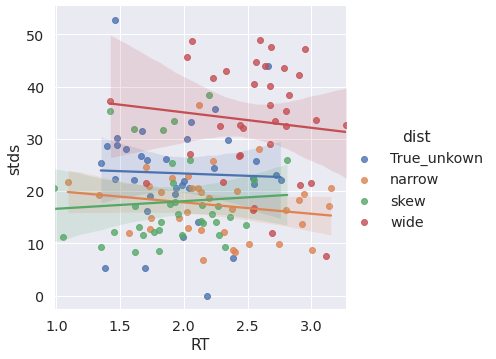

Max_risk
True_unkown
36
Kendall r:-0.02178957972335166 p:0.8579089307692638
pearson r:0.07364384470421644 p:0.6694890242659244
spearman] r:-0.018836885258776775 p:0.9131690807635835
narrow
36
Kendall r:-0.045416332294823496 p:0.7096045628929266
pearson r:0.009444791565395863 p:0.9564014112098493
spearman] r:-0.0593204892258768 p:0.7310984907967122
skew
36
Kendall r:0.08769445168221038 p:0.47302285135791455
pearson r:0.14767283092030148 p:0.39006827684828926
spearman] r:0.12279512386447412 p:0.4755513065892504
wide
36
Kendall r:-0.015085093654628073 p:0.9012068449213829
pearson r:-0.10964636259969426 p:0.5243956154605928
spearman] r:-0.06024299419043617 p:0.7270752435078502


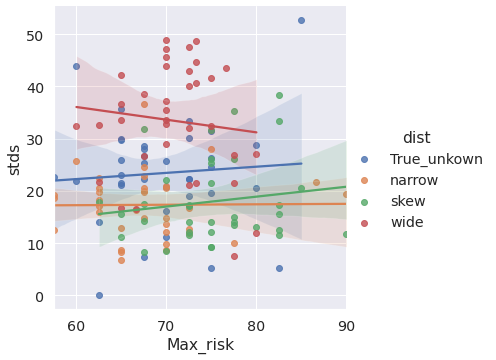

Total BDI score
True_unkown
28
Kendall r:0.054829307913314085 p:0.6907160019738732
pearson r:0.1278795883938847 p:0.5166648638204399
spearman] r:0.07292350397133204 p:0.7122964529392566
narrow
28
Kendall r:-0.054829307913314085 p:0.6907160019738732
pearson r:0.09671612482176443 p:0.6244232143133744
spearman] r:-0.08145417802080862 p:0.6803028020588703
skew
28
Kendall r:-0.15098043859452878 p:0.2737876757825639
pearson r:-0.1847231654314845 p:0.3466888288923027
spearman] r:-0.19664518773850764 p:0.31588772616806404
wide
28
Kendall r:0.021931723165325632 p:0.8735479910504718
pearson r:0.008438296627324954 p:0.966007511558555
spearman] r:-0.0002751830338540832 p:0.9988911485274236


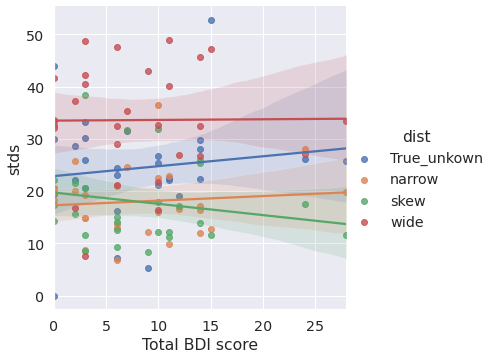

TEPS Anticipatory Scale
True_unkown
30
Kendall r:-0.004656959262518923 p:0.9714828976221296
pearson r:-0.11001332956227625 p:0.5627747333942119
spearman] r:0.007574076714314887 p:0.9683142480056349
narrow
30
Kendall r:-0.04656959262518923 p:0.7207287515846135
pearson r:-0.05492428388337281 p:0.7731420499155128
spearman] r:-0.05836494409266178 p:0.7593339315509482
skew
30
Kendall r:-0.2214602634592782 p:0.08944771774740005
pearson r:-0.3922743338374938 p:0.03202831356835814
spearman] r:-0.3085665678476407 p:0.09710774429241842
wide
30
Kendall r:0.027941755575113535 p:0.8301641833538301
pearson r:0.20207808279520734 p:0.2842174858332136
spearman] r:0.07284479663473437 p:0.702058873211279


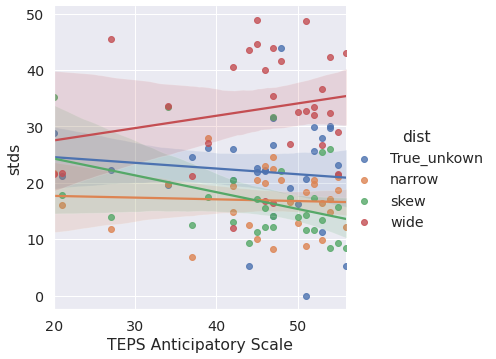

TEPS Consummatory Scale
True_unkown
30
Kendall r:0.06339443100471295 p:0.6287726878433763
pearson r:0.010310937722094043 p:0.9568738801414826
spearman] r:0.09459044029215753 p:0.6190509446961903
narrow
30
Kendall r:0.02113147700157099 p:0.8719739418450186
pearson r:0.06695282839106169 p:0.7251920856352068
spearman] r:0.03770232172022316 p:0.8432019346207111
skew
30
Kendall r:-0.15984388276989278 p:0.2233085049596374
pearson r:-0.16162447593263501 p:0.3935105308401167
spearman] r:-0.19199087108349563 p:0.3094440512984899
wide
30
Kendall r:-0.12444092012036248 p:0.34261842290486255
pearson r:-0.08842708689587205 p:0.642169919486653
spearman] r:-0.14143947911610347 p:0.45594647426686685


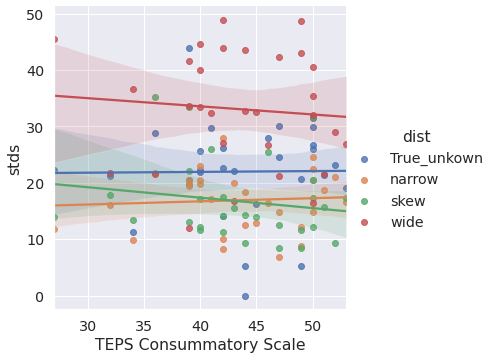

Total AADIS Score
True_unkown
30
Kendall r:0.10440785943762593 p:0.4426354179363208
pearson r:0.12410979030633175 p:0.5134815239393895
spearman] r:0.13233431191844044 p:0.48573940911969626
narrow
30
Kendall r:0.1889285075537993 p:0.1647528394887786
pearson r:0.31394990225313657 p:0.0911181442587114
spearman] r:0.26216745986591383 p:0.16164675361036776
skew
30
Kendall r:0.2662977168700618 p:0.050439789905665285
pearson r:0.30438431462385196 p:0.10196271199928574
spearman] r:0.3342836439492287 p:0.07099816104434525
wide
30
Kendall r:-0.1392104792501679 p:0.3059924194803938
pearson r:-0.17018192524397324 p:0.3685989330844757
spearman] r:-0.2103251521040505 p:0.2646003489677642


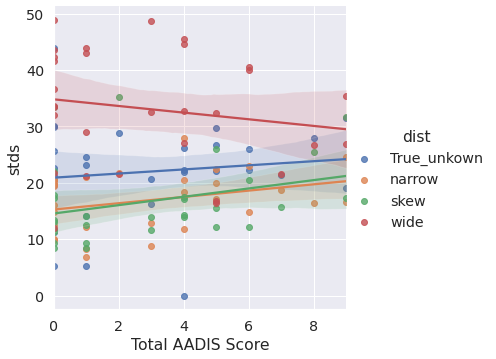

SUSD Mania Scale
True_unkown
30
Kendall r:-0.12494709423292799 p:0.3554231528583074
pearson r:-0.22833043564251437 p:0.22490535102119497
spearman] r:-0.17720232863453264 p:0.34887255530514294
narrow
30
Kendall r:-0.09064789189447717 p:0.5025767313589495
pearson r:-0.04397367316556744 p:0.8175238885883891
spearman] r:-0.10573523171704304 p:0.578149260173777
skew
30
Kendall r:-0.07848844528568326 p:0.5619654251846831
pearson r:-0.05248583810952219 p:0.7829696018218184
spearman] r:-0.0941351182457106 p:0.6207470912456328
wide
30
Kendall r:0.06614846165272657 p:0.6246712980715412
pearson r:0.007756557330207928 p:0.9675512432388215
spearman] r:0.11655674796953358 p:0.5396270123964215


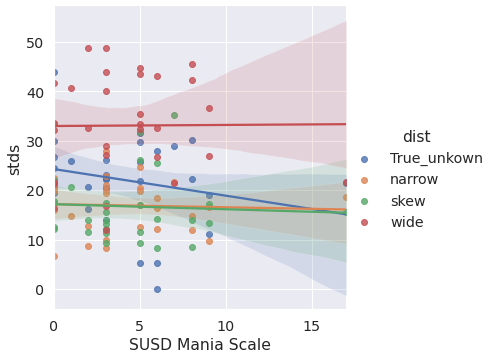

SUSD Depression Scale
True_unkown
30
Kendall r:0.012092862105929185 p:0.9280923196262765
pearson r:0.036361669012322045 p:0.8487126745534037
spearman] r:0.021117485888518115 p:0.9118046331570662
narrow
30
Kendall r:0.12818433832284937 p:0.3387693179181269
pearson r:0.2185315380902103 p:0.24597735452822478
spearman] r:0.17500554794846399 p:0.35497584710476704
skew
30
Kendall r:-0.06295528698512139 p:0.6388234700613891
pearson r:-0.024620800263811436 p:0.8972446071865642
spearman] r:-0.07919938229191423 p:0.6773990959215355
wide
30
Kendall r:-0.03144144147541588 p:0.8144899667582438
pearson r:-0.06654276988431079 p:0.7268112023036101
spearman] r:-0.04313358819782424 p:0.8209535031860977


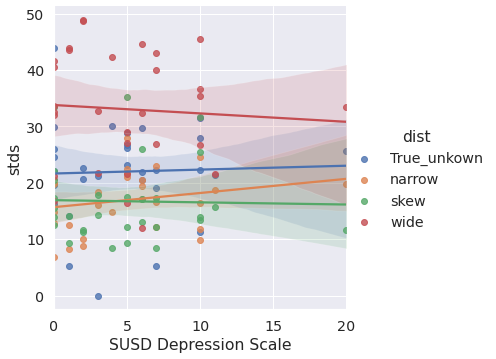

IRI subscale Perspective Taking
True_unkown
30
Kendall r:0.2592076926101309 p:0.04877199328561047
pearson r:0.3974921942889269 p:0.0296179186506522
spearman] r:0.35572590488431133 p:0.053701256643866636
narrow
30
Kendall r:0.12253454559751642 p:0.3515708533363209
pearson r:0.1437651535283083 p:0.4484957899890713
spearman] r:0.18143360142468326 p:0.33729578368412416
skew
30
Kendall r:0.0731335505638926 p:0.57860060387479
pearson r:-0.06813493991683908 p:0.7205310337521881
spearman] r:0.10222119830218349 p:0.5909157576780789
wide
30
Kendall r:-0.0895444756289543 p:0.49603244834165894
pearson r:-0.08686738987450576 p:0.6480738692893097
spearman] r:-0.1410406348098399 p:0.45723081376020125


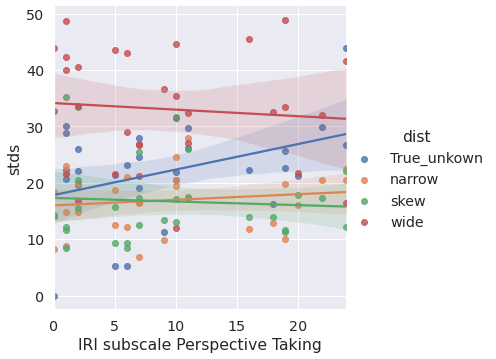

IRI subscale Fantasy
True_unkown
30
Kendall r:0.05898211673807682 p:0.6539260110676632
pearson r:-0.01136143453712156 p:0.9524848000637274
spearman] r:0.07952709485710413 p:0.6761359239601766
narrow
30
Kendall r:0.24300632096087652 p:0.0647388749624445
pearson r:0.35527531808865465 p:0.054026800841481266
spearman] r:0.36323330403834636 p:0.04850149601671217
skew
30
Kendall r:-0.03779201880818543 p:0.7741388964681994
pearson r:0.13373657377437087 p:0.4810872585908372
spearman] r:-0.03127817963732238 p:0.8696697670940019
wide
30
Kendall r:-0.04954497805998453 p:0.706482450394117
pearson r:-0.10579662082737082 p:0.57792732760789
spearman] r:-0.08399490917491896 p:0.6590018291573418


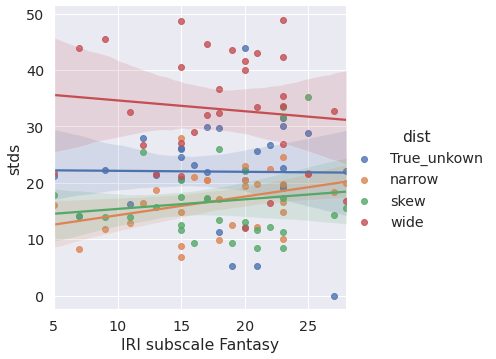

IRI subscale Empathic Concern
True_unkown
30
Kendall r:0.0893289651465121 p:0.49621669575355787
pearson r:0.07159806189598694 p:0.7069329273455067
spearman] r:0.1416625697771699 p:0.45522892579847873
narrow
30
Kendall r:0.06582134273953523 p:0.6160983949280032
pearson r:0.0843728049399484 p:0.657560177805135
spearman] r:0.09258262434255984 p:0.6265446774545995
skew
30
Kendall r:-0.1623893564369684 p:0.21655088190400673
pearson r:-0.17750035575327777 p:0.3480494332419871
spearman] r:-0.2501124537880286 p:0.18252722119262865
wide
30
Kendall r:0.07522439170232598 p:0.5666349769567638
pearson r:0.21841403313841756 p:0.2462377165605663
spearman] r:0.11466859978813437 p:0.5462599290981789


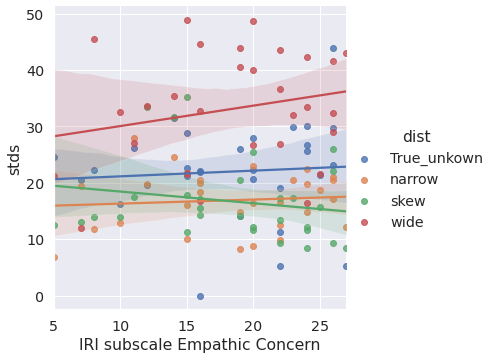

IRI subscale Personal Distress
True_unkown
30
Kendall r:-0.19487917679226577 p:0.13731642219328508
pearson r:-0.3679327807526285 p:0.04545548227577147
spearman] r:-0.264080270949077 p:0.1584972550274365
narrow
30
Kendall r:-0.016435593223444102 p:0.9002754369823753
pearson r:-0.028222442728137315 p:0.8823099890255964
spearman] r:-0.02096583232197064 p:0.9124355827094605
skew
30
Kendall r:-0.0987271040637573 p:0.45205347855370537
pearson r:-0.06998826102186602 p:0.7132431861905711
spearman] r:-0.14577335875010203 p:0.4421151267040987
wide
30
Kendall r:0.016435593223444102 p:0.9002754369823753
pearson r:0.0647274576689933 p:0.733992742851136
spearman] r:-0.01873542462814398 p:0.9217209490629803


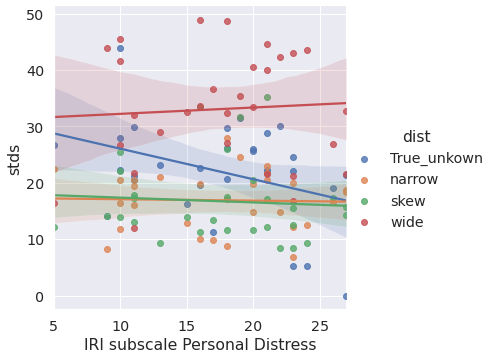

AQ subscale Social Skill
True_unkown
30
Kendall r:0.004712867138366016 p:0.9714128197043086
pearson r:-0.10016948524502764 p:0.59842581464264
spearman] r:0.03258946838754927 p:0.8642550042845683
narrow
30
Kendall r:-0.07069300707549024 p:0.5908906623265775
pearson r:-0.06030588439505424 p:0.7515760967197936
spearman] r:-0.08705405939139875 p:0.6473661537843121
skew
30
Kendall r:-0.016514027546685427 p:0.900170062128057
pearson r:0.0666365883985337 p:0.7264406576936987
spearman] r:-0.0601632798117673 p:0.7521452828041568
wide
30
Kendall r:0.028277202830196094 p:0.8297530375272113
pearson r:0.029670245303013557 p:0.8763173505583455
spearman] r:0.037946641273173806 p:0.8421984349202409


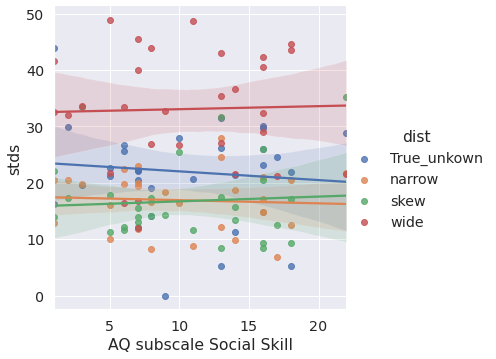

AQ subscale Attention Switching
True_unkown
36
Kendall r:-0.0886618415477393 p:0.470699434956915
pearson r:-0.09307258005740898 p:0.5892648979847416
spearman] r:-0.13499028782691924 p:0.43247681428518103
narrow
36
Kendall r:0.04433092077386965 p:0.7183455963133274
pearson r:-0.06462041228948659 p:0.7080838077192543
spearman] r:0.05676917143108814 p:0.7422618951098641
skew
36
Kendall r:-0.16893263278771026 p:0.16961629926787325
pearson r:-0.19159695607475374 p:0.26296075198688296
spearman] r:-0.25063763243532833 p:0.1403729030451961
wide
36
Kendall r:0.10912226652029453 p:0.37464570002426967
pearson r:0.12892200455313077 p:0.45363520403580243
spearman] r:0.13904522864342556 p:0.4186483888912126


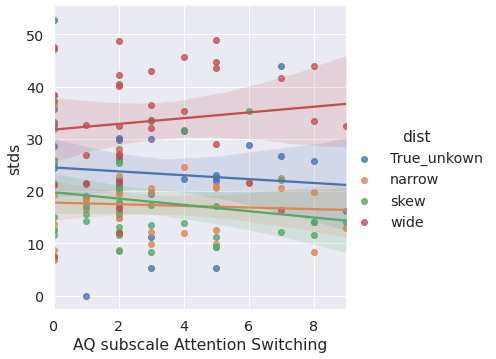

AQ subscale Attention to detail
True_unkown
36
Kendall r:-0.1744711053738681 p:0.15171009324517198
pearson r:-0.2677414059835006 p:0.11439759843153842
spearman] r:-0.2261055161653505 p:0.1848386258893806
narrow
36
Kendall r:-0.023486494954174552 p:0.8469797482999769
pearson r:-0.153394491311474 p:0.3717564840784646
spearman] r:-0.024443839585443296 p:0.8874686253428012
skew
36
Kendall r:-0.18300443858534873 p:0.13295149600885267
pearson r:-0.3115757852745178 p:0.06433849474308806
spearman] r:-0.2696146980496068 p:0.11178870944606849
wide
36
Kendall r:-0.23486494954174553 p:0.053639722674987525
pearson r:-0.20957909572485733 p:0.21990683094526328
spearman] r:-0.31217903640770933 p:0.0637965806987395


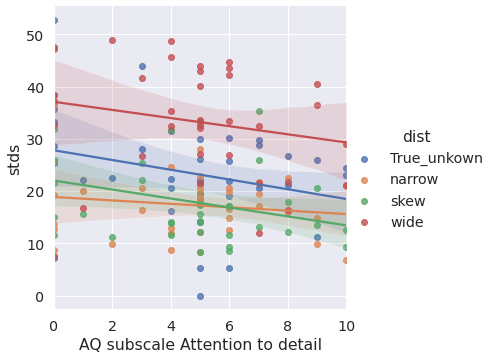

AQ subscale Communication
True_unkown
36
Kendall r:-0.21770322468398026 p:0.0735859804563555
pearson r:-0.3603028313727328 p:0.030880374414301776
spearman] r:-0.32079624501778714 p:0.05644170154904547
narrow
36
Kendall r:0.07368416835457793 p:0.5448014562289518
pearson r:0.0036399682398678967 p:0.9831905484207133
spearman] r:0.11411570189018004 p:0.5075225427533747
skew
36
Kendall r:-0.24971965720515651 p:0.04028165521150213
pearson r:-0.33494818311263147 p:0.045840085425206754
spearman] r:-0.31990806055212595 p:0.05716708997949547
wide
36
Kendall r:-0.12392337405088107 p:0.3084614047601194
pearson r:-0.13210115309938186 p:0.44248158814235994
spearman] r:-0.14981742887516242 p:0.3831441608466616


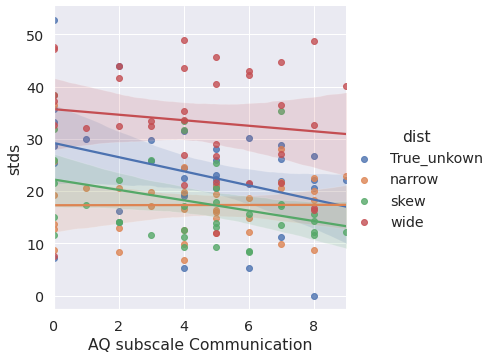

AQ subscale Imagination
True_unkown
36
Kendall r:-0.2177668845442383 p:0.07482146204212266
pearson r:-0.24848149080645812 p:0.1439319836255329
spearman] r:-0.29697365112769075 p:0.07859762384887299
narrow
36
Kendall r:-0.11647996150040653 p:0.34062758191605
pearson r:-0.15094743384955467 p:0.37952491270952027
spearman] r:-0.15968846328181968 p:0.3522128760125859
skew
36
Kendall r:-0.26017634031005 p:0.03342011464930257
pearson r:-0.27097020768227154 p:0.10992905733829215
spearman] r:-0.355479496008125 p:0.033366164623062716
wide
36
Kendall r:0.10635126919602336 p:0.384266063708957
pearson r:0.12894316044921503 p:0.4535604844440912
spearman] r:0.1501800963816787 p:0.38198039352992885


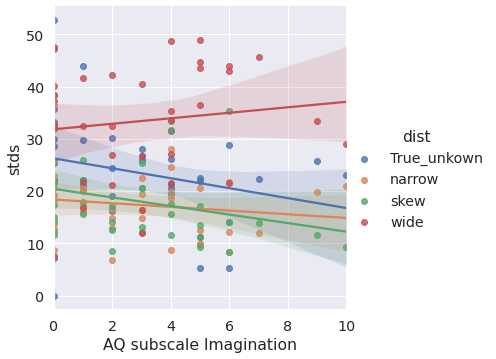

AQ Total
True_unkown
28
Kendall r:0.22514943095892678 p:0.10770335014273459
pearson r:0.23166970180459187 p:0.2355383891719889
spearman] r:0.28709820278059656 p:0.13852443664614436
narrow
28
Kendall r:0.028143678869865848 p:0.8406397136127988
pearson r:-0.029609412742887677 p:0.8811058817196098
spearman] r:0.045857892990124334 p:0.8167589606006956
skew
28
Kendall r:0.0 p:1.0
pearson r:-0.18351119046184045 p:0.34991743456210683
spearman] r:0.01834315719604973 p:0.9261854991069851
wide
28
Kendall r:-0.061916093513704855 p:0.6582246616147689
pearson r:-0.0311747217922767 p:0.874868032039055
spearman] r:-0.08365591387895407 p:0.6721299181276457


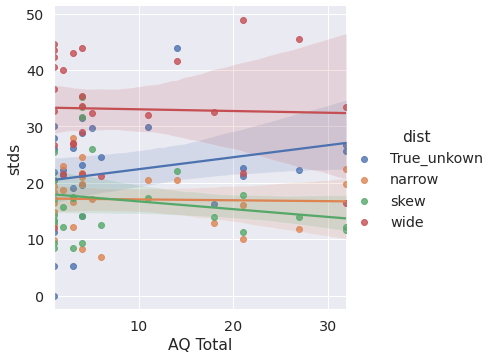

TEI Subscale wellbeing
True_unkown
36
Kendall r:-0.22771001702132443 p:0.055371265337983894
pearson r:-0.33565694548129066 p:0.045354520633675253
spearman] r:-0.3230207911149309 p:0.05465697790475918
narrow
36
Kendall r:-0.029277002188455997 p:0.8054216602486491
pearson r:-0.09581102455278871 p:0.5783068800425331
spearman] r:-0.04354320264229269 p:0.8009186146491531
skew
36
Kendall r:-0.11882885494422468 p:0.3177360885850594
pearson r:-0.13508139340552167 p:0.4321633741467953
spearman] r:-0.17638070242351697 p:0.3034650204063557
wide
36
Kendall r:-0.006506000486323555 p:0.9563444287391315
pearson r:-0.03268535329290187 p:0.8499036415235951
spearman] r:-0.029588704466127668 p:0.8639846271144701


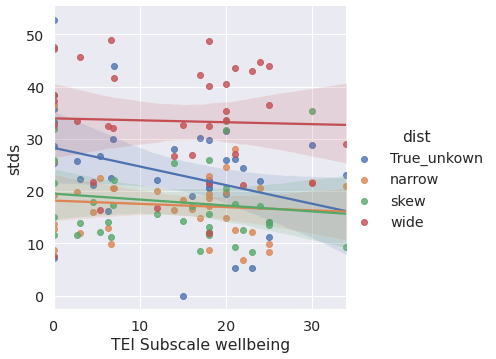

TEI Subscale selfcontrol
True_unkown
30
Kendall r:0.03267587166707307 p:0.8022577256298392
pearson r:0.02239225815701483 p:0.9065031002297445
spearman] r:0.071110263484244 p:0.7088430614747353
narrow
30
Kendall r:0.042011835000522524 p:0.7474704088468871
pearson r:0.077046446531475 p:0.6857188086362687
spearman] r:0.047035315345377686 p:0.8050532182527137
skew
30
Kendall r:0.18459757904450688 p:0.15755608166672863
pearson r:0.23175637662527765 p:0.2178348372180596
spearman] r:0.25348390179297803 p:0.1765064475522793
wide
30
Kendall r:-0.07935568833432032 p:0.5430693879561337
pearson r:-0.07788977110695636 p:0.6824555438995255
spearman] r:-0.11658516552432481 p:0.5395274757562918


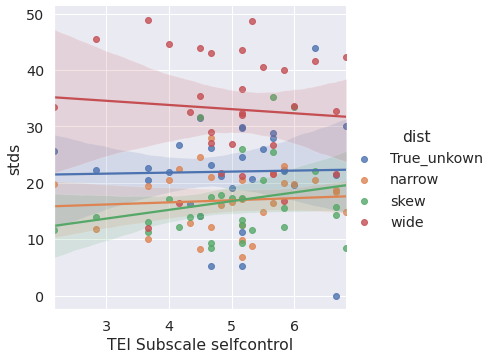

TEI Subscale emotionality
True_unkown
30
Kendall r:-0.09535528383634795 p:0.46362962094615623
pearson r:0.02396154341061641 p:0.8999821716578265
spearman] r:-0.10159306631283999 p:0.5932106070357008
narrow
30
Kendall r:0.016280170411083796 p:0.9004234723819233
pearson r:-0.0031017312115697235 p:0.9870213857149627
spearman] r:0.02406151570567263 p:0.8995669635098058
skew
30
Kendall r:-0.06985249532607994 p:0.5917237407173336
pearson r:-0.05480994983149312 p:0.7736020903674878
spearman] r:-0.0651738550339981 p:0.7322246868892468
wide
30
Kendall r:-0.0069772158904644836 p:0.957233455266701
pearson r:0.023761999961014663 p:0.9008109991870591
spearman] r:-0.006906546174776403 p:0.9711056168510858


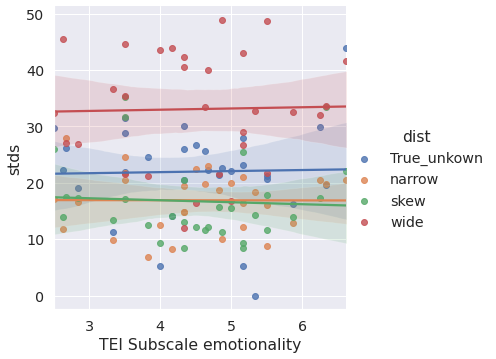

TEI Subscale sociability
True_unkown
30
Kendall r:-0.1002429048990958 p:0.4420135521027755
pearson r:-0.20702766616934723 p:0.27233533941748456
spearman] r:-0.14082013563677337 p:0.4579416781935788
narrow
30
Kendall r:-0.03496845519735901 p:0.7885567947693672
pearson r:-0.030354013040825578 p:0.8734894572873232
spearman] r:-0.04567741741382681 p:0.8105786106619804
skew
30
Kendall r:0.098024411117931 p:0.4526314763386664
pearson r:0.0037469040118553835 p:0.9843220809470656
spearman] r:0.17415060051655046 p:0.3573682491938869
wide
30
Kendall r:-0.11889274767102062 p:0.36185844934468225
pearson r:-0.1026004418642941 p:0.5895320816304348
spearman] r:-0.1766936195569008 p:0.3502802579650952


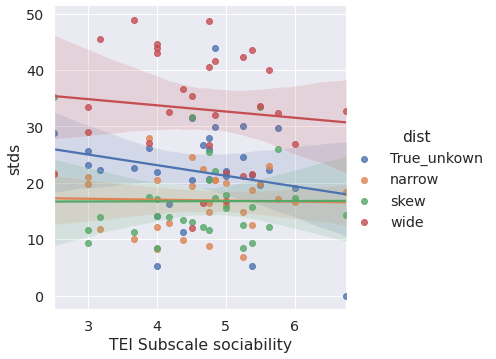

TEI Total or global trait emotional intelligence
True_unkown
30
Kendall r:-0.11061886067141317 p:0.3996254792775391
pearson r:-0.01691514601333846 p:0.9293064522520375
spearman] r:-0.15985813092419612 p:0.39876978321476775
narrow
30
Kendall r:0.12944760291335586 p:0.3243005431336916
pearson r:0.17268121958004135 p:0.36150237404341656
spearman] r:0.15271363345272368 p:0.420446382213576
skew
30
Kendall r:0.1413781639516934 p:0.28218271276650364
pearson r:-0.07632973382813532 p:0.6884965107636878
spearman] r:0.20163121765972083 p:0.28530631541391244
wide
30
Kendall r:-0.15298353071578416 p:0.24407179524724298
pearson r:-0.11468921380670319 p:0.5461873080248001
spearman] r:-0.23085657454695363 p:0.2196770569279852


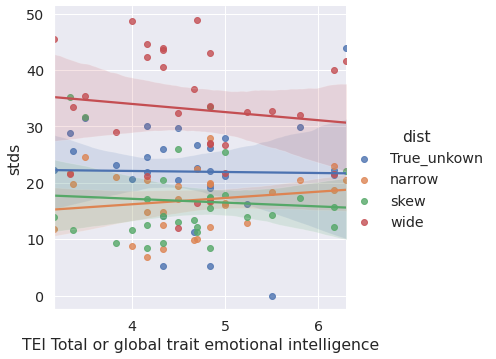

TOTAL PNR
True_unkown
30
Kendall r:-0.025345689401248275 p:0.8443645308524024
pearson r:0.07829292690086198 p:0.6808974989617137
spearman] r:-0.010903427061217044 p:0.9543982407434781
narrow
30
Kendall r:-0.08064537536760816 p:0.5322106825976554
pearson r:-0.1606333734453118 p:0.3964566092093907
spearman] r:-0.14975523290202186 p:0.42961000497328095
skew
30
Kendall r:-0.11072671725058772 p:0.39156756958330485
pearson r:-0.2081556812054134 p:0.269673045298848
spearman] r:-0.14287303971835688 p:0.4513460692202367
wide
30
Kendall r:0.016129075073521633 p:0.9005813524742953
pearson r:0.09108695581015348 p:0.632150767184186
spearman] r:0.05740988126110198 p:0.7631597393411595


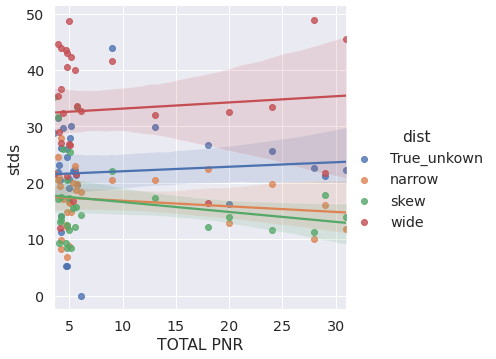

PVSS Total Score
True_unkown
29
Kendall r:0.009876573316836976 p:0.9401680375472738
pearson r:-0.012961416663865154 p:0.9467952808811252
spearman] r:0.02685390571765116 p:0.8900220982149983
narrow
29
Kendall r:-0.039506293267347906 p:0.7639981766091808
pearson r:-0.04842995384919807 p:0.8029914734025987
spearman] r:-0.061591526875346705 p:0.7509459692599407
skew
29
Kendall r:-0.07901258653469581 p:0.5481935149076007
pearson r:-0.21094979288004428 p:0.2720086461099108
spearman] r:-0.10224193461307553 p:0.5976678914047757
wide
29
Kendall r:-0.02962971995051093 p:0.8218423689711563
pearson r:0.004339305935935234 p:0.9821767124297709
spearman] r:0.0066518849025374435 p:0.9726809068841109


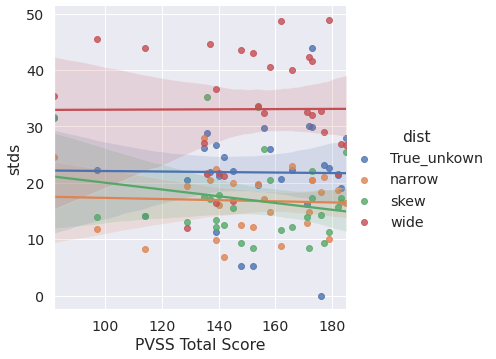

PVSS Food Subscale
True_unkown
29
Kendall r:-0.09507893126036895 p:0.4835452929034735
pearson r:-0.12808130911012916 p:0.5078848660406079
spearman] r:-0.13504198366262177 p:0.4848993184905521
narrow
29
Kendall r:-0.19272756336561275 p:0.15556136276401983
pearson r:-0.2223392701756866 p:0.24635518769977008
spearman] r:-0.25916145394076684 p:0.17460169505352635
skew
29
Kendall r:-0.2646791870221082 p:0.051134196117196086
pearson r:-0.3030593629292267 p:0.11002547549722744
spearman] r:-0.3639182868555212 p:0.05229599413723515
wide
29
Kendall r:-0.05396371774237157 p:0.6908922144389409
pearson r:-0.14986201969375476 p:0.4377904384816274
spearman] r:-0.061563257257959934 p:0.7510567076190082


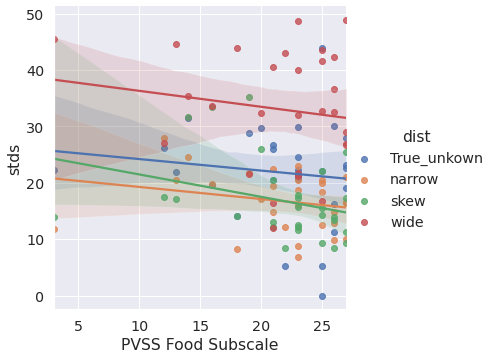

PVSS Physical Touch Subscale
True_unkown
29
Kendall r:-0.032967115415018074 p:0.8063498792865024
pearson r:-0.07438548372005638 p:0.7013566505300884
spearman] r:-0.03932269662660079 p:0.8395082381403912
narrow
29
Kendall r:-0.04311084323502364 p:0.7485403888194309
pearson r:0.001582037354395896 p:0.9935014895620924
spearman] r:-0.05069907426700102 p:0.7939528096967616
skew
29
Kendall r:0.053254571055029204 p:0.6921112761369523
pearson r:-0.09050528010175188 p:0.6405661925842129
spearman] r:0.08284970672900166 p:0.6691827692802848
wide
29
Kendall r:0.05832643496503199 p:0.6645026681503492
pearson r:0.20650671212227922 p:0.28246705044011416
spearman] r:0.09843039784520198 p:0.6114643387959915


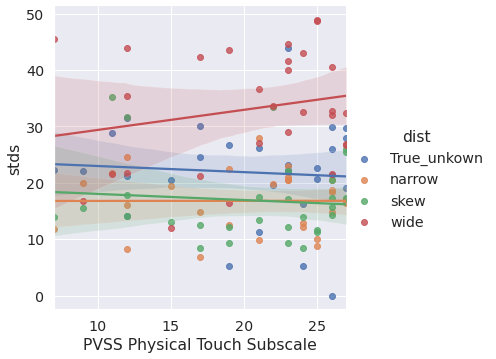

PVSS Outdoors Subscale
True_unkown
29
Kendall r:0.10609443913834524 p:0.42872600551510964
pearson r:0.1696029379534671 p:0.3790970132333927
spearman] r:0.14532958974404495 p:0.45192751839785006
narrow
29
Kendall r:0.030312696896670068 p:0.8211183983004406
pearson r:0.06255955298452212 p:0.7471569295143942
spearman] r:0.06080115489291676 p:0.7540438476289586
skew
29
Kendall r:-0.0454690453450051 p:0.7344891115642687
pearson r:-0.08128254937634491 p:0.6750987704949757
spearman] r:-0.05239774324105022 p:0.7872034178516187
wide
29
Kendall r:-0.1818761813800204 p:0.174895475201426
pearson r:-0.22729641162891523 p:0.2357069812707714
spearman] r:-0.24098018707558475 p:0.20792490196915187


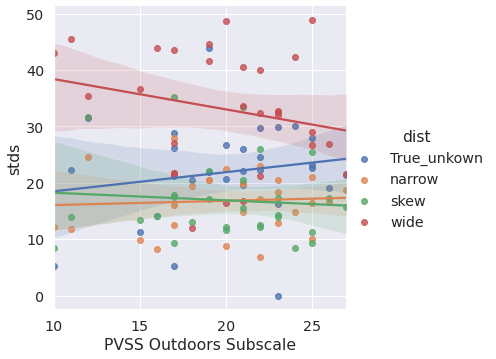

PVSS Positive Feedback Subscale
True_unkown
29
Kendall r:0.09482504848074703 p:0.4840150966052378
pearson r:0.09989746800559668 p:0.6061382956364535
spearman] r:0.14681060545532726 p:0.44728152792494513
narrow
29
Kendall r:0.11532776166577341 p:0.3946691563848137
pearson r:0.12966495950193802 p:0.502608413478207
spearman] r:0.14904252344366836 p:0.44032859756235054
skew
29
Kendall r:0.023065552333154684 p:0.8648244802358035
pearson r:-0.035602208318933154 p:0.8545248286503978
spearman] r:0.04687027775516359 p:0.8092187043083742
wide
29
Kendall r:-0.08969937018449044 p:0.5079525149898151
pearson r:-0.06470664438799348 p:0.7387734565572118
spearman] r:-0.11506777184336459 p:0.5522568919262769


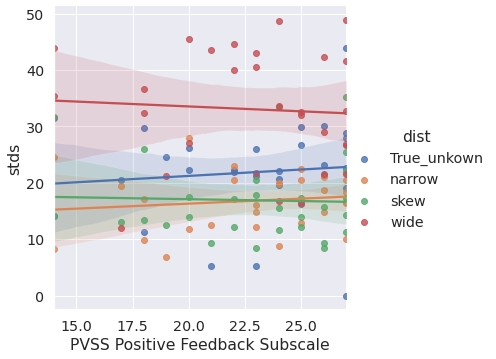

PVSS Hobbies Subscale
True_unkown
29
Kendall r:0.010265052465811659 p:0.9396496959553753
pearson r:-0.056669446096939774 p:0.7702979785310919
spearman] r:0.04193664586027179 p:0.8289903904633599
narrow
29
Kendall r:0.11804810335683408 p:0.38393611510928527
pearson r:0.018431098248037348 p:0.9243971097940207
spearman] r:0.14715047926119038 p:0.4462189601597356
skew
29
Kendall r:-0.056457788561964116 p:0.6771130430377016
pearson r:-0.12770055939117497 p:0.509157533687727
spearman] r:-0.05186247919998109 p:0.789328603023328
wide
29
Kendall r:-0.09238547219230492 p:0.4956238612023548
pearson r:-0.004208737852311281 p:0.9827129280615166
spearman] r:-0.08685104172245638 p:0.6541660583902873


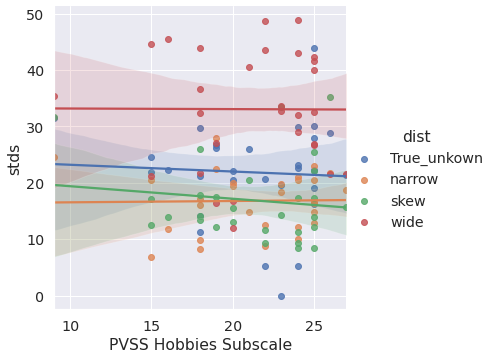

PVSS Social Interactions Subscale
True_unkown
29
Kendall r:0.03641785203646149 p:0.790186813521541
pearson r:-0.07002247513996537 p:0.7181448481377363
spearman] r:0.06500212388016732 p:0.7376220008355716
narrow
29
Kendall r:0.0 p:1.0
pearson r:-0.1430494367835935 p:0.45913044443458473
spearman] r:-0.025901229438840618 p:0.8939015298464379
skew
29
Kendall r:0.010405100581846138 p:0.9394036335603364
pearson r:-0.17466403159254928 p:0.3648225493543399
spearman] r:0.00024905028306577515 p:0.9989769695896236
wide
29
Kendall r:0.07803825436384605 p:0.5685788231071354
pearson r:0.2318614394075136 p:0.2261767182187116
spearman] r:0.12577039294821646 p:0.5156333218399995


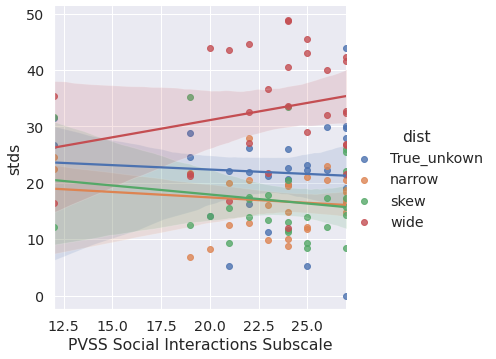

PVSS Goals Subscale
True_unkown
29
Kendall r:0.1697839913371328 p:0.2158541789739189
pearson r:0.04426765777740386 p:0.819635278410194
spearman] r:0.2287827593666458 p:0.23257503155046363
narrow
29
Kendall r:-0.007836184215559976 p:0.9544485903358484
pearson r:-0.0661972021322662 p:0.732970579977454
spearman] r:-0.031685289465173405 p:0.8703880435960908
skew
29
Kendall r:-0.1436633772852662 p:0.2949965800472628
pearson r:-0.31056277284981565 p:0.10106760732188122
spearman] r:-0.19859441271085065 p:0.3017194616266276
wide
29
Kendall r:-0.07052565794003977 p:0.607188047214358
pearson r:0.010254405502334654 p:0.9578961460595282
spearman] r:-0.08757115434862887 p:0.6514772819256611


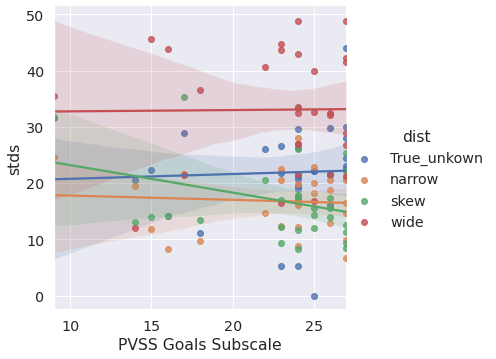

TOTAL RSE
True_unkown
36
Kendall r:-0.021233158160501094 p:0.858824346156541
pearson r:-0.04106441863471445 p:0.8120429816935211
spearman] r:-0.05101743514060975 p:0.7676164653334066
narrow
36
Kendall r:0.08656595250050446 p:0.46835015320286744
pearson r:0.1392896032705326 p:0.41782303013720296
spearman] r:0.12024615725546248 p:0.4848296406561736
skew
36
Kendall r:0.08500011984585258 p:0.47674558379367316
pearson r:0.13131729607521253 p:0.4452176380218117
spearman] r:0.14221217973285324 p:0.40802341438817635
wide
36
Kendall r:-0.07349939363250378 p:0.5380878875635804
pearson r:-0.0641428883449415 p:0.7101473787793287
spearman] r:-0.08369442524332942 p:0.6274655566075719


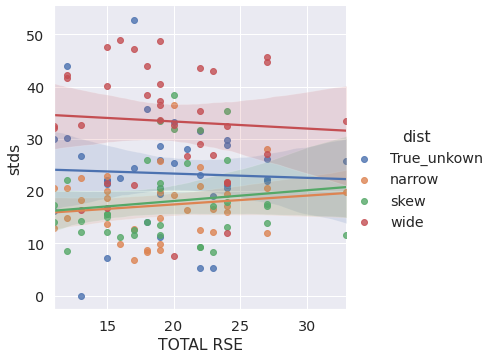

TOTAL BPAQ
True_unkown
35
Kendall r:-0.2265466541299079 p:0.05684967372569937
pearson r:-0.18469565867273569 p:0.28816169267988406
spearman] r:-0.31460206736167723 p:0.06567027733742185
narrow
35
Kendall r:-0.2840286409986905 p:0.016954763586013524
pearson r:-0.36520390211141085 p:0.03098665746266191
spearman] r:-0.40877248574343544 p:0.014765355489750541
skew
35
Kendall r:-0.18105140198452632 p:0.12828965802619655
pearson r:-0.26698434078208433 p:0.12103751942306094
spearman] r:-0.2742625233582248 p:0.11085193105098945
wide
35
Kendall r:0.09467621366623018 p:0.42609263334627034
pearson r:0.07564787109502755 p:0.6658102807512757
spearman] r:0.1383128019982073 p:0.4281440075772045


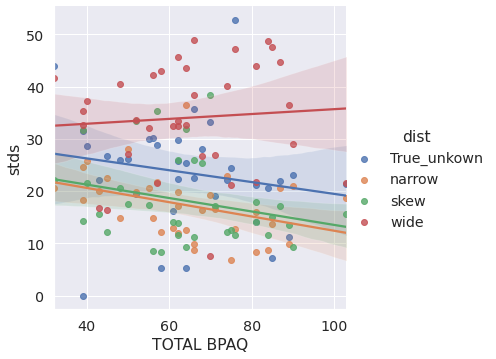

BPAQ Physical Subscale
True_unkown
35
Kendall r:-0.1991874989490536 p:0.09826509234082213
pearson r:-0.20258510611929445 p:0.24315638451583696
spearman] r:-0.29384207774088583 p:0.08665482036506819
narrow
35
Kendall r:-0.1957532317257941 p:0.10420141207865556
pearson r:-0.26710236850753477 p:0.1208669611512548
spearman] r:-0.27445861372164954 p:0.11058673423947027
skew
35
Kendall r:-0.09108465533099036 p:0.44996630150838823
pearson r:-0.0937027536294043 p:0.5923727714352038
spearman] r:-0.1419446534312845 p:0.415995136428132
wide
35
Kendall r:-0.010302801669778636 p:0.9318506034031296
pearson r:-0.11889892889208731 p:0.4963216494772783
spearman] r:-0.015310127377512693 p:0.9304398536783534


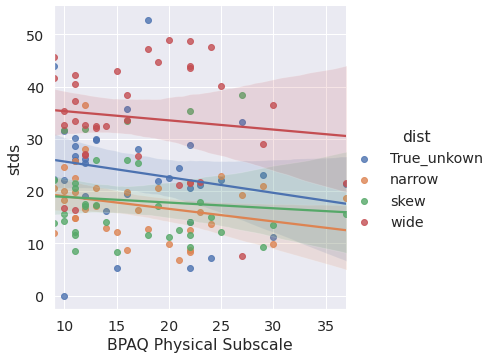

BPAQ Verbal Subscale
True_unkown
35
Kendall r:-0.1463072747512836 p:0.23001249814046887
pearson r:-0.14883196807592375 p:0.3934977739410643
spearman] r:-0.19593460177212252 p:0.259301571348204
narrow
35
Kendall r:-0.320482601836145 p:0.008556412032797793
pearson r:-0.31254000408594845 p:0.06755599721133947
spearman] r:-0.4152349678360355 p:0.013120198685930949
skew
35
Kendall r:-0.1237685331382096 p:0.3102687467344871
pearson r:-0.12945211604920884 p:0.45859483943937074
spearman] r:-0.1741293656188586 p:0.3171072828398795
wide
35
Kendall r:0.08708766354243071 p:0.47493032185308537
pearson r:0.025101955860391906 p:0.8861841650657976
spearman] r:0.11105775919411254 p:0.5253406212789304


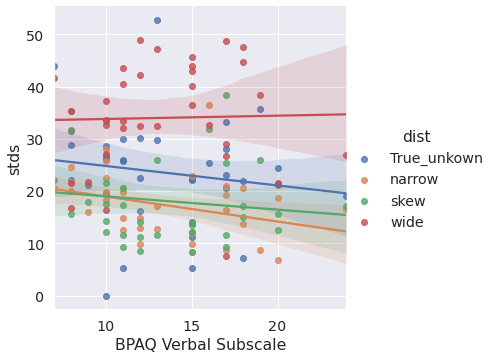

BPAQ Anger Subscale
True_unkown
35
Kendall r:-0.1529983663007019 p:0.20867094738546255
pearson r:-0.06880367871383306 p:0.6945180665561755
spearman] r:-0.23686156337842812 p:0.1706906606602724
narrow
35
Kendall r:-0.20167966466910706 p:0.09746780991792121
pearson r:-0.24436119561326497 p:0.15715369950651242
spearman] r:-0.32017828680090543 p:0.06077768887679328
skew
35
Kendall r:-0.06438298465832441 p:0.5970428511787025
pearson r:-0.1668957113986705 p:0.33793504339584485
spearman] r:-0.11252767829833915 p:0.5198383566031105
wide
35
Kendall r:0.05911300516163483 p:0.6271463212126682
pearson r:0.06819034946167653 p:0.6971119064503005
spearman] r:0.08444262509034871 p:0.6296004837100856


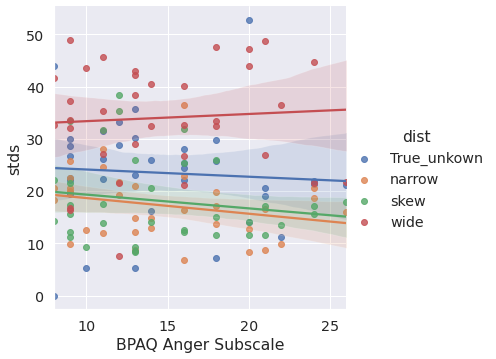

BPAQ Hostility Subscale
True_unkown
35
Kendall r:-0.17733204091525068 p:0.14197264622634886
pearson r:-0.13662575955021689 p:0.4338535796972639
spearman] r:-0.26060815682202043 p:0.13052084756049573
narrow
35
Kendall r:-0.25997221532235776 p:0.031332286415319384
pearson r:-0.32580577429895285 p:0.056136708181711306
spearman] r:-0.379462335081551 p:0.024561404911850677
skew
35
Kendall r:-0.3239463547313195 p:0.007349021819143057
pearson r:-0.45657234301585614 p:0.005834285309045897
spearman] r:-0.476855003139045 p:0.003776711984022506
wide
35
Kendall r:0.28063225892413457 p:0.02013018605945495
pearson r:0.306700193959212 p:0.0731274550585362
spearman] r:0.3995523439362944 p:0.01740996688907853


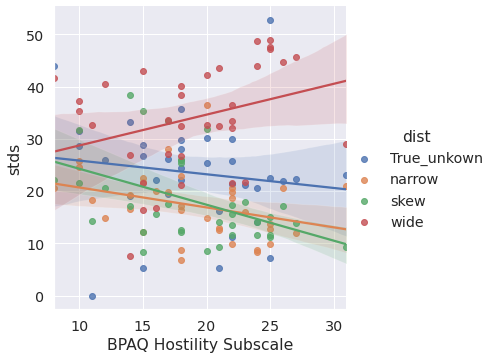

score_ios_p
True_unkown
36
Kendall r:-0.01253502388483925 p:0.9213380499298597
pearson r:0.002532703660505592 p:0.9883034937109871
spearman] r:-0.014881398587671785 p:0.9313536183026604
narrow
36
Kendall r:0.01253502388483925 p:0.9213380499298597
pearson r:0.010334897355148726 p:0.9522970258799046
spearman] r:0.007972177814824169 p:0.9631941864088918
skew
36
Kendall r:-0.12903412294854025 p:0.3097355414638815
pearson r:-0.1410570487857505 p:0.41188092153203376
spearman] r:-0.17194436652678632 p:0.31598129661014845
wide
36
Kendall r:0.19876966445959382 p:0.11737969429882467
pearson r:0.2987321953658345 p:0.07676065894955561
spearman] r:0.2666693479058685 p:0.11591107040975998


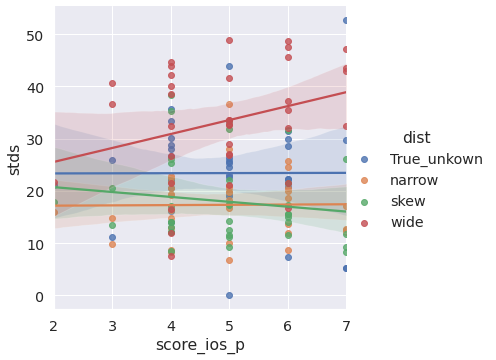

Total ASRM Score
True_unkown
35
Kendall r:0.0017528625159524093 p:0.9885790958354932
pearson r:0.07683530291143342 p:0.6608754509612051
spearman] r:-0.016917259237091118 p:0.9231585455170153
narrow
35
Kendall r:-0.07887881321785842 p:0.5194774395202413
pearson r:0.048650695561934326 p:0.7813710264019736
spearman] r:-0.15648464794309283 p:0.36934441156744646
skew
35
Kendall r:-0.080699518973187 p:0.5101991526259952
pearson r:-0.062345814512080606 p:0.7219949404477619
spearman] r:-0.11511591301309997 p:0.5102193824388992
wide
35
Kendall r:0.21560208946214635 p:0.0782926226219324
pearson r:0.2238496109228642 p:0.19611703533905192
spearman] r:0.28801633851147623 p:0.09338411894488673


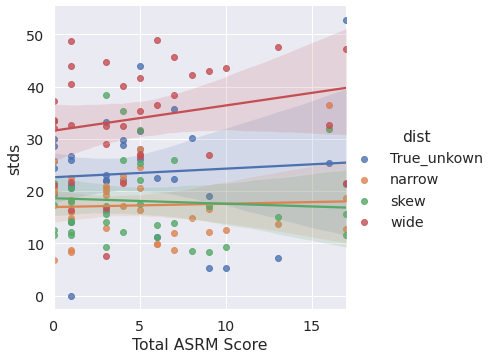

TEPS Anticipatory Scale.1
True_unkown
35
Kendall r:0.09890211784659414 p:0.40912586907836335
pearson r:0.08022421801184428 p:0.6468692219360292
spearman] r:0.13410973472990975 p:0.4424461767863873
narrow
35
Kendall r:-0.04774584999490752 p:0.690272828728439
pearson r:-0.05967070056878092 p:0.7334802958935132
spearman] r:-0.04881818795607593 p:0.7806366888955105
skew
35
Kendall r:-0.14847800066809522 p:0.21561553527721722
pearson r:-0.2055582108079981 p:0.236161562371267
spearman] r:-0.19816241329055345 p:0.2538162410474416
wide
35
Kendall r:-0.06820835713558217 p:0.5691769520418111
pearson r:0.13218922340867317 p:0.44906697376964133
spearman] r:-0.027214736964019343 p:0.8766747947113824


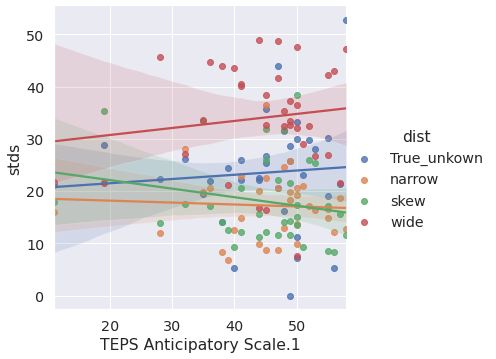

TEPS Consummatory Scale.1
True_unkown
35
Kendall r:0.14873968157627282 p:0.21555221332689556
pearson r:0.16654917874230357 p:0.33895337388929486
spearman] r:0.23949528237470155 p:0.16584508154401548
narrow
35
Kendall r:0.07693431805669285 p:0.5217998530580558
pearson r:0.18459335405858415 p:0.28843352172976316
spearman] r:0.15306933396063233 p:0.3800131321431166
skew
35
Kendall r:-0.037643980171551995 p:0.7541287866236959
pearson r:0.012911288161105832 p:0.9413182502151023
spearman] r:-0.02399329905861279 p:0.8911804397097598
wide
35
Kendall r:-0.1213852573783376 p:0.312168388448788
pearson r:-0.13764904382625548 p:0.43038541603715363
spearman] r:-0.15952321971882583 p:0.3600035472643701


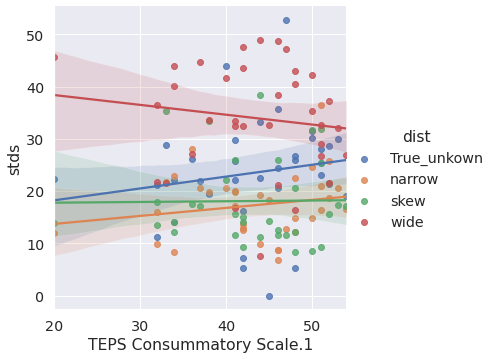

In [81]:
from scipy.stats import pearsonr, spearmanr, kendalltau

var='stds'

columns=full_df.select_dtypes(include=np.number).columns.tolist()
print(columns)
#[full_df['dist']=='True_unkown']

plt_df=full_df[full_df['dist'].isin(
    ['wide','narrow','True_unkown','skew'])].groupby(
    by=['sub','dist']).mean().reset_index()

display(plt_df.head(10))


print(len(plt_df['sub'].unique()))
print(len(plt_df))
#plt_df=full_df[(full_df['dist']==dist)&(full_df['Amb']==100)&(full_df['Choose_Risk']==True)]
#plt_df=plt_df[(plt_df['stds']>10) & ((plt_df['stds']<24))]

for column in columns:
    print(column)
    
    sns.lmplot(x=column,y=var,data=plt_df,hue='dist')
    #pltr=plt_df[plt_df[column].notna()]
    #print(len(pltr['sub'].unique()))
    #r,p=kendalltau(pltr[var],pltr[column])
    #print("Kendall r:%s p:%s"%(r,p))
    #r,p=pearsonr(pltr[var],pltr[column])
    #print("pearson r:%s p:%s"%(r,p))
    #r,p=spearmanr(pltr[var],pltr[column])
    #print("spearman] r:%s p:%s"%(r,p))

    for dist in plt_df['dist'].unique():
        print(dist)
        
        pltr=plt_df[plt_df['dist']==dist]
        pltr=pltr[(pltr[column].notna())&(pltr[var].notna())]
        
        print(len(pltr['sub'].unique()))
        
        r,p=kendalltau(pltr[var],pltr[column])
        print("Kendall r:%s p:%s"%(r,p))
        r,p=pearsonr(pltr[var],pltr[column])
        print("pearson r:%s p:%s"%(r,p))
        r,p=spearmanr(pltr[var],pltr[column])
        print("spearman] r:%s p:%s"%(r,p))
    plt.show()

['means', 'stds', 'skew', 'Amb', 'Risk_per', 'Money', 'RiskisLeft', 'RT', 'Max_risk', 'Total BDI score', 'TEPS Anticipatory Scale', 'TEPS Consummatory Scale', 'Total AADIS Score', 'SUSD Mania Scale', 'SUSD Depression Scale', 'IRI subscale Perspective Taking', 'IRI subscale Fantasy', 'IRI subscale Empathic Concern', 'IRI subscale Personal Distress', 'AQ subscale Social Skill', 'AQ subscale Attention Switching', 'AQ subscale Attention to detail', 'AQ subscale Communication', 'AQ subscale Imagination', 'AQ Total', 'TEI Subscale wellbeing', 'TEI Subscale selfcontrol', 'TEI Subscale emotionality', 'TEI Subscale sociability', 'TEI Total or global trait emotional intelligence', 'TOTAL PNR', 'PVSS Total Score', 'PVSS Food Subscale', 'PVSS Physical Touch Subscale', 'PVSS Outdoors Subscale', 'PVSS Positive Feedback Subscale', 'PVSS Hobbies Subscale', 'PVSS Social Interactions Subscale', 'PVSS Goals Subscale', 'TOTAL RSE', 'TOTAL BPAQ', 'BPAQ Physical Subscale', 'BPAQ Verbal Subscale', 'BPAQ Ange

sub      means       stds      skew        Amb  Choose_Risk  Risk_per  \
0  sub-1001  51.342212  22.658869  0.110619  75.000000     0.500000    68.750   
1  sub-1009  57.505411  24.965343 -0.390059  75.000000     0.500000    68.125   
2  sub-1010  59.562500  23.444143 -0.160655  75.000000     0.500000    71.875   
3  sub-1011  51.425439  23.157346  0.336405  75.000000     0.500000    67.500   
4  sub-1012  52.222222  32.033556 -0.205451  75.000000     0.500000    68.750   
5  sub-1013  65.010130  18.879243 -0.193904  75.000000     0.500000    66.875   
6  sub-1015  51.889347  19.657140  0.120214  73.333333     0.533333    68.000   
7  sub-1021  54.601190  19.180993  0.668565  75.000000     0.500000    63.125   
8  sub-1240  58.982312  24.682451 -0.546847  75.000000     0.500000    74.375   
9  sub-1242  55.970856  16.231887  0.129063  75.000000     0.500000    73.750   

   Money  RiskisLeft        RT  ...  TOTAL RSE  TOTAL BPAQ  \
0    8.0      0.8750  2.271003  ...       33.0        62.0   
1   13.0      1.0000  2.174392  ...       11.0        55.0   
2   13.0      0.8750  1.800914  ...       27.0        62.0   
3   13.0      1.0000  2.234786  ...       16.0        66.0   
4   13.0      0.8750  2.649757  ...       12.0        32.0   
5   13.0      1.0000  2.199298  ...       11.0        61.0   
6   13.0      0.8000  1.929959  ...       13.0        45.0   
7   13.0      0.8750  2.062609  ...       24.0        81.0   
8   13.0      0.8750  2.098493  ...       27.0        50.0   
9   13.0      0.9375  2.273805  ...       17.0        75.0   

   BPAQ Physical Subscale  BPAQ Verbal Subscale  BPAQ Anger Subscale  \
0                    11.0                  11.0                 18.0   
1                    13.0                  11.0                  9.0   
2                     9.0                  15.0                 11.0   
3                    20.0                  12.0                  9.0   
4                     9.0                   7.0                  8.0   
5                    14.0                  12.0                 14.0   
6                    11.0                  10.0                  9.0   
7                    23.0                   9.0                 26.0   
8                    12.0                  10.0                 11.0   
9                    21.0                  20.0                 16.0   

   BPAQ Hostility Subscale  score_ios_p  Total ASRM Score  \
0                     22.0          5.0               0.0   
1                     22.0          6.0               0.0   
2                     27.0          6.0               7.0   
3                     25.0          5.0               6.0   
4                      8.0          5.0               5.0   
5                     21.0          4.0               3.0   
6                     15.0          4.0               1.0   
7                     23.0          2.0               1.0   
8                     17.0          5.0               5.0   
9                     18.0          5.0               0.0   

   TEPS Anticipatory Scale.1  TEPS Consummatory Scale.1  
0                       49.0                       41.0  
1                       50.0                       53.0  
2                       28.0                       20.0  
3                       44.0                       44.0  
4                       47.0                       40.0  
5                       48.0                       42.0  
6                       45.0                       48.0  
7                       11.0                       32.0  
8                       32.0                       36.0  
9                       39.0                       46.0  

[10 rows x 51 columns]

37
37
means
36
Kendall r:-0.13333333333333333 p:0.2525593171851682
pearson r:-0.3075676445227487 p:0.0680318221529182
spearman] r:-0.18146718146718147 p:0.2895074253110588


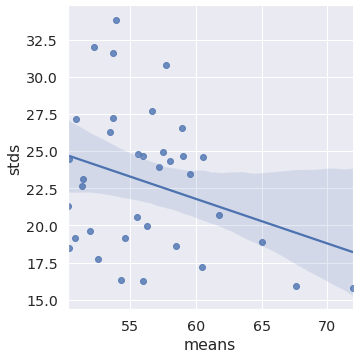

stds
36
Kendall r:1.0 p:5.376440532573272e-42
pearson r:1.0 p:0.0
spearman] r:1.0 p:0.0


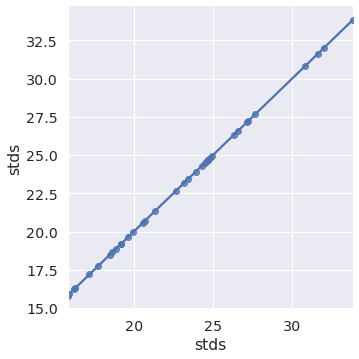

skew
36
Kendall r:-0.17142857142857143 p:0.14127581983276732
pearson r:-0.2549798112341596 p:0.13340228062743786
spearman] r:-0.2522522522522523 p:0.1377503365286878


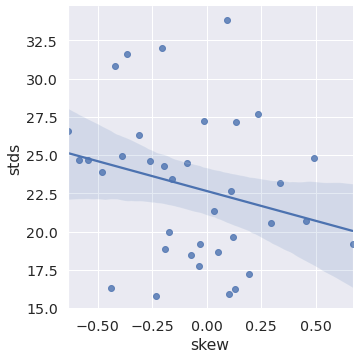

Amb
36
Kendall r:0.12035869531881407 p:0.3839737295596143
pearson r:0.19581565171310666 p:0.25239455569370345
spearman] r:0.14897149072774932 p:0.3858667494269822


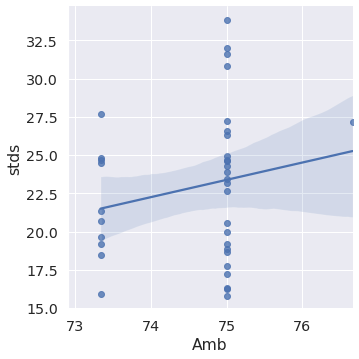

Risk_per
36
Kendall r:0.028988551782622423 p:0.8059315109856342
pearson r:0.09781919906435582 p:0.5703297291269303
spearman] r:0.039572101992614954 p:0.8187579139939701


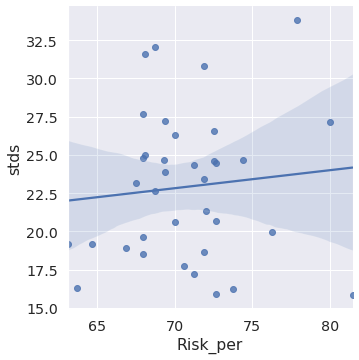

Money
36
Kendall r:0.020203050891044218 p:0.8851899187749305
pearson r:0.008921255520439436 p:0.9588160216412674
spearman] r:0.024406919890778544 p:0.8876375129976648


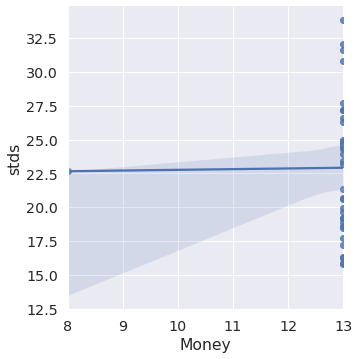

RiskisLeft
36
Kendall r:0.05928889972091031 p:0.6351318944178614
pearson r:0.13419074463385366 p:0.4352329537418689
spearman] r:0.08983048128504302 p:0.6023551853316749


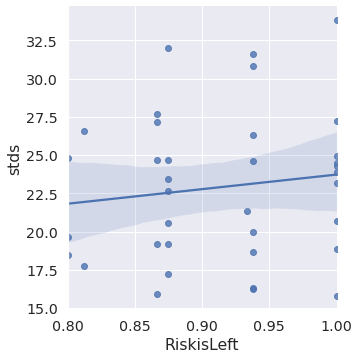

RT
36
Kendall r:-0.14920634920634923 p:0.20041713178109355
pearson r:-0.19004701662921797 p:0.2669149303689178
spearman] r:-0.22368082368082373 p:0.18971954801084623


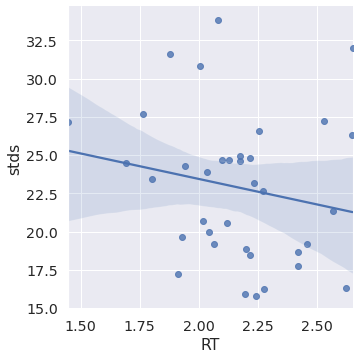

Max_risk
36
Kendall r:0.028988551782622423 p:0.8059315109856342
pearson r:0.09781919906435582 p:0.5703297291269303
spearman] r:0.039572101992614954 p:0.8187579139939701


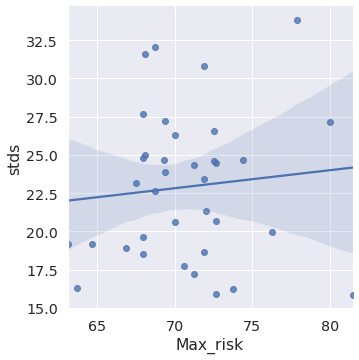

Total BDI score
28
Kendall r:0.054829307913314085 p:0.6907160019738732
pearson r:0.07201978961978757 p:0.7157149789068539
spearman] r:0.057238071041649304 p:0.7723489031558226


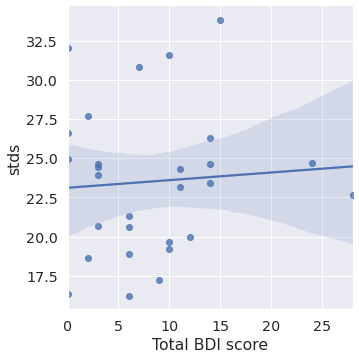

TEPS Anticipatory Scale
30
Kendall r:-0.060540470412745996 p:0.6421244612192455
pearson r:-0.12462361465681002 p:0.5117258250147868
spearman] r:-0.08598804740369255 p:0.651411734474641


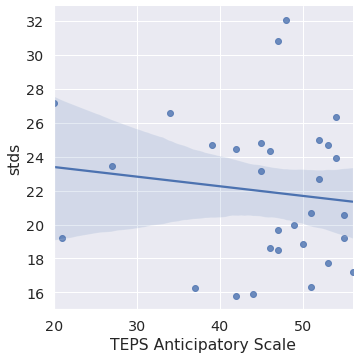

TEPS Consummatory Scale
30
Kendall r:-0.08687384989534738 p:0.5076428656860925
pearson r:-0.10687770565026214 p:0.5740252381014149
spearman] r:-0.1035140667348139 p:0.5862045209132123


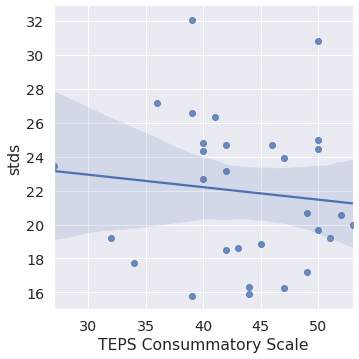

Total AADIS Score
30
Kendall r:0.14915408491089419 p:0.27273475396310953
pearson r:0.20339083898437033 p:0.28103422604183526
spearman] r:0.18804205490816195 p:0.31968847467040407


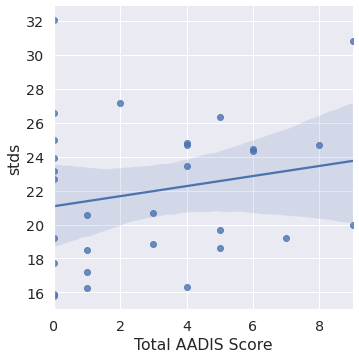

SUSD Mania Scale
30
Kendall r:-0.07594823374942682 p:0.5743062577650713
pearson r:-0.1319108604344718 p:0.48714876221356834
spearman] r:-0.09198288814616962 p:0.6287901927580348


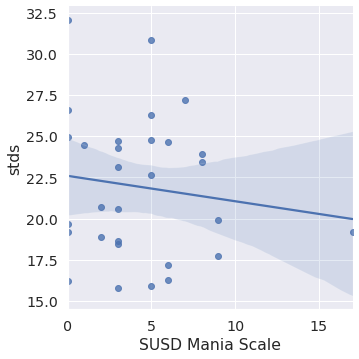

SUSD Depression Scale
30
Kendall r:0.036278586317787555 p:0.786594258225733
pearson r:0.07473325117974113 p:0.694698110304989
spearman] r:0.03998843072506623 p:0.8338217572538935


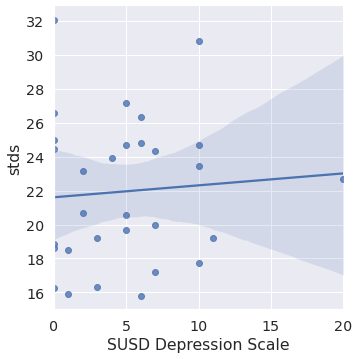

IRI subscale Perspective Taking
30
Kendall r:0.12724741273588241 p:0.33335640750144124
pearson r:0.20809404528743106 p:0.26981807836296007
spearman] r:0.19281504505648997 p:0.3073320602336037


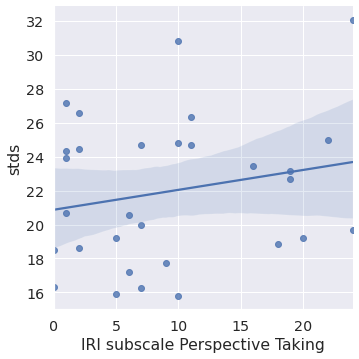

IRI subscale Fantasy
30
Kendall r:0.10144924078949212 p:0.4406467837332253
pearson r:0.13165383163242766 p:0.4880052356642547
spearman] r:0.11147196722948022 p:0.5575757211972873


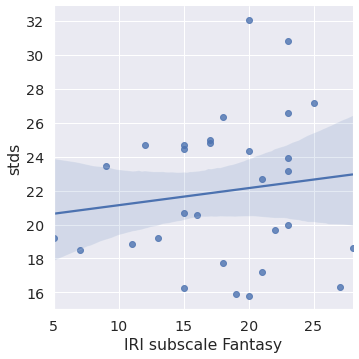

IRI subscale Empathic Concern
30
Kendall r:0.032910671369767615 p:0.8020508710081262
pearson r:0.1134236643970607 p:0.5506540729114289
spearman] r:0.07295064616871584 p:0.7016455889706721


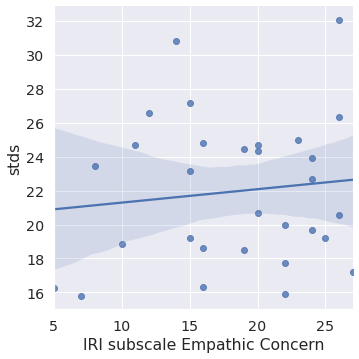

IRI subscale Personal Distress
30
Kendall r:-0.15731210656725067 p:0.23036143196188275
pearson r:-0.1974952464364331 p:0.2955103523236824
spearman] r:-0.22415597322957972 p:0.23372801098339988


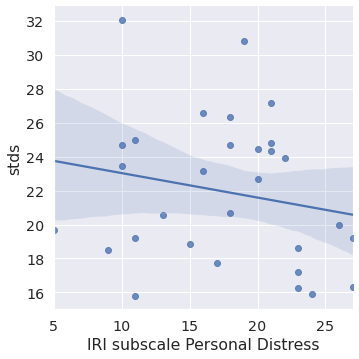

AQ subscale Social Skill
30
Kendall r:-0.03299006996856211 p:0.8019264462586296
pearson r:-0.0551029619671545 p:0.772423262372467
spearman] r:-0.04754490935991778 p:0.8029819981175936


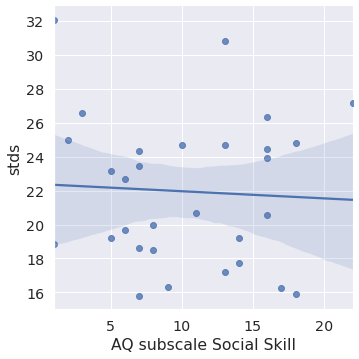

AQ subscale Attention Switching
36
Kendall r:-0.09548198320525772 p:0.43725948863826514
pearson r:-0.11734270105858824 p:0.4955113205567338
spearman] r:-0.1357751150817269 p:0.42978081576963345


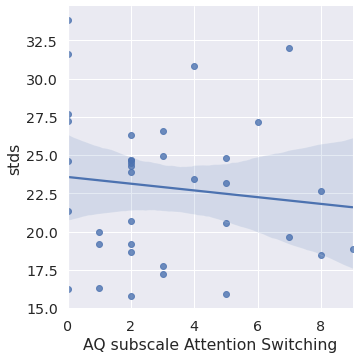

AQ subscale Attention to detail
36
Kendall r:-0.3187452886637975 p:0.008820717943564456
pearson r:-0.4829080956119196 p:0.0028530120186175214
spearman] r:-0.4489605217475303 p:0.006021427576420489


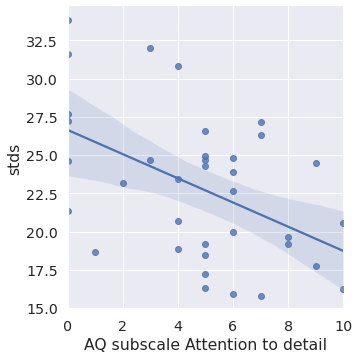

AQ subscale Communication
36
Kendall r:-0.26794243038028337 p:0.027660607602075143
pearson r:-0.44175149600225116 p:0.0069906658641366625
spearman] r:-0.3984312731524034 p:0.01609182410669776


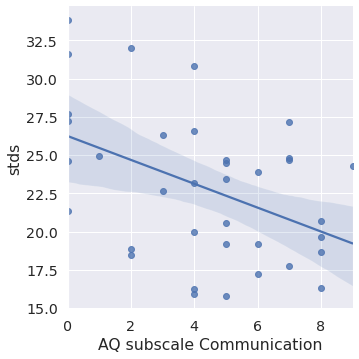

AQ subscale Imagination
36
Kendall r:-0.2008857307035997 p:0.10028944233421139
pearson r:-0.26536195962818476 p:0.11777704861474265
spearman] r:-0.2965828963235754 p:0.0790104044117032


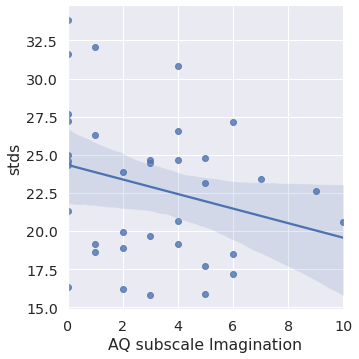

AQ Total
28
Kendall r:0.14071839434932923 p:0.31471564761324045
pearson r:0.048871663071663796 p:0.8049379825987503
spearman] r:0.16842353425463844 p:0.39159664758588075


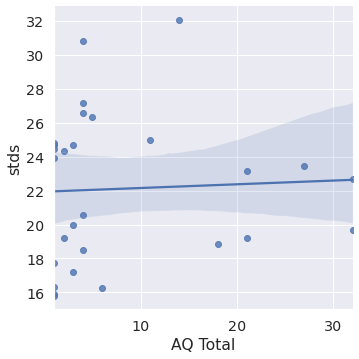

TEI Subscale wellbeing
36
Kendall r:-0.19192701434654486 p:0.1063381064334668
pearson r:-0.34184048620742435 p:0.041291531721764696
spearman] r:-0.3111336260019014 p:0.0647379957379605


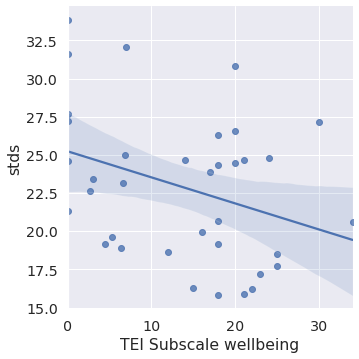

TEI Subscale selfcontrol
30
Kendall r:0.09335963333449449 p:0.47429792109226643
pearson r:0.0954812898984693 p:0.6157379356835742
spearman] r:0.141997610782017 p:0.45415243042402786


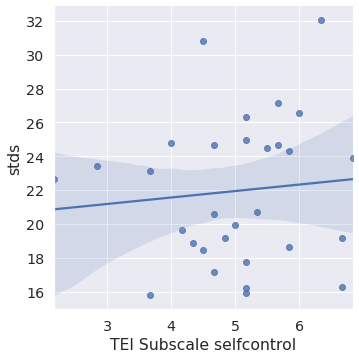

TEI Subscale emotionality
30
Kendall r:-0.020931647671393452 p:0.872190421145167
pearson r:0.009896922246583215 p:0.9586040245628542
spearman] r:-0.023170348457314385 p:0.9032690920471448


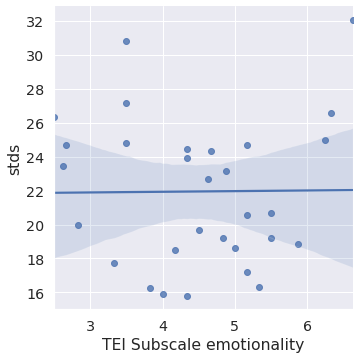

TEI Subscale sociability
30
Kendall r:-0.058280758662265016 p:0.6548929140591393
pearson r:-0.17918091287818055 p:0.3434297745019032
spearman] r:-0.10138158499166439 p:0.5939841109652733


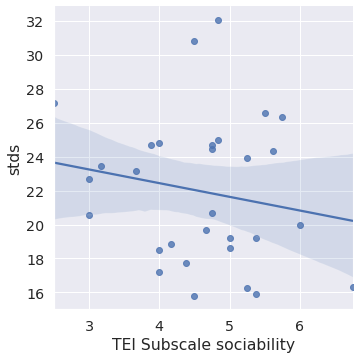

TEI Total or global trait emotional intelligence
30
Kendall r:-0.0353038917036425 p:0.7880712392653473
pearson r:-0.030268915439667046 p:0.8738413172881386
spearman] r:-0.053137199944076355 p:0.780341175194001


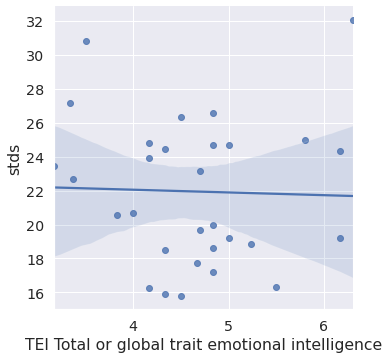

TOTAL PNR
30
Kendall r:-0.020737382237384958 p:0.8723923763758188
pearson r:-0.009579450491887125 p:0.959930844179668
spearman] r:-0.044948821762568224 p:0.8135470230178545


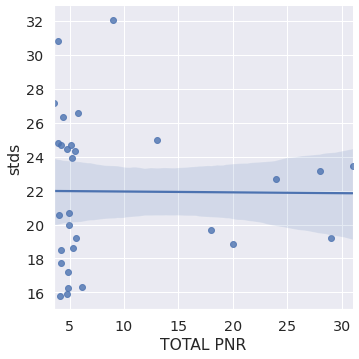

PVSS Total Score
29
Kendall r:0.019753146633673953 p:0.8806720514927974
pearson r:-0.08171912358251147 p:0.673448785761838
spearman] r:0.05740330304782312 p:0.7674038107063771


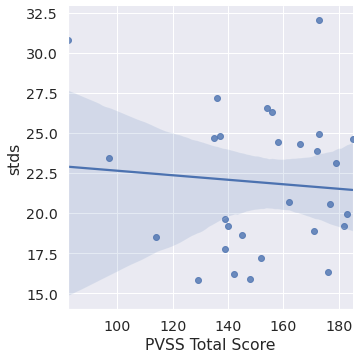

PVSS Food Subscale
29
Kendall r:-0.19272756336561275 p:0.15556136276401983
pearson r:-0.33188701657829106 p:0.07859591951734876
spearman] r:-0.311539870398144 p:0.09994268563400792


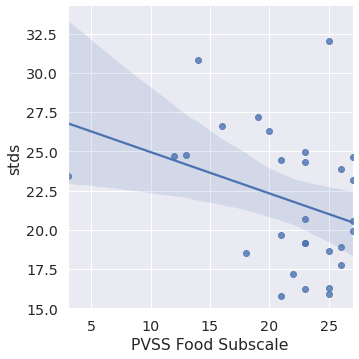

PVSS Physical Touch Subscale
29
Kendall r:0.11411693797506257 p:0.39612991324053626
pearson r:0.047978850378157904 p:0.8047913742703888
spearman] r:0.148387534440003 p:0.44236295095043787


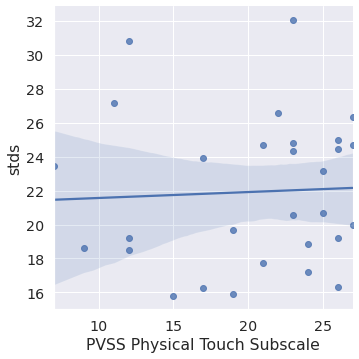

PVSS Outdoors Subscale
29
Kendall r:0.010104232298890023 p:0.9399211909501952
pearson r:-0.04095084383279319 p:0.8329537061657282
spearman] r:0.048937514913811056 p:0.8009674851648418


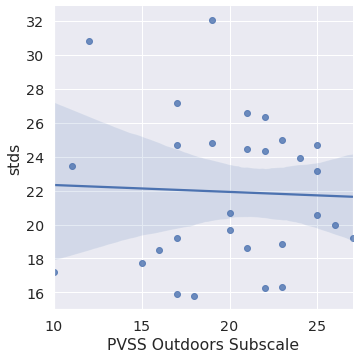

PVSS Positive Feedback Subscale
29
Kendall r:0.146081831443313 p:0.28096154597831646
pearson r:0.08231730628373903 p:0.6711904252345579
spearman] r:0.1956648103112385 p:0.30905180322991166


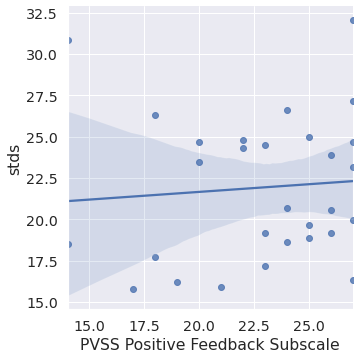

PVSS Hobbies Subscale
29
Kendall r:0.09751799842521075 p:0.4719890649688243
pearson r:-0.05274563236516258 p:0.7858229765261633
spearman] r:0.1349913334200465 p:0.48506463182487813


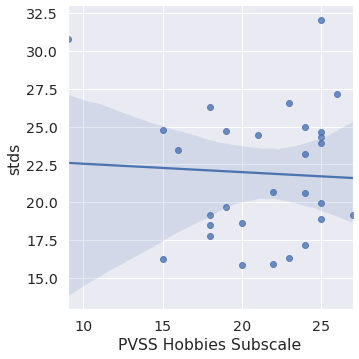

PVSS Social Interactions Subscale
29
Kendall r:0.12486120698215367 p:0.3616459401439809
pearson r:-0.0021694139684497737 p:0.991088813520706
spearman] r:0.16661463937100357 p:0.38767523113914903


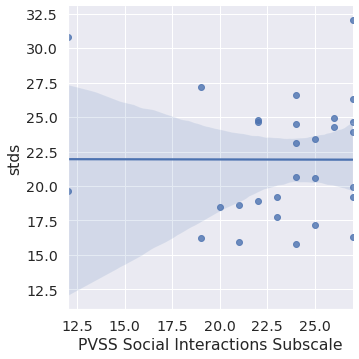

PVSS Goals Subscale
29
Kendall r:0.02873267545705324 p:0.8341011248988377
pearson r:-0.09706298174118108 p:0.6164461170806315
spearman] r:0.04266287006728073 p:0.8260732990811497


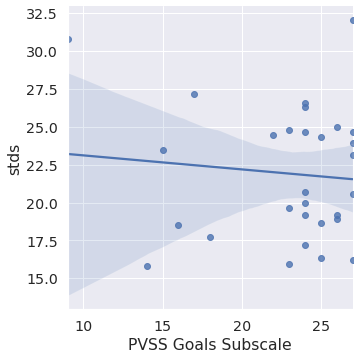

TOTAL RSE
36
Kendall r:0.021233158160501094 p:0.858824346156541
pearson r:0.01942516492249323 p:0.9104680681748683
spearman] r:0.049596696440491514 p:0.7739172069430423


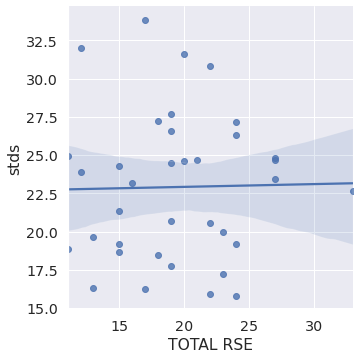

TOTAL BPAQ
35
Kendall r:-0.19949630736812787 p:0.0935295689041764
pearson r:-0.3066599256851242 p:0.07316707978152798
spearman] r:-0.2764854694452513 p:0.10787349472151415


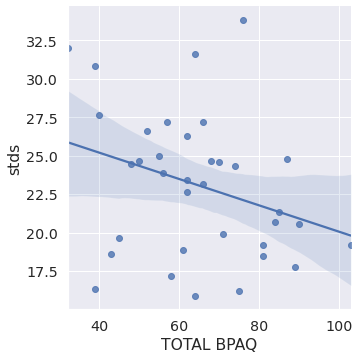

BPAQ Physical Subscale
35
Kendall r:-0.18201616283275587 p:0.1308405897826868
pearson r:-0.3187988051944116 p:0.06196035610216494
spearman] r:-0.267295159627584 p:0.1205887503720037


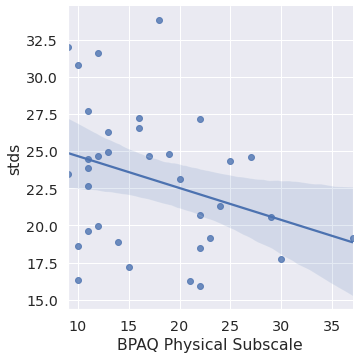

BPAQ Verbal Subscale
35
Kendall r:-0.13934026166788915 p:0.25296874126265945
pearson r:-0.23756233969107798 p:0.16939159578199225
spearman] r:-0.1849555077073053 p:0.28747200021193825


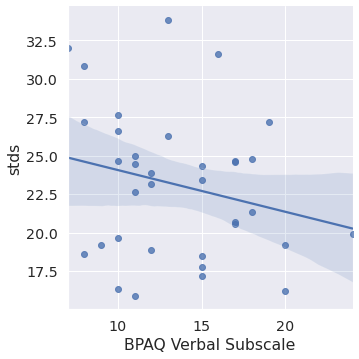

BPAQ Anger Subscale
35
Kendall r:-0.13213495271424255 p:0.2775727296873841
pearson r:-0.16076488179496307 p:0.3562276532529995
spearman] r:-0.1650853320516317 p:0.34327576294386075


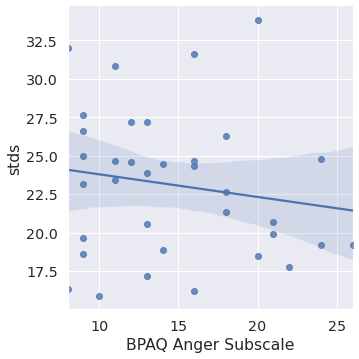

BPAQ Hostility Subscale
35
Kendall r:-0.1360119537116971 p:0.26003288647914635
pearson r:-0.2125031211205377 p:0.22035504541814907
spearman] r:-0.18811553745805143 p:0.27916969699132466


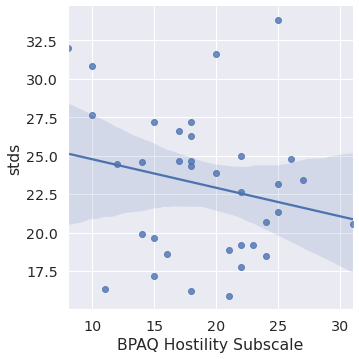

score_ios_p
36
Kendall r:0.07700086100686968 p:0.5441182392240317
pearson r:0.1344954167089184 p:0.43418156587632595
spearman] r:0.10018370120629039 p:0.5610018744622032


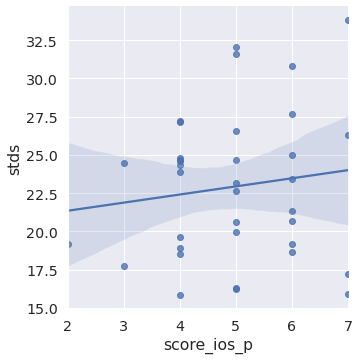

Total ASRM Score
35
Kendall r:0.06485591309023915 p:0.5963647654858271
pearson r:0.2176954277045249 p:0.2090210030714527
spearman] r:0.09248101716276477 p:0.5972289391993142


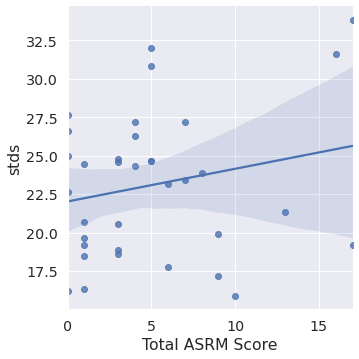

TEPS Anticipatory Scale.1
35
Kendall r:-0.006820835713558217 p:0.9546038193513182
pearson r:0.04405120329655429 p:0.8016072023033367
spearman] r:0.010942007645327363 p:0.9502565567163583


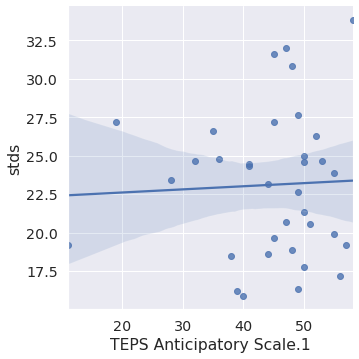

TEPS Consummatory Scale.1
35
Kendall r:0.07693431805669285 p:0.5217998530580558
pearson r:0.09892530080432581 p:0.5718118543146349
spearman] r:0.1154684343259399 p:0.5089161710119364


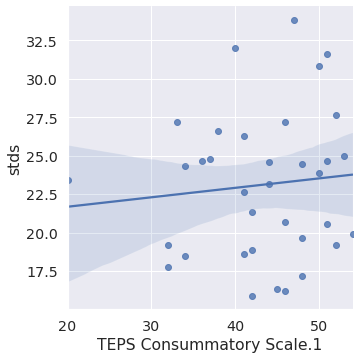

In [82]:
var='stds'

columns=full_df.select_dtypes(include=np.number).columns.tolist()
print(columns)
#[full_df['dist']=='True_unkown']

plt_df=full_df[full_df['dist'].isin(
    ['wide','narrow','True_unkown','skew'])].groupby(
    by=['sub']).mean().reset_index()

display(plt_df.head(10))


print(len(plt_df['sub'].unique()))
print(len(plt_df))
#plt_df=full_df[(full_df['dist']==dist)&(full_df['Amb']==100)&(full_df['Choose_Risk']==True)]
#plt_df=plt_df[(plt_df['stds']>10) & ((plt_df['stds']<24))]

for column in columns:
    print(column)
    
    sns.lmplot(x=column,y=var,data=plt_df)
    
    
    pltr=plt_df[(plt_df[column].notna())&(plt_df[var].notna())]
    print(len(pltr['sub'].unique()))
    r,p=kendalltau(pltr[var],pltr[column])
    print("Kendall r:%s p:%s"%(r,p))
    r,p=pearsonr(pltr[var],pltr[column])
    print("pearson r:%s p:%s"%(r,p))
    r,p=spearmanr(pltr[var],pltr[column])
    print("spearman] r:%s p:%s"%(r,p))
    
    plt.show()

In [37]:
var='stds'
ID='TOTAL BPAQ'
plt_df=full_df[(full_df['dist'].isin(['narrow','skew']))].copy()
plt_df=plt_df.groupby(by=['sub','dist']).mean().reset_index()
               
display(plt_df.head())
g=sns.lmplot(x=var,y=ID,data=plt_df,hue='dist',palette=['Tab:orange','tab:blue'])

plt.title("",weight='bold').set_fontsize('18')
plt.xlabel('Reported Variance',weight='bold').set_fontsize('18')
plt.ylabel('AQ Score',weight='bold').set_fontsize('18')

plt_df=plt_df.dropna()

for dist in plt_df['dist'].unique():
    print(dist)
    pltr=plt_df[(plt_df[column].notna())&(plt_df['dist']==dist)]
    print(len(pltr))
    r,p=pearsonr(pltr[var],pltr[ID])
    print("r:%s p:%s"%(r,p))

new_title = 'Distribution'
g._legend.set_title(new_title)
# replace labels
new_labels = ['Unkown', 'Wide']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

plt.show()

NameError: name 'full_df' is not defined

37


sub    dist      means       stds      skew   Amb  Choose_Risk  \
0  sub-1001  narrow  22.222222  19.860625  0.222881  75.0          0.5   
1  sub-1001    skew  83.000000  11.595018  0.342125  75.0          0.5   
2  sub-1009  narrow  39.545455  20.581377 -0.654108  75.0          0.5   
3  sub-1009    skew  70.000000  17.320508  0.245374  75.0          0.5   
4  sub-1010  narrow  50.000000  11.881771  0.000000  75.0          0.5   

   Risk_per  Money  RiskisLeft  ...  TOTAL RSE  TOTAL BPAQ  \
0      67.5    8.0        1.00  ...       33.0        62.0   
1      72.5    8.0        0.75  ...       33.0        62.0   
2      62.5   13.0        1.00  ...       11.0        55.0   
3      72.5   13.0        1.00  ...       11.0        55.0   
4      72.5   13.0        1.00  ...       27.0        62.0   

   BPAQ Physical Subscale  BPAQ Verbal Subscale  BPAQ Anger Subscale  \
0                    11.0                  11.0                 18.0   
1                    11.0                  11.0                 18.0   
2                    13.0                  11.0                  9.0   
3                    13.0                  11.0                  9.0   
4                     9.0                  15.0                 11.0   

   BPAQ Hostility Subscale  score_ios_p  Total ASRM Score  \
0                     22.0          5.0               0.0   
1                     22.0          5.0               0.0   
2                     22.0          6.0               0.0   
3                     22.0          6.0               0.0   
4                     27.0          6.0               7.0   

   TEPS Anticipatory Scale.1  TEPS Consummatory Scale.1  
0                       49.0                       41.0  
1                       49.0                       41.0  
2                       50.0                       53.0  
3                       50.0                       53.0  
4                       28.0                       20.0  

[5 rows x 52 columns]

narrow
r:nan p:nan
skew
r:nan p:nan


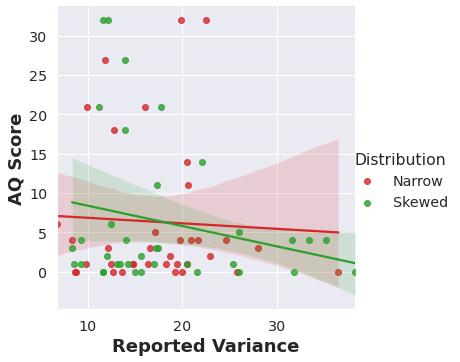

In [72]:
var='stds'
ID='AQ Total'
dist_list=['skew','narrow']

plt_df=full_df[full_df['dist'].isin(dist_list)].groupby(by=['sub','dist']).mean().reset_index()
#plt_df=plt_df.groupby(by=['sub','dist']).mean().reset_index()
#plt_df=plt_df[plt_df[ID]!=0]
#plt_df=plt_df[(plt_df[])]
print(len(plt_df['sub'].unique()))
               
display(plt_df.head())
g=sns.lmplot(x=var,y=ID,data=plt_df,
             hue='dist',palette=['Tab:red','tab:green'])

plt.title("",weight='bold').set_fontsize('18')
plt.xlabel('Reported Variance',weight='bold').set_fontsize('18')
plt.ylabel('AQ Score',weight='bold').set_fontsize('18')


for dist in plt_df['dist'].unique():
    print(dist)
    sub_df=plt_df[plt_df['dist']==dist]
    r,p=kendalltau(sub_df[var],sub_df[ID])
    print("r:%s p:%s"%(r,p))

new_title = 'Distribution'
g._legend.set_title(new_title)
# replace labels
new_labels = ['Narrow', 'Skewed']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

plt.show()




In [ ]:
t_df=full_df[full_df['Choose_Risk']==False].copy().dropna()
t_df['diff']=0
data=[]
for sub in t_df['sub'].unique():
    for dist in t_df.dist.unique():
        if len(t_df[(t_df['sub']==sub)&(t_df['dist']==dist)])==2:
    
            val1=t_df[(t_df['sub']==sub)&(t_df['dist']==dist)&(t_df['Amb']==50)]['Risk_per'].values
            val2=t_df[(t_df['sub']==sub)&(t_df['dist']==dist)&(t_df['Amb']==100)]['Risk_per'].values
            val3=np.subtract(val1[0],val2[0])
            data.append([sub,dist,val1[0],val2[0],val3])
        else:
            display(t_df[(t_df['sub']==sub)&(t_df['dist']==dist)])
            val1=t_df[(t_df['sub']==sub)&(t_df['dist']==dist)&(t_df['Amb']==50)]['Risk_per'].values
            val2=0
            val3=np.subtract(val1[0],val2)
            data.append([sub,dist,val1[0],val2,val3])


In [ ]:
part_df=pd.DataFrame(columns=['sub','dist','max50','max100','diff'],data=data)
display(part_df.head())

full_df=full_df.merge(part_df,on=['sub','dist'])
full_df.columns


plt_df=full_df.groupby(by=['sub','dist']).mean().reset_index()#[full_df['dist']=='wide']
display(plt_df)

plt_df['stds_half']=plt_df.groupby(['dist'])['diff'].transform(lambda x: pd.qcut(x, q=2))

#sns.barplot(x='dist',y='diff',hue="stds_half",data=plt_df,ci=68)
from scipy.stats import ttest_ind

for dist in plt_df['dist'].unique():
    print(dist)
    sub_df=plt_df[plt_df['dist']==dist]
    cat1 = sub_df[sub_df['stds_half']=='low']
    cat2 = sub_df[sub_df['stds_half']=='high']

    t,p=ttest_ind(cat1['diff'], cat2['diff'])
    print("t:%s , p:%s"%(t,p))

mod_df=plt_df
display(mod_df)

model = Lm("max100 ~means*dist", data=plt_df, family='gaussian')
sns.lmplot(y='diff',x='means',hue='dist',data=plt_df)
display(model.fit())
#display(model.summary())
#display(model.coefs)

plt_df['resids']=model.residuals


dists=['narrow','skew',"True_unkown",'wide']
mod_df=plt_df[plt_df['dist'].isin(dists)]
model = Lmer("resids ~stds*dist+(1|sub)", data=mod_df, family='gaussian')
display(model.fit())

sns.lmplot(y='resids',x='stds',hue='dist',data=mod_df)


In [ ]:
from scipy.stats.stats import pearsonr, spearmanr, kendalltau


#Choose Range and Metric Max vs Min
#plt_df=sub_df[(sub_df['Choose_Risk']==True)]

for dist in full_df['dist'].unique():
    print(dist)
    plt_df=full_df[(full_df['dist']==dist)&(full_df['Amb']==100)&(full_df['Choose_Risk']==False)]
    plt_df=plt_df[(plt_df['means']>40) & ((plt_df['means']<80))]
    display(plt_df)
    
    
    #var='means'

    #sns.lmplot(x=var,y='diff',hue='dist',data=plt_df)

    #r,p=spearmanr(plt_df[var],plt_df['Risk_per'])
    #print("r^2:%s p:%s"%(r**2,p))
    #plt.show()
    
    var='stds'

    sns.lmplot(x=var,y='diff',hue='dist',data=plt_df)

    r,p=spearmanr(plt_df[var],plt_df['diff'])
    print("r^2:%s p:%s"%(r**2,p))
    plt.show()
    
    #var='skew'

    #sns.lmplot(x=var,y='diff',hue='dist',data=plt_df)

    #r,p=spearmanr(plt_df[var],plt_df['Risk_per'])
    #print("r^2:%s p:%s"%(r**2,p))
    #plt.show()
    
    sns.relplot(x="means", y="diff", hue="stds",data=plt_df,size='stds')
    plt.show()

In [ ]:
dist='skew'
var='stds'


plt_df=full_df[(full_df['dist']==dist)&(full_df['Amb']==100)&(full_df['Choose_Risk']==True)]
#plt_df=full_df[(full_df['Amb']==100)&(full_df['Choose_Risk']==False)]
#plt_df = plt_df.dropna(axis=0)

plt_df=plt_df[(plt_df['means']>50) & ((plt_df['means']<70))]
sns.lmplot(x=var,y='Risk_per',hue='dist',data=plt_df)

r,p=pearsonr(plt_df[var],plt_df['Risk_per'])
print("r^2:%s p:%s"%(r**2,p))
plt.show()

dist='narrow'
var='stds'


plt_df=full_df[(full_df['dist']==dist)&(full_df['Amb']==100)&(full_df['Choose_Risk']==True)]
#plt_df=full_df[(full_df['Amb']==100)&(full_df['Choose_Risk']==False)]
#plt_df = plt_df.dropna(axis=0)

plt_df=plt_df[(plt_df['means']>30) & ((plt_df['means']<70))]
sns.lmplot(x=var,y='Risk_per',hue='dist',data=plt_df)

r,p=pearsonr(plt_df[var],plt_df['Risk_per'])
print("r^2:%s p:%s"%(r**2,p))
plt.show()

In [ ]:


plt_df=full_df.groupby(
    by=['sub','dist']).mean().reset_index()[[
    'sub','dist','means','stds','score_asrm','score_aq_total','score_bpaq_total']]
display(plt_df)

sns.pairplot(plt_df, x_vars=["means", "stds"], y_vars=["score_asrm","score_aq_total","score_bpaq_total"],
             hue='dist',hue_order=['wide','True_unkown','skew','narrow'], kind="reg",
            height=4,aspect=1);

In [ ]:
#import matplotlib
#matplotlib.rc_file_defaults()
sns.set_context("paper")
sns.set_style("white")


g=sns.pairplot(plt_df,hue='dist',hue_order=['wide','True_unkown','skew','narrow'], kind="reg",
            height=4,aspect=1);
g.axes[0,0].set_xlim((0,85))
g.axes[0,1].set_xlim((0,55))

g.axes[4,0].set_xlabel('Reported Mean',weight='bold').set_fontsize('18')
g.axes[4,1].set_xlabel('Reported Deviation',weight='bold').set_fontsize('18')

g.axes[4,0].set_ylabel('BPAQ',weight='bold').set_fontsize('18')
g.axes[3,0].set_ylabel('AQ',weight='bold').set_fontsize('18')
g.axes[2,0].set_ylabel('ASRM',weight='bold').set_fontsize('18')





plt.savefig("ind_diffs.svg")

In [ ]:
var='stds'
plt_df=full_df[(full_df['dist'].isin(['narrow','skew']))].copy()
               
g=sns.lmplot(x=var,y='score_bpaq_total',data=plt_df,hue='dist',
             hue_order=['skew','narrow'],
             palette=['Tab:green','tab:red'])

plt.xlabel('Reported Mean').set_fontsize('18')
plt.ylabel('BPAQ Score').set_fontsize('18')

g.axes[0][0].set_title("Realtionship Agression and Reported Variance")

plt_df=plt_df.dropna()

for dist in plt_df['dist'].unique():
    print(dist)
    sub_df=plt_df[plt_df['dist']==dist]
    r,p=spearmanr(sub_df[var],sub_df['score_bpaq_total'])
    print("r:%s p:%s"%(r,p))

new_title = 'Distribution'
g._legend.set_title(new_title)
# replace labels
new_labels = ['skew', 'narrow']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

plt.show()

In [ ]:
var='stds'

plt_df=full_df[(full_df['dist'].isin(['skew','narrow']))].copy()
               
g=sns.lmplot(x=var,y='score_aq_total',data=plt_df,hue='dist',
             hue_order=['skew','narrow'], palette=['Tab:green','tab:red'])

plt.xlabel('Reported Mean').set_fontsize('18')
plt.ylabel('AQ Score').set_fontsize('18')

g.axes[0][0].set_title("Realtionship Agression and Reported Variance")

plt_df=plt_df.dropna()

for dist in plt_df['dist'].unique():
    print(dist)
    sub_df=plt_df[plt_df['dist']==dist]
    r,p=spearmanr(sub_df[var],sub_df['score_aq_total'])
    print("r:%s p:%s"%(r,p))

new_title = 'Distribution'
g._legend.set_title(new_title)
# replace labels
#new_labels = ['Narrow', 'Skew']
#for t, l in zip(g._legend.texts, new_labels):
    #t.set_text(l)

plt.show()

In [ ]:
from scipy.stats.stats import pearsonr

per_df=pd.read_csv('../data/participants2.csv')
per_df['participant_id']=per_df['participant_id'].astype(str)
per_df['sub']='sub-'+per_df['participant_id']

new_df=sub_df.merge(per_df,on=['sub'])


df_aMax=df_aMax.groupby(by=['sub','dist','Amb','Choose_Risk'], as_index=False).max()
df_aMax=df_a[df_a['Choose_Risk']==False]
plt_df=df_aMax[df_aMax['Amb']==100]

plt_df=plt_df.merge(new_df,on=['sub','dist'])
plt_df=plt_df[(plt_df['means']>40)&(plt_df['means']<60)]
#display(plt_df.head())


var='stds'
dist='narrow'
plt_df=plt_df[plt_df['dist']==dist]

sns.lmplot(x=var,y='Risk_per',hue='dist',data=plt_df)
r,p=pearsonr(plt_df[var],plt_df['Risk_per'])
print("r^2:%s p:%s"%(r**2,p))
plt.show()

sns.swarmplot(x='Amb',y='Risk_per',hue='Choose_Risk',data=plt_df)

In [ ]:
print("Narrow vs Wide At 50")

mod_df=df_a[(df_a['dist'].isin(['narrow','wide']))&(df_a['Amb']==50)]
model = Lmer("Choose_Risk ~dist*Risk_per+(1|sub)", data=mod_df, family='binomial')
display(model.fit(robust="hcl"))

print("Narrow: 50vs100")
mod_df=df_a[(df_a['dist'].isin(['narrow']))&(df_a['Amb'].isin([50,100]))]
model = Lmer("Choose_Risk ~Amb*Risk_per+(1|sub)", data=mod_df, family='binomial')
display(model.fit(robust="hcl"))

print("Wide: 50vs100")
mod_df=df_a[(df_a['dist'].isin(['wide']))&(df_a['Amb'].isin([50,100]))]
model = Lmer("Choose_Risk ~Amb*Risk_per+(1|sub)", data=mod_df, family='binomial')
display(model.fit(robust="hcl"))

print("Skew: 50vs100")
mod_df=df_a[(df_a['dist'].isin(['skew']))&(df_a['Amb'].isin([50,100]))]
model = Lmer("Choose_Risk ~Amb*Risk_per+(Risk_per|sub)", data=mod_df, family='binomial')
display(model.fit(robust="hcl"))


print("Narrow vs Wide At 50 vs 100")

mod_df=df_a[(df_a['dist'].isin(['narrow','wide']))&(df_a['Amb'].isin([50,100]))]
model = Lmer("Choose_Risk ~dist*Amb*Risk_per+(1|sub)", data=mod_df, family='binomial')
display(model.fit(robust="hcl"))


#mode_df=df_a[df_a['Amb']==100]
#model = sm.GLM.from_formula("Choose_Risk ~ Risk_per+dist",family=sm.families.Binomial(), data=mod_df)
#res=model.fit()
#res.summary()

# Interaction:
- [ ] Is there an interaction between 2nd order variance and "Ambiguity"

    Yes Greater decrease for the wide than Narrow [x]
        Increase for the Skew [x]
        No change for the "True Unknown" [?]

In [ ]:
df_a.dist.unique()

In [ ]:
plotData=df_a[df_a['dist'].isin(['narrow','wide','skew'])]
    
graph=sns.lmplot(x='Risk_per',y='Choose_Risk', data=plotData ,
           hue='dist',logistic=True,x_jitter=0.5,y_jitter=0.03,
                 col="dist",ci=68)

titles=['Wide','Narrow','Skewed']
for i,a in enumerate(graph.axes[0]):
    if i==0:
        a.set_ylabel('Chose Risky Lottery')
    a.set_xlabel('Chance of Winning')
    a.set_title(titles[i])
    a.axhline(y=0.5,color='grey')
    a.axvline(x=50,color='grey')

In [ ]:
plotData=df_a[df_a['dist'].isin(['wide'])]
    
graph=sns.lmplot(x='Risk_per',y='Choose_Risk', data=plotData ,palette='Blues',
           hue='Amb',logistic=True,x_jitter=0.5,y_jitter=0.03,ci=68)

plt.title('Wide')
plt.xlabel('Chance of Winning')
plt.ylabel('Chose Risky Lottery')

plt.plot([20,90], [0.5,0.5], linewidth=2,color='grey')
plt.plot([50,50], [0,1], linewidth=2,color='grey')

In [ ]:
df_aMax=df_a.groupby(by=['sub','dist','Amb','Choose_Risk'], as_index=False).min()
df_aMax=df_aMax[df_aMax['Choose_Risk']==True]
df_aMax.head()
sns.violinplot(x='dist',y="Risk_per",hue='Amb',data=df_aMax)

g = sns.catplot(x="Amb", y="Risk_per", hue="sub", col="dist",
                capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="point", data=df_aMax)

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.genmod.bayes_mixed_glm
from pymer4.models import Lmer

print("Narrow vs Wide At 100")

mod_df=df_aMax[(df_aMax['dist'].isin(['narrow','wide']))&(df_aMax['Amb'].isin([100,50]))]
model = Lmer("Risk_per ~dist*Amb+(1|sub)", data=mod_df, family='gaussian')
display(model.fit())

a=np.array(
    mod_df[(mod_df['dist']=='narrow')& (mod_df['Amb']==100)]['Risk_per'])
b=np.array(
    mod_df[(mod_df['dist']=='wide')& (mod_df['Amb']==100)]['Risk_per'])

from scipy.stats import ttest_rel



In [ ]:
display(df_a.groupby(by=["sub","dist","Amb","Choose_Risk"]).min())
plot_df=df_a[df_a['Choose_Risk']==True]
sns.boxplot(x='dist',y="Risk_per",hue='Amb',data=plot_df)

In [ ]:
eq_df=[]
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model

clf=linear_model.LogisticRegression(penalty='l2',C=10,solver='liblinear')

for sub in df_a['sub'].unique():
    for amb in df_a['Amb'].unique():
        for dist in df_a['dist'].unique():
            df_reg=df_a[(df_a['sub']==sub)&(df_a['Amb']==amb)&(df_a['dist']==dist)]
            X=np.array(df_reg['Risk_per']).reshape(-1,1)
            y=df_reg['Choose_Risk']
            if all(y):
                print(sub+str(amb)+" is all risk")
                clf.intercept_=100
                clf.coef_=1
            elif all(y==False):
                clf.intercept_= -1000
                clf.coef_=1
            else:
                res = clf.fit(X,y)
                eq_df.append([sub,amb,dist,res.intercept_[0],res.coef_[0][0]])

eq_df=pd.DataFrame(data=eq_df,columns=['sub','Amb','dist','intercept','coef'])

eq_df['IP']=0-np.divide(eq_df['intercept'],eq_df['coef'])

eq_df['IP'].values[eq_df['IP'].values > 90] = 90
eq_df['IP'].values[eq_df['IP'].values < 0] = 0

pd.set_option('display.max_rows', None)
display(eq_df)

In [ ]:
sns.barplot(x='dist',y='IP',hue='Amb',data=eq_df)
g = sns.catplot(x="Amb", y="IP", hue="sub", col="dist",
                capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="point", data=eq_df)


In [ ]:
display(df_reg)
print(dist,amb,sub)
sns.catplot(x='Amb',y='IP',hue='sub',dodge=True,data=eq_df)

Reduce Df by distribution run model seperatly to find effect of Amb

In [ ]:
print("Narrow vs Wide At 100")

mod_df=df_a[(df_a['dist'].isin(['narrow','wide']))&(df_a['Amb'].isin([50,100]))]

model = Lmer("Choose_Risk ~dist*Amb*Risk_per+(1|sub)+(Risk_per|sub)", data=mod_df, family='binomial')

display(model.fit(factors={"dist": ["narrow", "wide"], "Amb": ["50", "100"]},
    ordered=True,
    summarize=False,robust="hcl"
))
display(model.summary())

marginal_estimates, comparisons = model.post_hoc(
    marginal_vars="dist", grouping_vars=["Amb"], p_adjust="fdr"
)

# Pairwise comparisons
print(comparisons)
marginal_estimates, comparisons = model.post_hoc(
    marginal_vars="Amb", grouping_vars=["dist"], p_adjust="fdr"
)

# Pairwise comparisons
print(comparisons)

marginal_estimates, comparisons = model.post_hoc(
    marginal_vars=["dist", "Amb"], p_adjust="fdr"
)

# Pairwise comparisons
print(comparisons)

In [ ]:
mod_df=df_a
model = Lmer("Choose_Risk ~ dist*Amb*Risk_per+(1|sub)", data=mod_df,family='binomial')
display(model.fit())

In [ ]:
mod_df['Choose_Risk']=pd.to_numeric(mod_df['Choose_Risk'])

#model = sm.GLM.from_formula("Choose_Risk ~ Risk_per+Amb",family=sm.families.Binomial(), data=mod_df)

#random = {"a": '0 + C(sub)', "b": '0 + C(sub)*Risk_per'}                   
#model = statsmodels.genmod.bayes_mixed_glm.BinomialBayesMixedGLM.from_formula('Choose_Risk ~ dist',data=mod_df)

#result = model.fit_vb()

#mdf = md.fit(method=["lbfgs"])

result = model.fit()

display(result)

In [ ]:
if 1==0:
    from sklearn.linear_model import LogisticRegression
    LR=LogisticRegression

    eq_df=[]

    for sub in df_a['sub'].unique():
        for amb in df_a['Amb'].unique():
            for dist in ['wide','narrow','skew','True_unkown']:#df_a['dist'].unique():
                df_reg=df_a[(df_a['sub']==sub)&(df_a['Amb']==amb)&(df_a['dist']==dist)]
                X=np.array(df_reg['Risk_per']).reshape(-1,1)
                y=df_reg['Choose_Risk']
                if all(y):
                    clf.intercept_=100
                    clf.coef_=1
                elif all(y==False):
                    clf.intercept_= -1000
                    clf.coef_=1
                else:
                    clf = sm.GLM.from_formula("Choose_Risk ~ Risk_per",
                                family=sm.families.Binomial(), data=eq_df).fit()
                    eq_df.append([sub,amb,dist,clf.intercept_[0],clf.coef_[0][0]])

    eq_df=pd.DataFrame(data=eq_df,columns=['sub','Amb','dist','intercept','coef'])

    eq_df['IP']=0-np.divide(eq_df['intercept'],eq_df['coef'])
    eq_df['IP'].values[eq_df['IP'].values > 100] = 80
    eq_df['IP'].values[eq_df['IP'].values < 0] = 20

In [ ]:
data_dir=os.path.abspath("../data/")
sub="sub-1001"
sub_dir=data_dir+"/"+sub

events=[]
for root, dirs, files in os.walk(sub_dir):
    for f in files:
        if f.endswith("events.csv"):
            events.append(os.path.join(root,f))
display(events)

In [ ]:
df_aMax

In [ ]:
from scipy.stats.stats import pearsonr

per_df=pd.read_csv('../data/participants.csv')
per_df['participant_id']=per_df['participant_id'].astype(str)
per_df['sub']='sub-'+per_df['participant_id']

sub_df=sub_df.merge(per_df,on=['sub'])


df_aMax=df_a[df_a['Choose_Risk']==True]
df_aMax=df_aMax.groupby(by=['sub','dist','Amb','Choose_Risk'], as_index=False).max()

plt_df=sub_df.merge(df_aMax,on=['sub'])

plt_df=plt_df[plt_df['Amb']==100]
display(plt_df.head())


plt_df=plt_df[(plt_df['means']>40)&(plt_df['means']<60)]

var='stds'
dist='Narrow'
plt_df=plt_df[plt_df['dist_x']==dist]

sns.lmplot(x=var,y='Risk_per',hue='dist_x',data=plt_df)
r,p=pearsonr(plt_df[var],plt_df['Risk_per'])
print("r^2:%s p:%s"%(r**2,p))
plt.show()

In [ ]:
from scipy.stats.stats import pearsonr

per_df=pd.read_csv('../data/participants2.csv')
per_df['participant_id']=per_df['participant_id'].astype(str)
per_df['sub']='sub-'+per_df['participant_id']

sub_df=sub_df.merge(per_df,on=['sub'])

df_aMax=df_a[df_a['Choose_Risk']==False]
df_aMax=df_aMax.groupby(by=['sub','dist','Amb','Choose_Risk'], as_index=False).max()

plt_df=df_aMax[df_aMax['Amb']==100]

plt_df=sub_df.merge(plt_df,on=['sub','dist'])
plt_df=plt_df[(plt_df['means']>40)&(plt_df['means']<60)]
display(plt_df.head())

var='stds'
dist='narrow'
plt_df=plt_df[plt_df['dist']==dist]

sns.lmplot(x=var,y='Risk_per',hue='dist',data=plt_df)
r,p=pearsonr(plt_df[var],plt_df['Risk_per'])
print("r^2:%s p:%s"%(r**2,p))
plt.show()

sns.swarmplot(x='Amb',y='Risk_per',hue='Choose_Risk',data=plt_df)

In [ ]:
df_aMax=df_a#[df_a['Choose_Risk']==False]
df_aMax=df_aMax.groupby(by=['sub','dist'], as_index=False).max()

per_df['participant_id']=per_df['participant_id'].astype(str)
per_df['sub']='sub-'+per_df['participant_id']

plt_df=df_aMax#[df_aMax['Amb']==100]
plt_df=sub_df.merge(plt_df,on=['sub','dist'])
plt_df=plt_df.merge(per_df,on=['sub'])

plt_df=plt_df[(plt_df['means']>40)&(plt_df['means']<60)]
display(plt_df.head())

columns=plt_df.select_dtypes('float').columns

var='stds'
dist='narrow'
plt_df=plt_df[plt_df['dist']==dist]

sns.lmplot(x=var,y='Risk_per',hue='dist',data=plt_df)
r,p=pearsonr(plt_df[var],plt_df['Risk_per'])
print("r^2:%s p:%s"%(r**2,p))
plt.show()

for column in columns[2:]:
    print(column)
    pltdf=plt_df[~(plt_df[column].isnull())]
    r,p=pearsonr(pltdf[var],pltdf[column])
    print("r^2:%s p:%s"%(r**2,p))
    sns.lmplot(x=column,y=var,data=pltdf,hue='dist')
    plt.show()

In [ ]:
pltdf['dist']